### IMPORTING LIBRARIES
<a id='import-library'></a>

In [9]:
# !pip install folium
# !pip install missingno

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

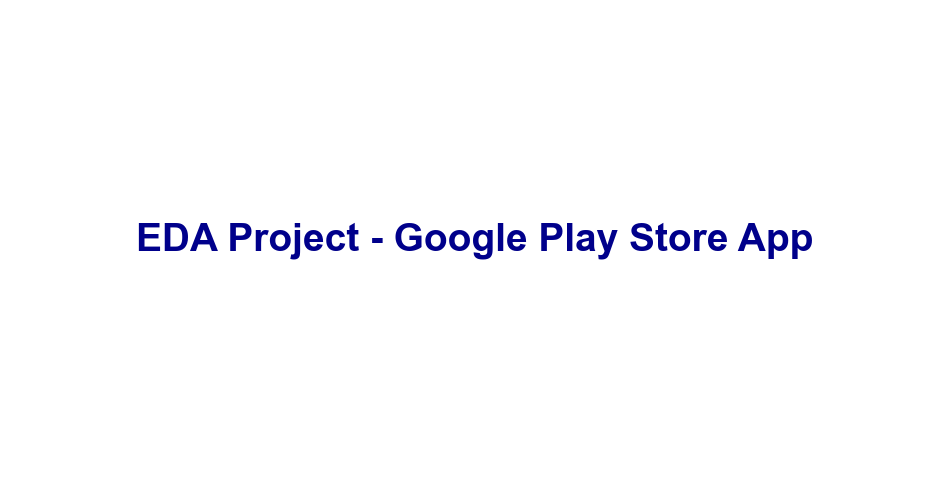

In [5]:
import matplotlib.pyplot as plt

# Başlık stil ayarları
plt.figure(figsize=(12, 6))  # Görüntü boyutu
plt.text(0.5, 0.5, 'EDA Project - Google Play Store App', 
         fontsize=28,            # Font boyutu
         color='darkblue',       # Yazı rengi
         fontweight='bold',      # Kalın yazı
         horizontalalignment='center',  # Ortada hizalama
         verticalalignment='center',    # Ortada hizalama
         fontname='Arial')       # Yazı tipi

plt.gca().set_facecolor('white')  # Arka plan rengini beyaz yap
plt.axis('off')  # Eksenleri kapat (sadece metin görünsün)

# Görüntüle
plt.show()

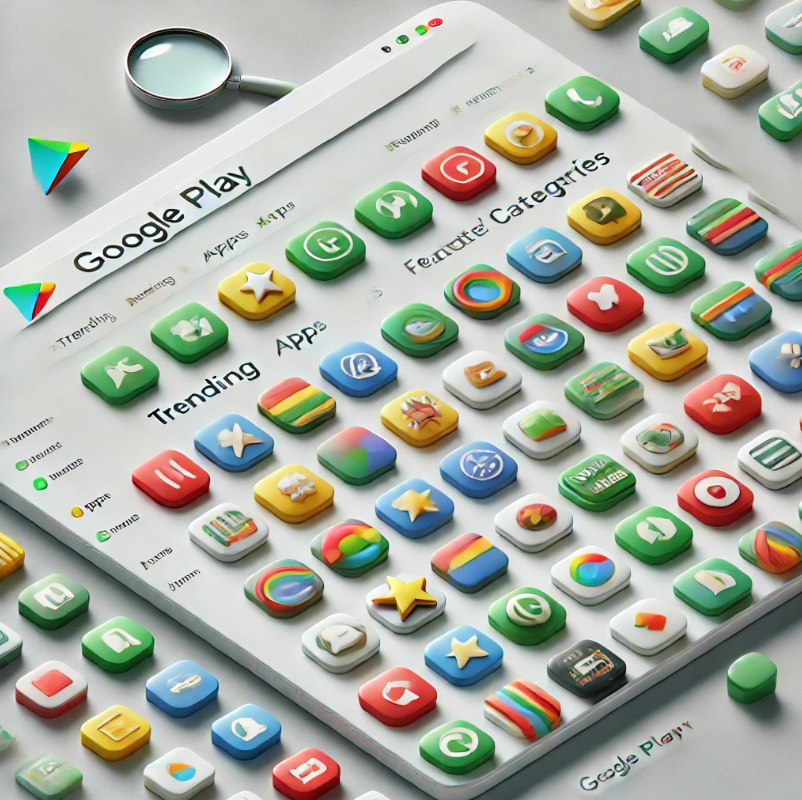

In [8]:
from IPython.display import Image

Image(filename='gp.png')

from IPython.display import display, HTML

# HTML içerik oluşturma
html_content = """
<b>This notebook includes how to perform Exploratory Data Analysis (EDA) and data visualization for the Google Play Store app dataset.</b>
<br><br>
<b>Contents:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset - EDA</a></li>
<li><a href="#research-queries">Research Queries and Analytical Insights</a></li>
</ul>


<a id='loading-dataset'></a>
# **Loading The Dataset**

About the Dataset
In this project, we are analyzing a dataset that provides detailed information about applications available on the Google Play Store. The dataset includes 10,841 rows and 13 columns, each representing various characteristics of these apps.

Here's a quick breakdown of the columns:

App: The name of the application.

Category: The category to which the app belongs (e.g., ART_AND_DESIGN, FINANCE, COMICS, BEAUTY, etc.).

Rating: The average rating of the app, given by users, on a scale of 1 to 5.

Reviews: The total number of user reviews for the app.

Size: The size of the app (in MB).

Installs: The number of times the app has been downloaded from the Play Store.

Type: Indicates whether the app is free or paid.

Price: The price of the app in USD (a price of 0 means the app is free).

Content Rating: Shows the target audience of the app (e.g., "Everyone" for all ages).

Genres: The genres or subcategories the app belongs to (e.g., "Art & Design;Pretend Play").

Last Updated: The date the app was last updated.

Current Ver: The current version of the app (e.g., "1.0.0").

Android Ver: The minimum Android version required to run the app (e.g., "4.0.3 and up").

This dataset provides a great opportunity to explore various patterns and insights related to app categories, user engagement, app sizes, and much more!

In [12]:
df0 = pd.read_csv('googleplaystore.csv') 
df = df0.copy()

<a id='understanding-dataset'></a>
# **Understanding The Dataset - EDA**

In [13]:
df.sample(7)

App             Category  Rating  Reviews  \
546                      The League               DATING     3.0      837   
6950                     Bx-WiFi-GI        VIDEO_PLAYERS     NaN        0   
167      English to Urdu Dictionary  BOOKS_AND_REFERENCE     4.6     4620   
9851  MomentCam Cartoons & Stickers          PHOTOGRAPHY     4.2  1260143   
1208       GialloZafferano: Recipes       FOOD_AND_DRINK     4.3    30224   
1377       Couch to 5K by RunDouble   HEALTH_AND_FITNESS     4.7    15674   
4390                    Drag'n'Boom                 GAME     4.8   133180   

                    Size     Installs  Type Price Content Rating  \
546                 9.4M     100,000+  Free     0     Mature 17+   
6950                 21M         100+  Free     0       Everyone   
167                  19M     500,000+  Free     0       Everyone   
9851  Varies with device  50,000,000+  Free     0       Everyone   
1208  Varies with device   1,000,000+  Free     0       Everyone   
1377                6.1M   1,000,000+  Free     0       Everyone   
4390                 54M   1,000,000+  Free     0   Everyone 10+   

                       Genres       Last Updated         Current Ver  \
546                    Dating      July 16, 2018              1.15.0   
6950  Video Players & Editors    August 15, 2017               1.3.6   
167         Books & Reference  November 23, 2017                 2.0   
9851              Photography      July 12, 2018  Varies with device   
1208             Food & Drink       May 28, 2018  Varies with device   
1377         Health & Fitness      July 31, 2018               4.5.4   
4390                   Arcade   January 12, 2018               1.1.1   

             Android Ver  
546           4.4 and up  
6950          4.1 and up  
167         4.0.3 and up  
9851  Varies with device  
1208  Varies with device  
1377          4.1 and up  
4390          4.4 and up

**The Skimpy Library is a Python library that quickly and effectively summarises datasets. 

It displays basic statistics on a column-by-column basis, making it easier to understand the data and identify potential issues. 

It provides a simple solution for data analysts to explore and examine large datasets, saving time in the process.**

In [ ]:
# pip install skimpy

In [17]:
from skimpy import skim

In [18]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10841  │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %   ┃ mean     ┃ sd        ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Rating           │   1474 │   13.6 │    4.193 │    0.5374 │    1 │     4 │   4.3 │   4.5 │    19 │   ▂▇    │  │
│ └──────────────────┴────────┴────────┴──────────┴───────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ App                           │      0 │          0 │                         3.9 │                  42584 │  │
│ │ Category                      │      0 │          0 │                           1 │                  10841 │  │
│ │ Reviews                       │      0 │          0 │                           1 │                  10841 │  │
│ │ Size                          │      0 │          0 │                         1.3 │                  14231 │  │
│ │ Installs                      │      0 │          0 │                           1 │                  10841 │  │
│ │ Type                          │      1 │       0.01 │                           1 │                  10840 │  │
│ │ Price                         │      0 │          0 │                           1 │                  10841 │  │
│ │ Content Rating                │      1 │       0.01 │                         1.1 │                  11759 │  │
│ │ Genres                        │      0 │          0 │                         1.4 │                  15450 │  │
│ │ Last Updated                  │      0 │          0 │                           3 │                  32521 │  │
│ │ Current Ver                   │      8 │       0.07 │                         1.3 │                  13929 │  │
│ │ Android Ver                   │      3 │       0.03 │                           3 │                  32514 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

The info() method provides basic information about a DataFrame. This method is invaluable for rapidly grasping the structure of the DataFrame.

**RangeIndex:** Details about indexing, including the start, end, and step size.

**Data columns:** The names of all columns, the number of non-null values, and the data type (dtype).

**Memory usage:** The amount of memory the DataFrame occupies.

**dtypes:** The number of distinct data types (e.g., integer, float, object, etc.). 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**df.columns** is a property that returns the column names. Use this property to get a list containing the names of the columns in the DataFrame.

Replace any spaces in the column names with underscores (_). This will ensure consistency and make the column names easier to work with.

In [20]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**.str.replace(" ", "_")** reformats the column names by replacing spaces with underscores.

This helps you obtain more usable and processable column names. It’s a common practice to maintain a consistent format for column names and to facilitate easier access to them.

In [21]:
df.columns = df.columns.str.replace(" ","_")

In [22]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

**df.shape** is a property that returns the dimensions (number of rows and columns).

When this property is used, it returns a tuple showing the number of rows and columns in the DataFrame.

In [23]:
df.shape

(10841, 13)

The **dtypes** property shows the data type (dtype) of each column.

This property helps you quickly understand the types of data present in your DataFrame.

In [24]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

**duplicated**

The **duplicated** function is used to identify duplicate rows within a **pandas DataFrame**. This function returns a **Series** containing boolean (True/False) values indicating whether each row is a duplicate.

The function offers flexibility with the **keep** parameter:\
**keep=first (default):** Marks all duplicates as **True** except for the first occurrence.\
**keep=last:** Marks all duplicates as **True** except for the last occurrence.\
**keep=False:** Marks all duplicates as **True**.

In [25]:
df.duplicated().sum()

483

**drop_duplicates**

The **drop_duplicates** function is used to remove duplicate rows from a **DataFrame**. This function returns the DataFrame after removing the duplicate rows.

This function can also be used with the **keep** parameter:\
**keep=first (default):** Removes all duplicates except for the first occurrence.\
**keep=last:** Removes all duplicates except for the last occurrence.\
**keep=False:** Removes all duplicate rows, so each unique combination appears only once.

The inplace parameter determines whether the changes are made directly on the original DataFrame (**True** for in-place changes, **False** to return the result as a new DataFrame without altering the original).

In [26]:
df = df.drop_duplicates()

In [27]:
pd.DataFrame({
    'Count': df.count(),
    'Null': df.isnull().sum(),
    'Cardinality': df.nunique()
})

Count  Null  Cardinality
App             10358     0         9660
Category        10358     0           34
Rating           8893  1465           40
Reviews         10358     0         6002
Size            10358     0          462
Installs        10358     0           22
Type            10357     1            3
Price           10358     0           93
Content_Rating  10357     1            6
Genres          10358     0          120
Last_Updated    10358     0         1378
Current_Ver     10350     8         2832
Android_Ver     10355     3           33

The **df.isnull().sum()** code returns the count of missing values (NaN or None) for each column in a pandas DataFrame named df.

This code is very useful during data cleaning and preprocessing stages because it allows us to quickly see which columns have missing data.

In [28]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

**sns.set_theme():** Uses Seaborn's default theme settings. This ensures that all generated plots have a consistent appearance.

**sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)}):** This line sets the resolution and size of the generated plots.

**"figure.dpi":** 300: Sets the DPI (dots per inch) to 300, which results in higher resolution plots.

**"figure.figsize":** (12, 9): Sets the size of the generated plots to 12x9 inches.

In [29]:
sns.set_theme()

sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

The **sns.heatmap(df.isnull(), cbar=False)** code creates a heatmap to visualize where the missing values (NaN or None) are located in a DataFrame.

The **cbar=False** parameter ensures that the color bar is not displayed.

**In this heatmap:**

Missing values are shown in white or a light color.

Other values are usually shown in black or a dark color.

This visualization is very useful for quickly seeing where missing data is concentrated in columns and rows.

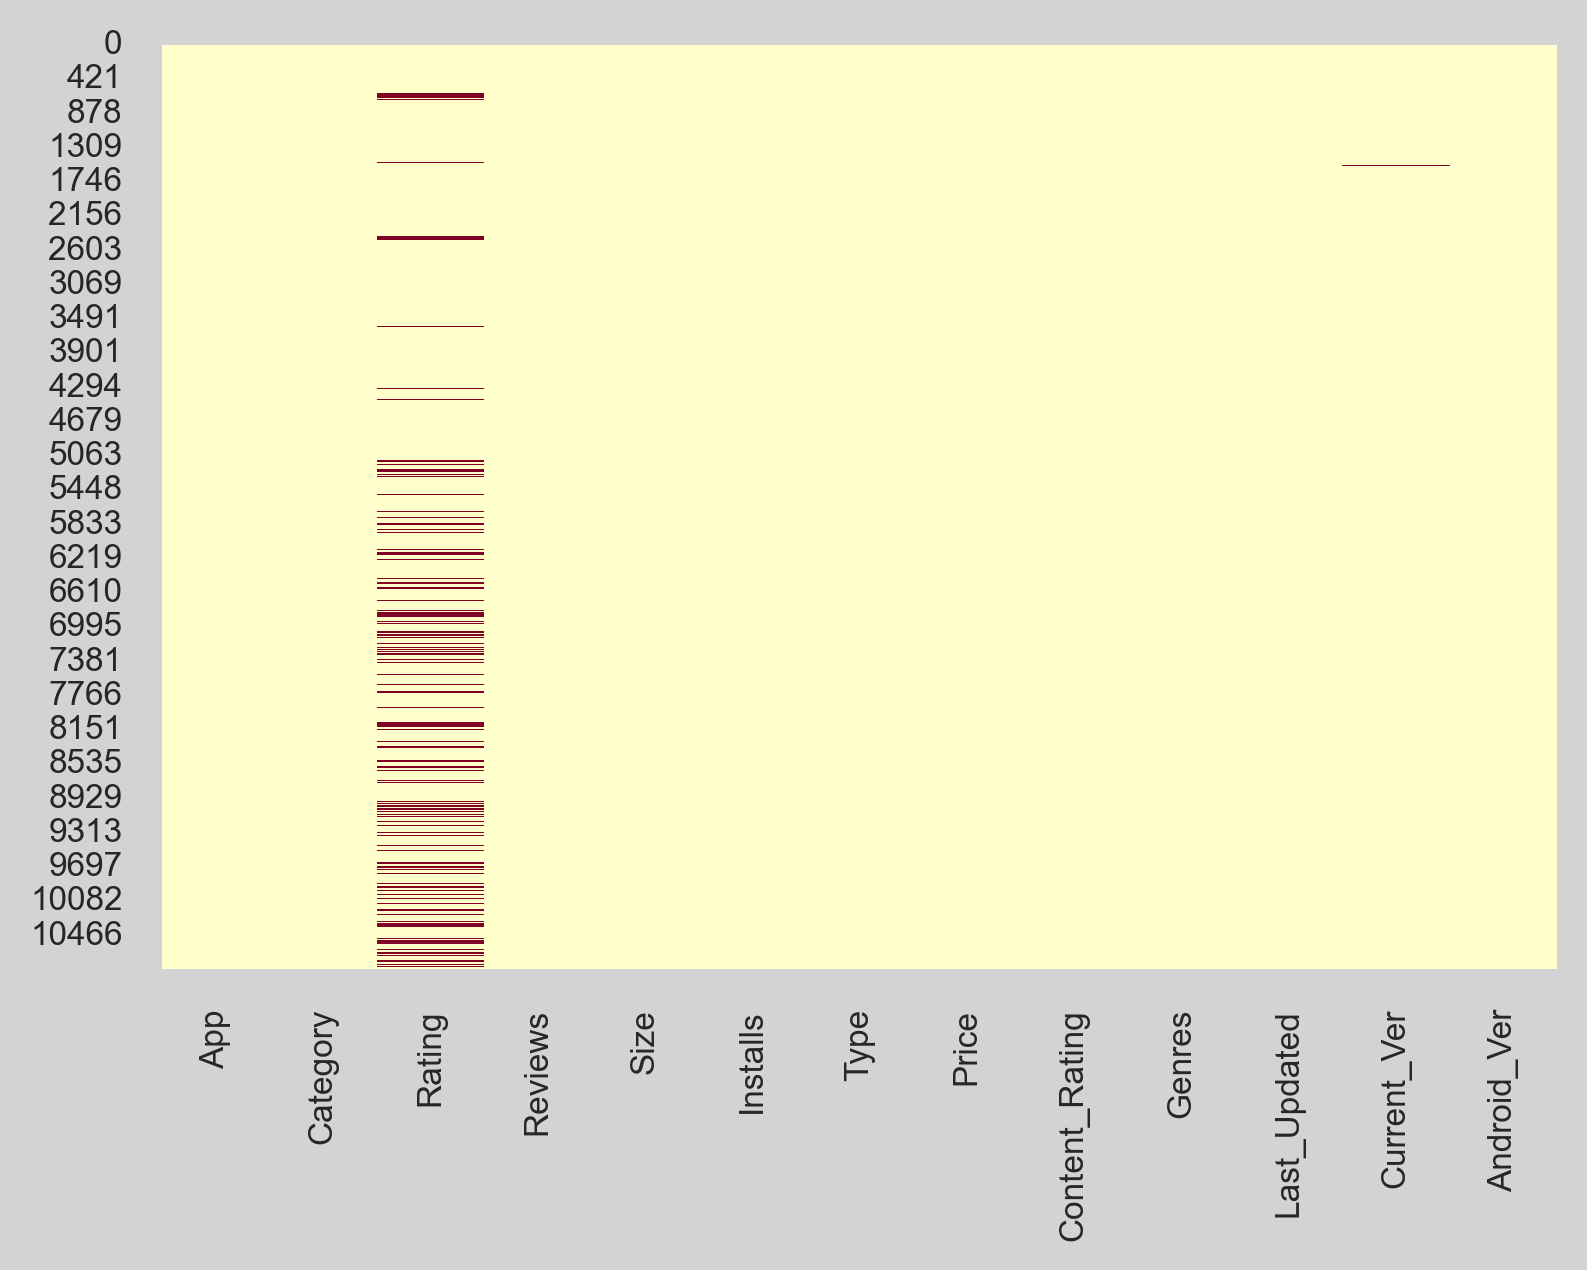

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('lightgray')

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd');

The **msno.bar(df);** code uses the missingno library (often abbreviated as msno) to display missing values in the dataset as a bar chart.

Each bar represents a column, and the height of the bar shows the number of non-missing values in that column.

This type of visualization can help you quickly understand which columns have a high concentration of missing data.

Columns with missing data may require special attention during the data cleaning or preprocessing stages.

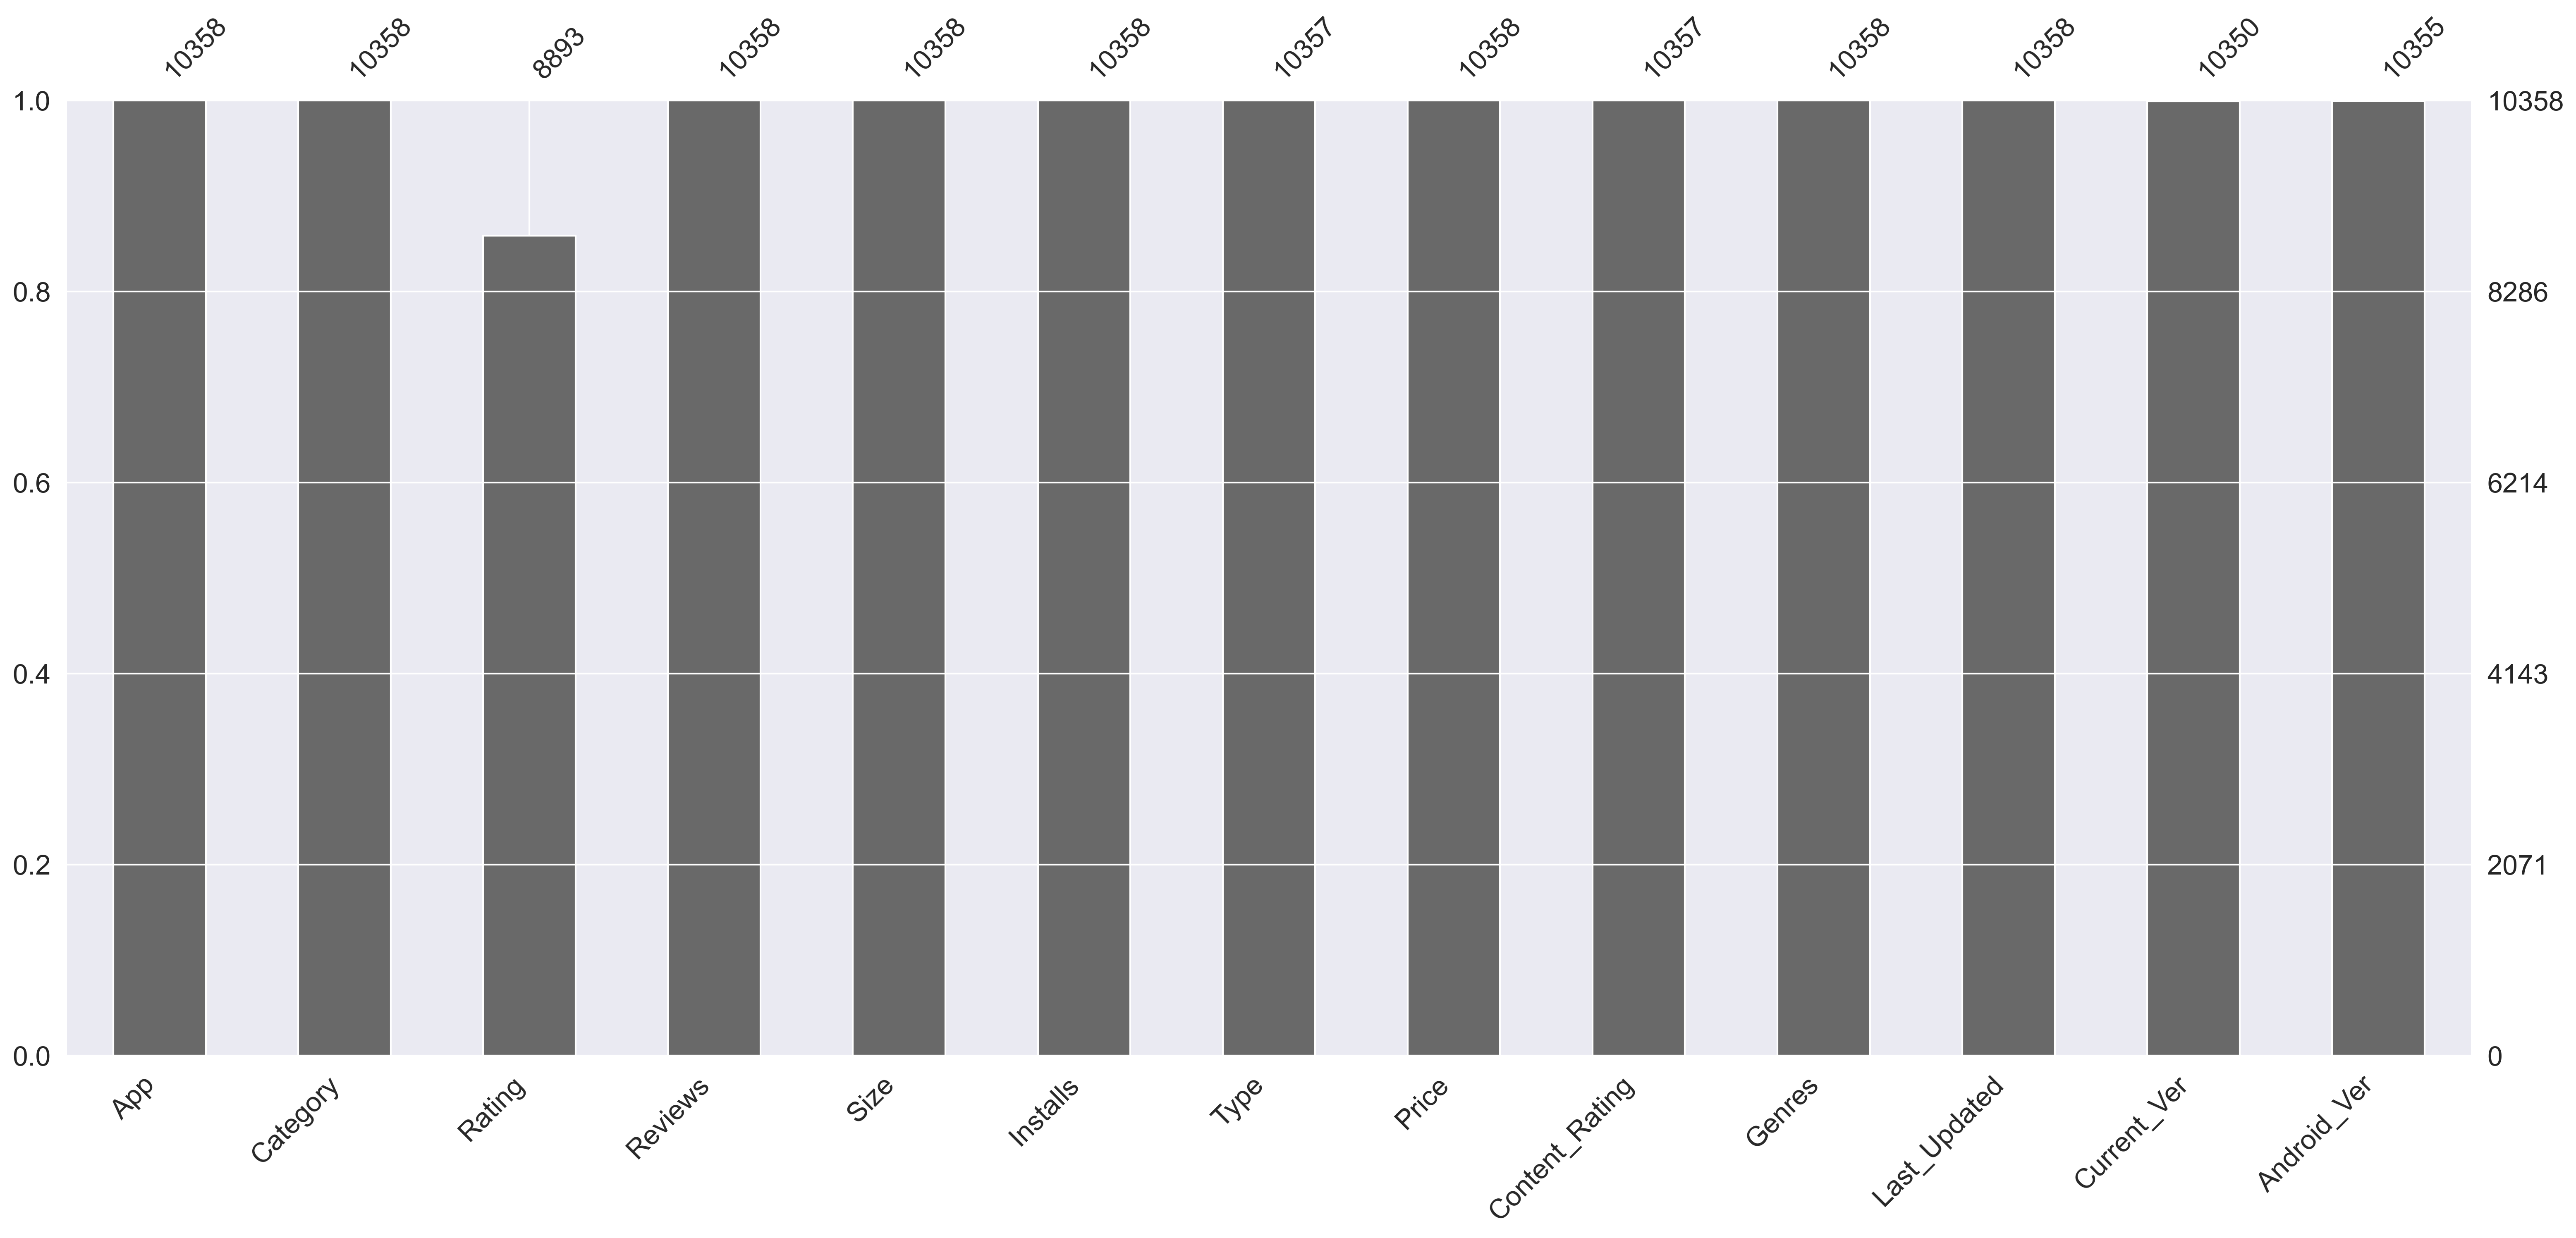

In [31]:
msno.bar(df);

**Output Explanation**

**Horizontal Axis (X-Axis):** This axis shows the column names in the dataset. Each column is represented by a bar.

**Vertical Axis (Y-Axis):** This axis shows the number of non-missing values in each column. If a bar is fully filled, it means there are no missing values in that column. If a bar is not fully filled, it means there are missing values.

**Bars:** Each bar represents a column. The height of the bar shows the number of non-missing values in that column. The color of the bar is generally used to visualize the number of non-missing values. A fully filled bar indicates there are no missing values in that column.

**Numbers on the Bars:** Show the exact count of non-missing values in each column.

**Numbers on the right outside of the plot:** These numbers display the count of observations numerically.

**Numbers on the left outside of the plot:** These numbers display the count of observations proportionally.

The **msno.matrix(df);** displays missing values in the dataset as a matrix plot using the **missingno** library.

This visualization is very useful for understanding the structure of missing data in the dataset.

Such a visualization is particularly helpful for seeing in which columns and rows missing values are concentrated, as well as how missing values are distributed throughout the dataset.

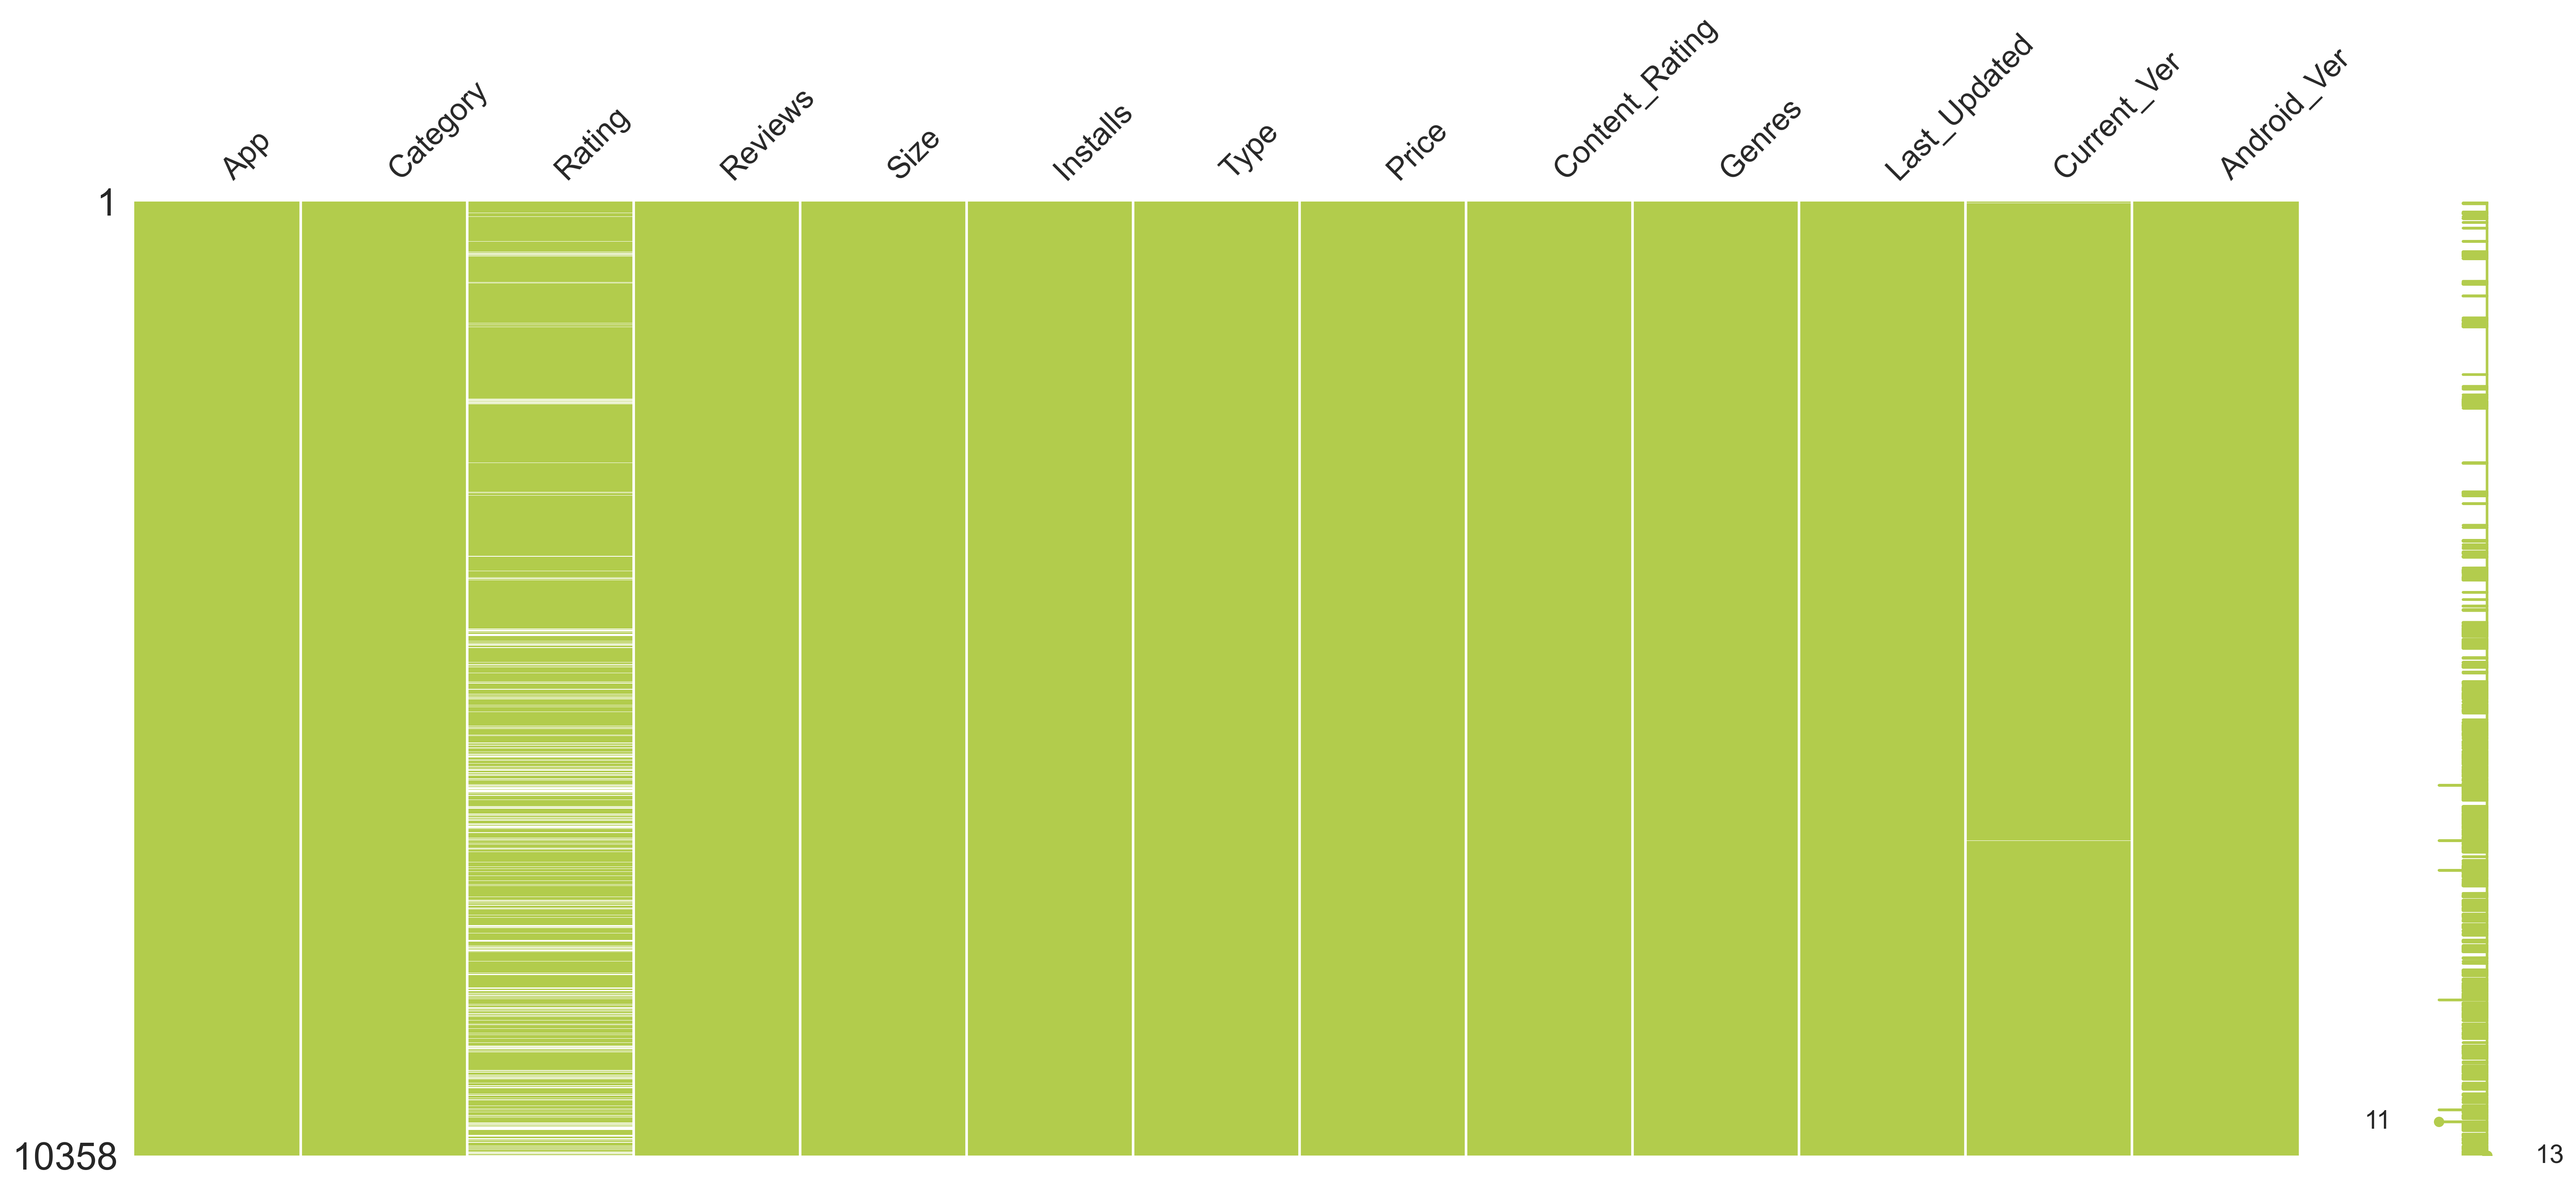

In [34]:
msno.matrix(df, color=(0.7, 0.8, 0.3), fontsize=18, sparkline=True);

**Horizontal Axis (X-Axis):** This axis shows the column names in the dataset. Each column is represented by a series of dots or lines.

**Vertical Axis (Y-Axis):** This axis shows the row indices in the dataset. Each row is represented by a series of dots or lines indicating whether the values in the columns specified on the horizontal axis are present or not.

**Dots and Lines:** If a value is missing, the dot is shown in white; if the value is not missing, the dot is shown in gray or black (in our case, blue due to using color). This allows you to see which columns and rows have missing values.

**color=(0, 0, 1):** This parameter specifies the color used to show missing values. Here, (0, 0, 1) represents blue. In RGB color coding, Red=0, Green=0, Blue=1. Therefore, missing data points will be displayed in blue.

**Sparkline - Bar on the Right (nullity bar):** This is a plot summarizing the distribution and density of missing values in each row of the dataset. The gaps at the top and bottom of the sparkline represent rows in the dataset that do not contain missing values. The filled-in parts of the sparkline indicate rows with missing values. The fewer the gaps at the top and bottom of the sparkline, the more rows there are with missing values.

In [35]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

- From the above visuals, we observed that the **Rating** column has a significant amount of missing data.

- Missing values are often represented as **"NaN" (Not a Number)**, and rows in the data frame with these missing values can lead to undesirable results during analysis or model training.

- Therefore, removing rows with missing values can help clean the dataset.

- There are many ways to handle missing data, and this is an important area for machine learning, known as a separate field of work.

- For this column, I will use the imputation option with the median, which is a commonly used method for handling missing values. The median is the value that lies in the middle of the dataset and is generally unaffected by outliers.

- When filling in missing values, it is always important to keep in mind any outliers present in the data before using the mean.

- Choosing the mean might be inappropriate in a dataset with many outliers. The mean value can be easily affected by outliers in the dataset.

- Therefore, if your dataset contains outliers and you do not want these outliers to influence the filling of missing values, using the median might be a better option.

- The median is more "resistant" to outliers, making it a more suitable option in such situations.

**rating_median = df["Rating"].median():** This line calculates the median value of the data in the **"Rating"** column and assigns it to a variable named **"rating_median"**. The median is the value in the middle when the dataset is sorted and represents more than half of the values in the dataset.

In [36]:
rating_median = df["Rating"].median()
rating_median

4.3

**df["Rating"].fillna(rating_median, inplace=True):** This line fills the missing values (represented as **"NaN"**) in the **"Rating"** column with the **"rating_median"** value. The **fillna** function is used to fill missing values in the specified column. The **inplace=True** parameter applies this change directly to the data frame, making the change permanent on the existing data frame instead of creating a new one.

In [37]:
df["Rating"].fillna(rating_median, inplace=True)

# df["Rating"].fillna(df["Rating"].median(), inplace=True)

**dropna():** is used to remove rows (observations) with missing values.

**inplace=True:** When set to "True," it makes the changes to the data frame permanent.

In [38]:
df.dropna(inplace=True)

**sum():** This counts the number of "True" values, which calculates the number of missing values for each column.

**Second sum():** This sums up the number of missing values for each column calculated by the first sum() operation, giving the total number of missing values in the data frame.

In [39]:
df.isnull().sum().sum()

0

In [41]:
df.sample(10)

App            Category  Rating  \
1804                           Offroad Outlaws                GAME     4.4   
3705                      Video Wallpaper Show       VIDEO_PLAYERS     4.3   
9702                             EP Horlogerie           LIFESTYLE     4.9   
659                   Diamond Engagement Rings              DATING     4.3   
8155                    SMS Sender - sluzba.cz       COMMUNICATION     4.3   
5984                            BC Wildflowers              FAMILY     4.4   
3191  Orbitz - Hotels, Flights & Package Deals    TRAVEL_AND_LOCAL     4.4   
6582                                 My BP Lab  HEALTH_AND_FITNESS     2.6   
3512            Dashlane Free Password Manager        PRODUCTIVITY     4.6   
8830                          DS Tower Defence                GAME     3.2   

     Reviews                Size    Installs  Type Price Content_Rating  \
1804   29168  Varies with device  1,000,000+  Free     0       Everyone   
3705       0                 13M        500+  Free     0       Everyone   
9702      18                 24M      1,000+  Free     0       Everyone   
659        0                3.5M          5+  Free     0       Everyone   
8155      12                 72k      1,000+  Free     0       Everyone   
5984       7                 81M      1,000+  Free     0       Everyone   
3191   33256  Varies with device  1,000,000+  Free     0       Everyone   
6582     186                 25M     10,000+  Free     0       Everyone   
3512   73695  Varies with device  1,000,000+  Free     0       Everyone   
8830     768                1.4M    100,000+  Free     0       Everyone   

                       Genres    Last_Updated         Current_Ver  \
1804                   Racing    May 29, 2018               2.0.1   
3705  Video Players & Editors   July 26, 2018                 3.1   
9702                Lifestyle  March 28, 2018               4.0.2   
659                    Dating   July 12, 2018                 6.1   
8155            Communication    June 1, 2012             2.00.00   
5984                Education   July 10, 2017                 3.5   
3191           Travel & Local   July 31, 2018  Varies with device   
6582         Health & Fitness    May 19, 2018               1.1.0   
3512             Productivity  August 6, 2018  Varies with device   
8830                   Arcade    June 5, 2013                 1.0   

             Android_Ver  
1804          4.1 and up  
3705        4.0.3 and up  
9702        4.0.3 and up  
659           4.0 and up  
8155          2.0 and up  
5984          4.1 and up  
3191  Varies with device  
6582          8.0 and up  
3512          5.0 and up  
8830          1.5 and up

## <font color='red'> <b>Reviews</b><font color='black'>

- **count:** There are 10,346 non-missing values.
- **unique:** Out of these 10,346 values, 5,999 are unique.
- **top:** The most frequent value is "0".
- **freq:** The value "0" repeats 591 times.

These statistics indicate that the "Reviews" column is interpreted as **categorical** or **text** data. If this column represents numerical data (e.g., the number of reviews), it would be beneficial to convert this column to a numerical data type (such as int or float). This conversion would make it easier to perform numerical analyses on this column later.

The high frequency of the "0" value may indicate that many apps have no reviews or that this data is missing. Such cases should be considered when analyzing the dataset or building a model.

These statistics also provide a general idea of how the "Reviews" column is distributed in the dataset. For example, the most frequent value and its frequency provide information about how diverse the dataset is or how prevalent a specific value is.

In [43]:
df["Reviews"].describe()

count     10346
unique     5999
top           0
freq        591
Name: Reviews, dtype: object

**df["Reviews"] = df["Reviews"].astype("int64")** changes the data type of the "Reviews" column in a pandas DataFrame to **int64**.

This is used if the "Reviews" column contains numerical values but is not stored as a numerical data type (e.g., stored as **object** or **string**).

This conversion makes it possible to perform numerical analyses on the "Reviews" column and use it in a numerical model. For example, you can now calculate the mean, median, standard deviation, etc., for this column.

However, before running this code, you should ensure that there are no missing (NaN) or textual values in the "Reviews" column. If there are, the **astype("int64")** conversion will raise an error. If there are missing or textual values, you should appropriately fill or remove these values.

In [44]:
df["Reviews"] = df["Reviews"].astype("int64")

- **count:** The number of non-missing values.
- **mean:** The average value.
- **std:** The standard deviation.
- **min:** The minimum value.
- **25%:** The first quartile (Q1), i.e., the upper boundary of the lower 25% of the dataset.
- **50%:** The median (Q2), i.e., the middle value of the dataset.
- **75%:** The third quartile (Q3), i.e., the lower boundary of the upper 25% of the dataset.
- **max:** The maximum value.

In [45]:
df["Reviews"].describe().round()

count       10346.0
mean       406334.0
std       2698179.0
min             0.0
25%            32.0
50%          1688.0
75%         46598.0
max      78158306.0
Name: Reviews, dtype: float64

## <font color='Red'> <b>Category</b><font color='black'>

In [46]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [47]:
df['Category'] = df['Category'].str.capitalize().str.replace("_", " ")


In [48]:
df['Category'].unique()

array(['Art and design', 'Auto and vehicles', 'Beauty',
       'Books and reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food and drink', 'Health and fitness', 'House and home',
       'Libraries and demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel and local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video players', 'News and magazines', 'Maps and navigation'],
      dtype=object)

## <font color='red'> <b>Size</b><font color='black'>   

**print(len(df["Size"].unique())):** prints the number of unique values in the "Size" column.

**df["Size"].unique():** returns the unique values in the "Size" column.

Seeing what these unique values are can provide insights into what steps may be necessary for data cleaning or transformation. For example, if the "Size" column contains different units like "M" (Megabyte) and "K" (Kilobyte), it may be necessary to convert these values to the same unit.

In [49]:
print(len(df["Size"].unique()))
df["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

The purpose of this function is to convert a given size value ("size") into megabytes (M).

**if isinstance(size, str)::** The function first checks if the size parameter is a string. If it is a string, the conversion will be performed based on its content.

**if 'k' in size::** If the size contains the 'k' character, this indicates a value in kilobytes (K). To convert it to megabytes, the kilobyte value is divided by 1024. The resulting decimal number is rounded (round) and displayed up to 2 decimal places.

**elif 'M' in size::** If the size contains the 'M' character, it is already in megabytes (M). The 'M' character is removed, and the numeric value is returned.

**else::** If it does not contain 'k' or 'M' (e.g., "Varies with device"), None is returned, indicating that the value is unknown.

**return None:** If the size parameter is not a string (e.g., None or NaN), the function returns None.

In [50]:
# df['Converted_Size'] = df['Size'].apply(
#     lambda x: None if x == 'Varies with device' else x[:-1]
#     if x[-1] == 'M' else round(float(x[:-1]) / 1024, 2))

In [51]:
def convert_to_megabytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return round(float(size.replace('k', '')) / 1024, 2)
        elif 'M' in size:
            return float(size.replace('M', ''))
        else:
            return None
    return None

In [52]:
df['Converted_Size'] = df['Size'].apply(convert_to_megabytes)

In [53]:
sample_data = df[df['Size'].str.contains('k|M', na=False)]
sample_data[['Size', 'Converted_Size']].sample(20)

Size  Converted_Size
10426   49M            49.0
10569   45M            45.0
7879    20M            20.0
7857    29M            29.0
6950    21M            21.0
6977    44M            44.0
6726    94M            94.0
10823  2.9M             2.9
8413    14M            14.0
5637    69M            69.0
7068    45M            45.0
5569    41M            41.0
7832    28M            28.0
7525    58M            58.0
6884    34M            34.0
5654    26M            26.0
8816    35M            35.0
10693   17M            17.0
7912   2.9M             2.9
6315    26M            26.0

In [54]:
# df["Size"].replace("M","", regex=True, inplace = True)
# df["Size"].replace("k","", regex=True, inplace = True)

Now replace the values labeled as "Varies with device" in the "Size" column with the median of this column. For this, calculate the median of the "Size" column. Then, replace these values with the median value. By doing this, you are essentially performing feature engineering by filling the "Varies with device" values with the median of this column since these values are uncertain.

The median is often less affected by outliers, so it could be considered a good option for filling missing or uncertain data.

To do this, you can first calculate the median of the rows that do not have "Varies with device" and then replace the rows that have "Varies with device" with this median value.

**df[df["Size"]!="Varies with device"]:** selects rows from the DataFrame ("df") where the "Size" column is not "Varies with device."

**["Size"].astype(float):** converts the "Converted_Size" column of the selected rows to a float type. This is necessary to calculate the median because the median is a numerical measure.

**.median():** calculates the median of the "Converted_Size" column.

As a result, the size_median variable stores this median value. This value can be used to fill in the "Converted_Size" column values labeled as "Varies with device" or missing.

The median is usually a good choice for filling in missing values because it is less affected by outliers in the dataset.

In [55]:
size_median = df[df["Converted_Size"]!="Varies with device"]["Converted_Size"].astype(float).median()
size_median

13.0

In [56]:
df["Converted_Size"].replace("Varies with device", size_median, inplace=True)

**pd.to_numeric(df.Converted_Size):** Pandas' to_numeric function converts the values in the "Converted_Size" column to a numeric format. If there is an error during the conversion (e.g., if there is a non-numeric value), it will return an error message.

This process makes the "Converted_Size" column usable for numerical analyses or machine learning models.

In [57]:
df.Converted_Size = pd.to_numeric(df.Converted_Size)

In [58]:
df.Converted_Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Converted_Size, dtype: float64

**df.Size.describe().round()** computes the basic statistics of the **"Converted_Size"** column and rounds these values to the nearest integer.

In [59]:
df.Converted_Size.describe().round(1)

count    8821.0
mean       21.3
std        22.5
min         0.0
25%         4.7
50%        13.0
75%        29.0
max       100.0
Name: Converted_Size, dtype: float64

In [60]:
df.drop("Size", axis=1, inplace=True)

In [61]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Converted_Size'],
      dtype='object')

## <font color='red'> <b>Installs</b> <font color='black'>   

In [62]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

**df.Installs = df.Installs.apply(lambda x: x.replace("+","")):** This code removes the "+" character from each value in the "Installs" column. For example, "10,000+" is changed to "10,000".

**df.Installs = df.Installs.apply(lambda x: x.replace(",","")):** This code removes the comma (",") character from each value in the "Installs" column. For example, "10,000" is changed to "10000".

**df.Installs = df.Installs.apply(lambda x: int(x)):** This code converts each value in the "Installs" column to an integer. For example, "10000" is changed to 10000 (not a string, but an integer).

These operations bring the "Installs" column into a form suitable for numerical analysis or machine learning models. Such a transformation is generally considered feature engineering because it aims to transform the data to make the model more effectively utilize this feature.

In [63]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

# df.Installs = df.Installs.apply(lambda x: int(x.replace("+", "").replace(",", "")

In [64]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

These unique values show how many times the apps have been downloaded. For example:

10,000: Indicates that the app has been downloaded 10,000 times.

500,000: Indicates that the app has been downloaded 500,000 times.

1,000,000: Indicates that the app has been downloaded 1,000,000 times.

... and so on.

Storing these values as integers makes this column more useful for numerical analysis and machine learning models.

For example, you can use these numerical values as a dependent or independent variable in a regression model.

## <font color='red'><b>Price</b> <font color='black'>   

This information may be important for determining how to preprocess or transform the "Price" column. For instance, if this column contains numerical values but is stored in a string format (e.g., "$1.99"), it may be necessary to convert these values to a numeric format.

This type of analysis is useful for gaining a general understanding of the dataset and understanding how this column is distributed, especially before moving on to the modeling stage.

In [66]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**df.Price = df.Price.apply(lambda x: x.replace("$","")):**

This line removes the $ (dollar) sign from the values in the "Price" column. The apply method allows you to perform a specific operation on each column value. In this case, the lambda function replaces the dollar sign in each value with an empty string.

**df.Price = df.Price.apply(lambda x: float(x)):**

This line converts the values in the "Price" column to a decimal (float) number. The apply method is used to apply the conversion operation to each column value. In this case, the float() function converts each value to a decimal number.

As a result, this code snippet cleans the values in the "Price" column and converts them into a float data type. This operation is very useful when you need to use the prices in the column as numerical data.

In [67]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

# df.Price = df.Price.apply(lambda x: float(x.replace("$", "")))

In [68]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## <font color='red'> <b>Genres</b><font color='black'>  

In [69]:
df["Genres"].nunique()

119

In [70]:
df["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

This output shows the first 10 rows of the "Genres" column. As we can see, this column typically contains one or more genres or categories. The genres and categories are separated by a semicolon **(";")**.

**Code Explanation**

This code snippet splits the values in the "Genres" column by a semicolon (";") and then takes the first item (index 0). This means that if a row contains multiple genres or categories (e.g., "Art & Design;Pretend Play"), this code only takes the first genre or category ("Art & Design").

**df["Genres"].str.split(";"):** This part splits each value in the "Genres" column by a semicolon (";"). The result is a list for each row.

**.str[0]:** This part takes the first item from the created list (indexes in Python start from 0).

This operation aims to simplify the "Genres" column. For example, if an app has multiple genres, this code only takes the first genre. This can make the dataset more manageable for machine learning models, but it's important to note that this approach may lose some information in cases where an app belongs to multiple genres or categories.

In [71]:
df["Genres"] = df["Genres"].str.split(";").str[0]

**Code Explanation**

The **len(df["Genres"].unique())** code counts the number of distinct values in the "Genres" column.

This code gives an idea of how diverse the "Genres" column is. For example, if this number is very high, it indicates that the column contains many different categories or genres. If the number is low, it generally means that the column shows less diversity.

Such an analysis is useful for gaining a general understanding of the dataset and particularly understanding how this column is distributed before moving on to the modeling stage.

In [72]:
df["Genres"].nunique()

48

In [73]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [74]:
df["Genres"].value_counts()

Genres
Tools                      841
Entertainment              627
Education                  609
Business                   427
Medical                    408
Productivity               407
Personalization            386
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          232
Shopping                   224
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     161
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   108
Educational                106
Adventure                   91
A

In [75]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

## <font color='red'> <b>Last_Updated</b><font color='black'> 

The "Last_Updated" column contains dates that indicate when the app was last updated. This column is usually in date format (e.g., "January 7, 2018").

The output of this code shows the general structure of this column and how the dates are stored. If you plan to use this column in your model, some preprocessing steps may be required, such as converting dates to a numeric format or calculating the number of days elapsed between dates.

Such an analysis is useful for gaining a general understanding of the dataset and particularly understanding how this column is distributed before moving on to the modeling stage.

In [76]:
df["Last_Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

**pd.to_datetime(df["Last_Updated"]):** The to_datetime function from the Pandas library can convert a sequence, series, or single date value to a datetime object. This code snippet converts all values in the "Last_Updated" column to datetime objects.

This conversion is useful for working with dates more easily. For example, you can now use this column to calculate the number of days since the app was last updated or group by specific time periods like years, months, or days.

In [77]:
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [78]:
df['Year'] = df['Last_Updated'].dt.year
df['Month'] = df['Last_Updated'].dt.month
df['Day'] = df['Last_Updated'].dt.day

In [79]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  Art and design     4.1   
1                                Coloring book moana  Art and design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  Art and design     4.7   
3                              Sketch - Draw & Paint  Art and design     4.5   
4              Pixel Draw - Number Art Coloring Book  Art and design     4.3   

   Reviews  Installs  Type  Price Content_Rating        Genres Last_Updated  \
0      159     10000  Free    0.0       Everyone  Art & Design   2018-01-07   
1      967    500000  Free    0.0       Everyone  Art & Design   2018-01-15   
2    87510   5000000  Free    0.0       Everyone  Art & Design   2018-08-01   
3   215644  50000000  Free    0.0           Teen  Art & Design   2018-06-08   
4      967    100000  Free    0.0       Everyone  Art & Design   2018-06-20   

          Current_Ver   Android_Ver  Converted_Size  Year  Month  Day  
0               1.0.0  4.0.3 and up            19.0  2018      1    7  
1               2.0.0  4.0.3 and up            14.0  2018      1   15  
2               1.2.4  4.0.3 and up             8.7  2018      8    1  
3  Varies with device    4.2 and up            25.0  2018      6    8  
4                 1.1    4.4 and up             2.8  2018      6   20

In [80]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
Converted_Size           float64
Year                       int32
Month                      int32
Day                        int32
dtype: object

<a id='research-queries'></a>
# **Research Queries and Analytical Insights**

![](https://neilpatel.com/wp-content/uploads/2021/03/Data-Visualization_Featured-Image-1.png)

## <font color='red'><b> What are the top categories in terms of the number of apps?</b><font color='black'> 

Creating a bar chart showing the frequency of values in the "Type" column.

**type_counts = df['Type'].value_counts():** This line calculates how many times each unique value in the "Type" column occurs and stores this information in the variable type_counts.

**plt.figure(figsize=(15, 10)):** This line sets the size of the figure to 15x10.

**plt.bar(type_counts.index, type_counts.values, color=['blue', 'orange']):** This line plots the bar chart. type_counts.index are the values shown on the x-axis ("Free" and "Paid"), and type_counts.values are the values shown on the y-axis (the number of apps for each type).

**plt.xlabel('App Type'), plt.ylabel('Number of Apps'), plt.title('Number of Apps by Type'):** These lines add labels to the x and y axes and set a title for the chart.

**plt.show():** This line displays the chart.

In [83]:
type_counts = df['Type'].value_counts()
type_counts

Type
Free    9584
Paid     762
Name: count, dtype: int64

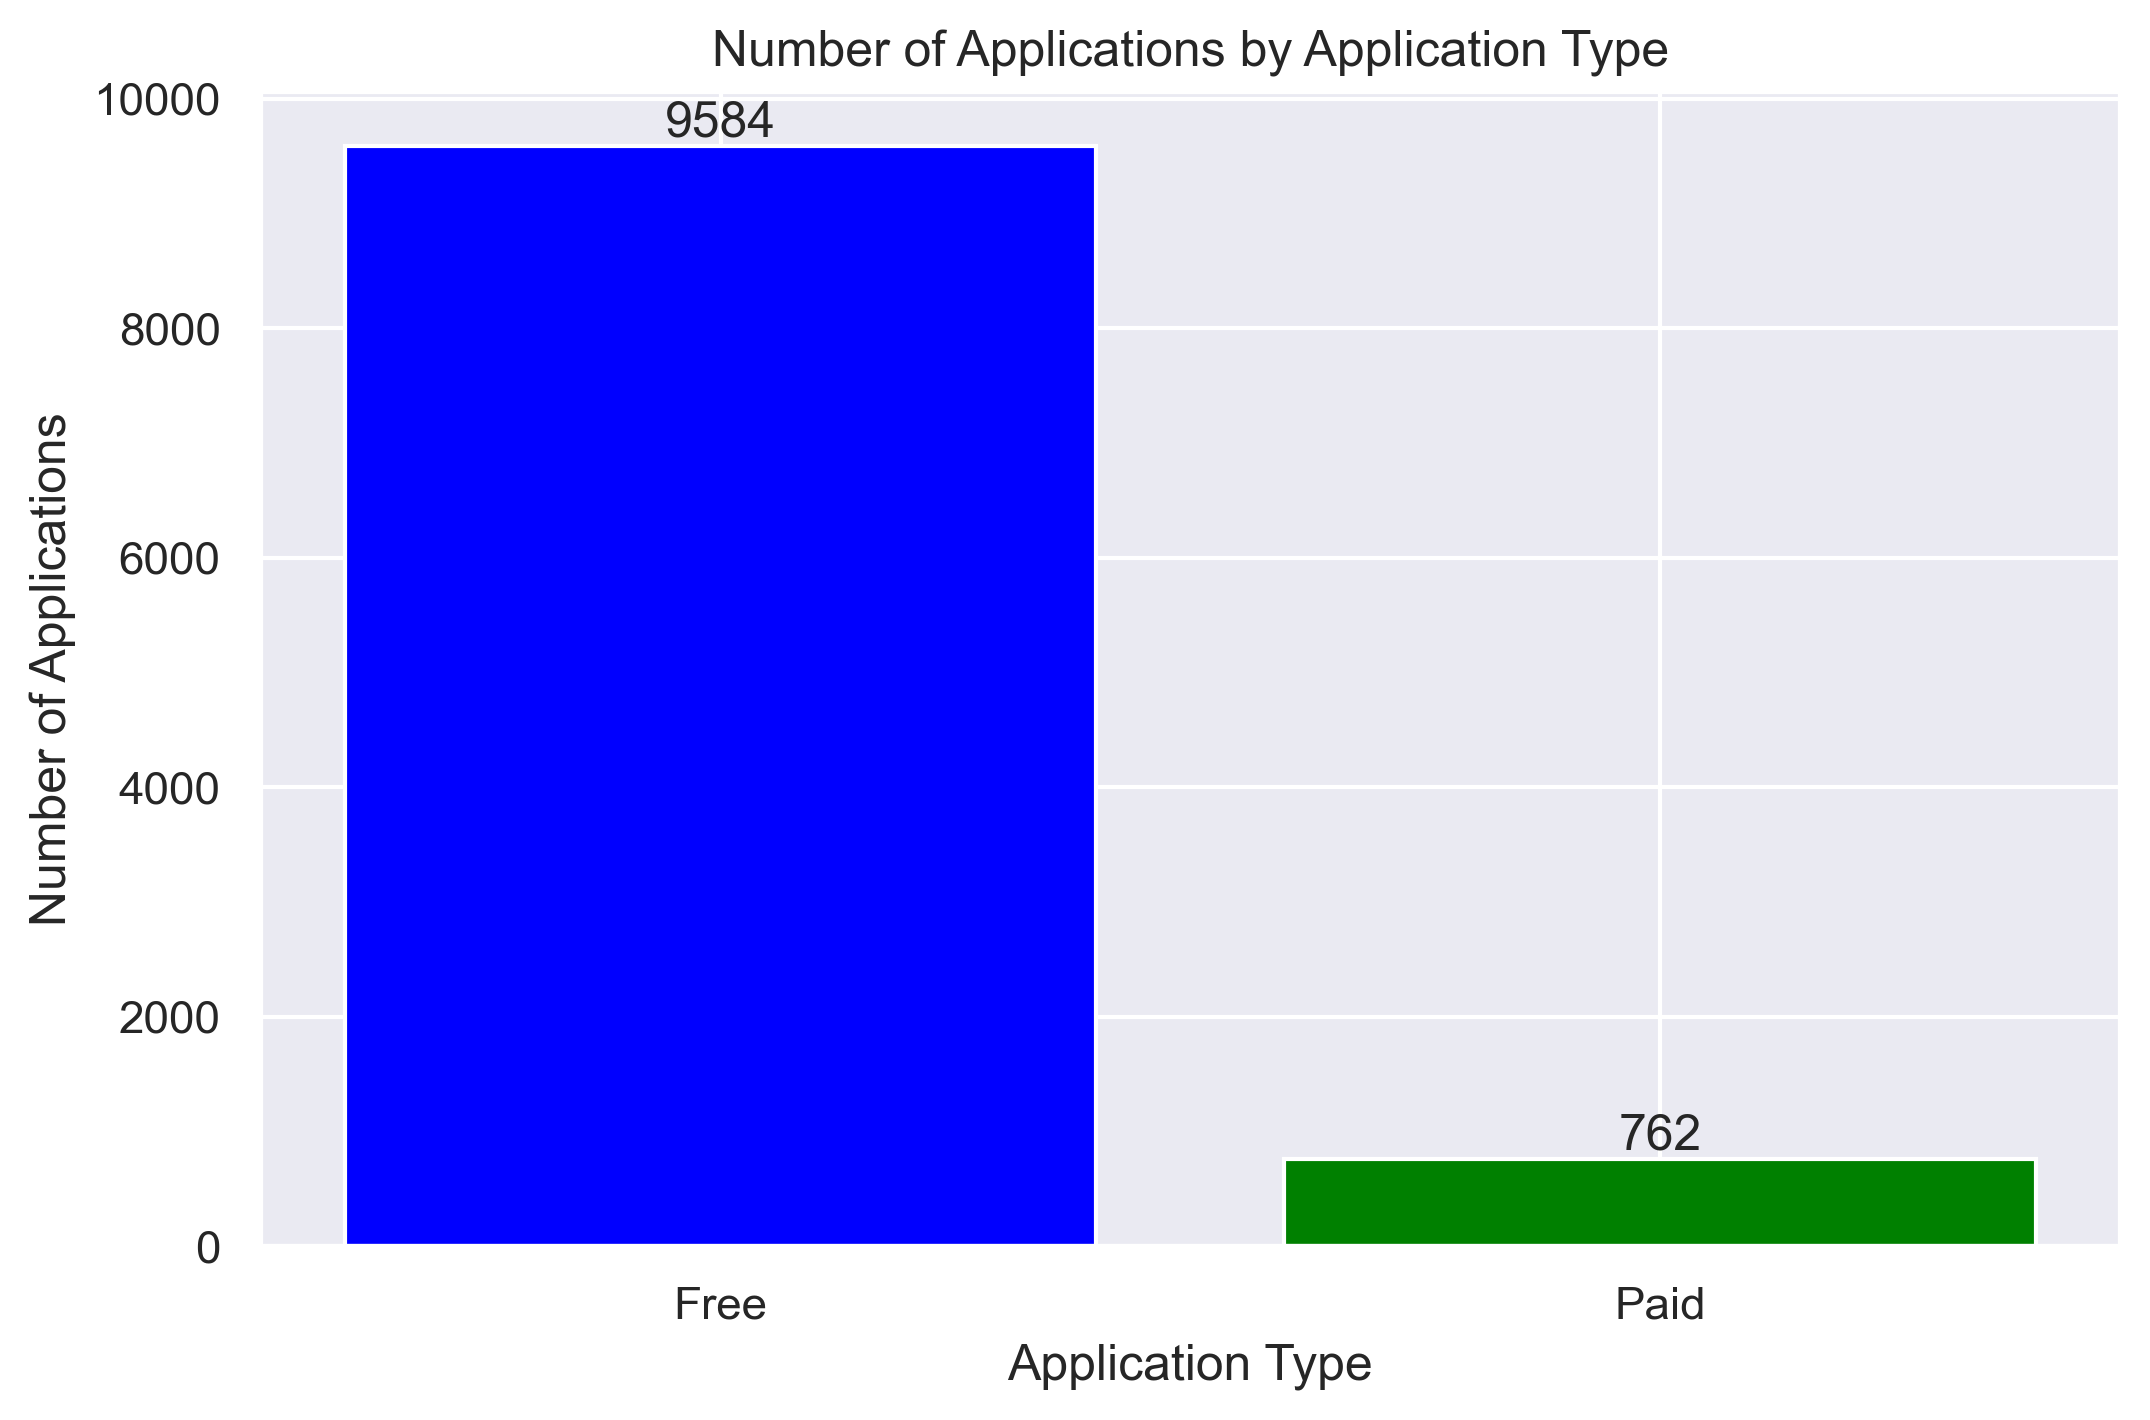

In [84]:
plt.figure(figsize=(8, 5))  # Grafik boyutunu ayarla
bars = plt.bar(type_counts.index, type_counts.values, color=['blue', 'green']) 

plt.xlabel('Application Type')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Application Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.show()

## <font color='red'> <b>What is the distribution of ratings by application type?</b><font color='black'> 

Plotting a box plot of the "Rating" values for each unique value ("Free" and "Paid") in the "Type" column.

**plt.figure(figsize=(15, 10)):** This line sets the size of the figure to 15x10.

**sns.boxplot(...):** This line uses the seaborn library to draw the box plot. The palette parameter sets the colors to blue ("blue") for "Free" and green ("green") for "Paid."

**plt.xlabel('App Type'), plt.ylabel('Rating'), plt.title('Rating Distribution by App Type'):** These lines add labels to the x and y axes and set a title for the chart.

**plt.show():** This line displays the chart.

In [85]:
average_ratings = df.groupby('Type')['Rating'].mean()
average_ratings

Type
Free    4.198560
Paid    4.269291
Name: Rating, dtype: float64

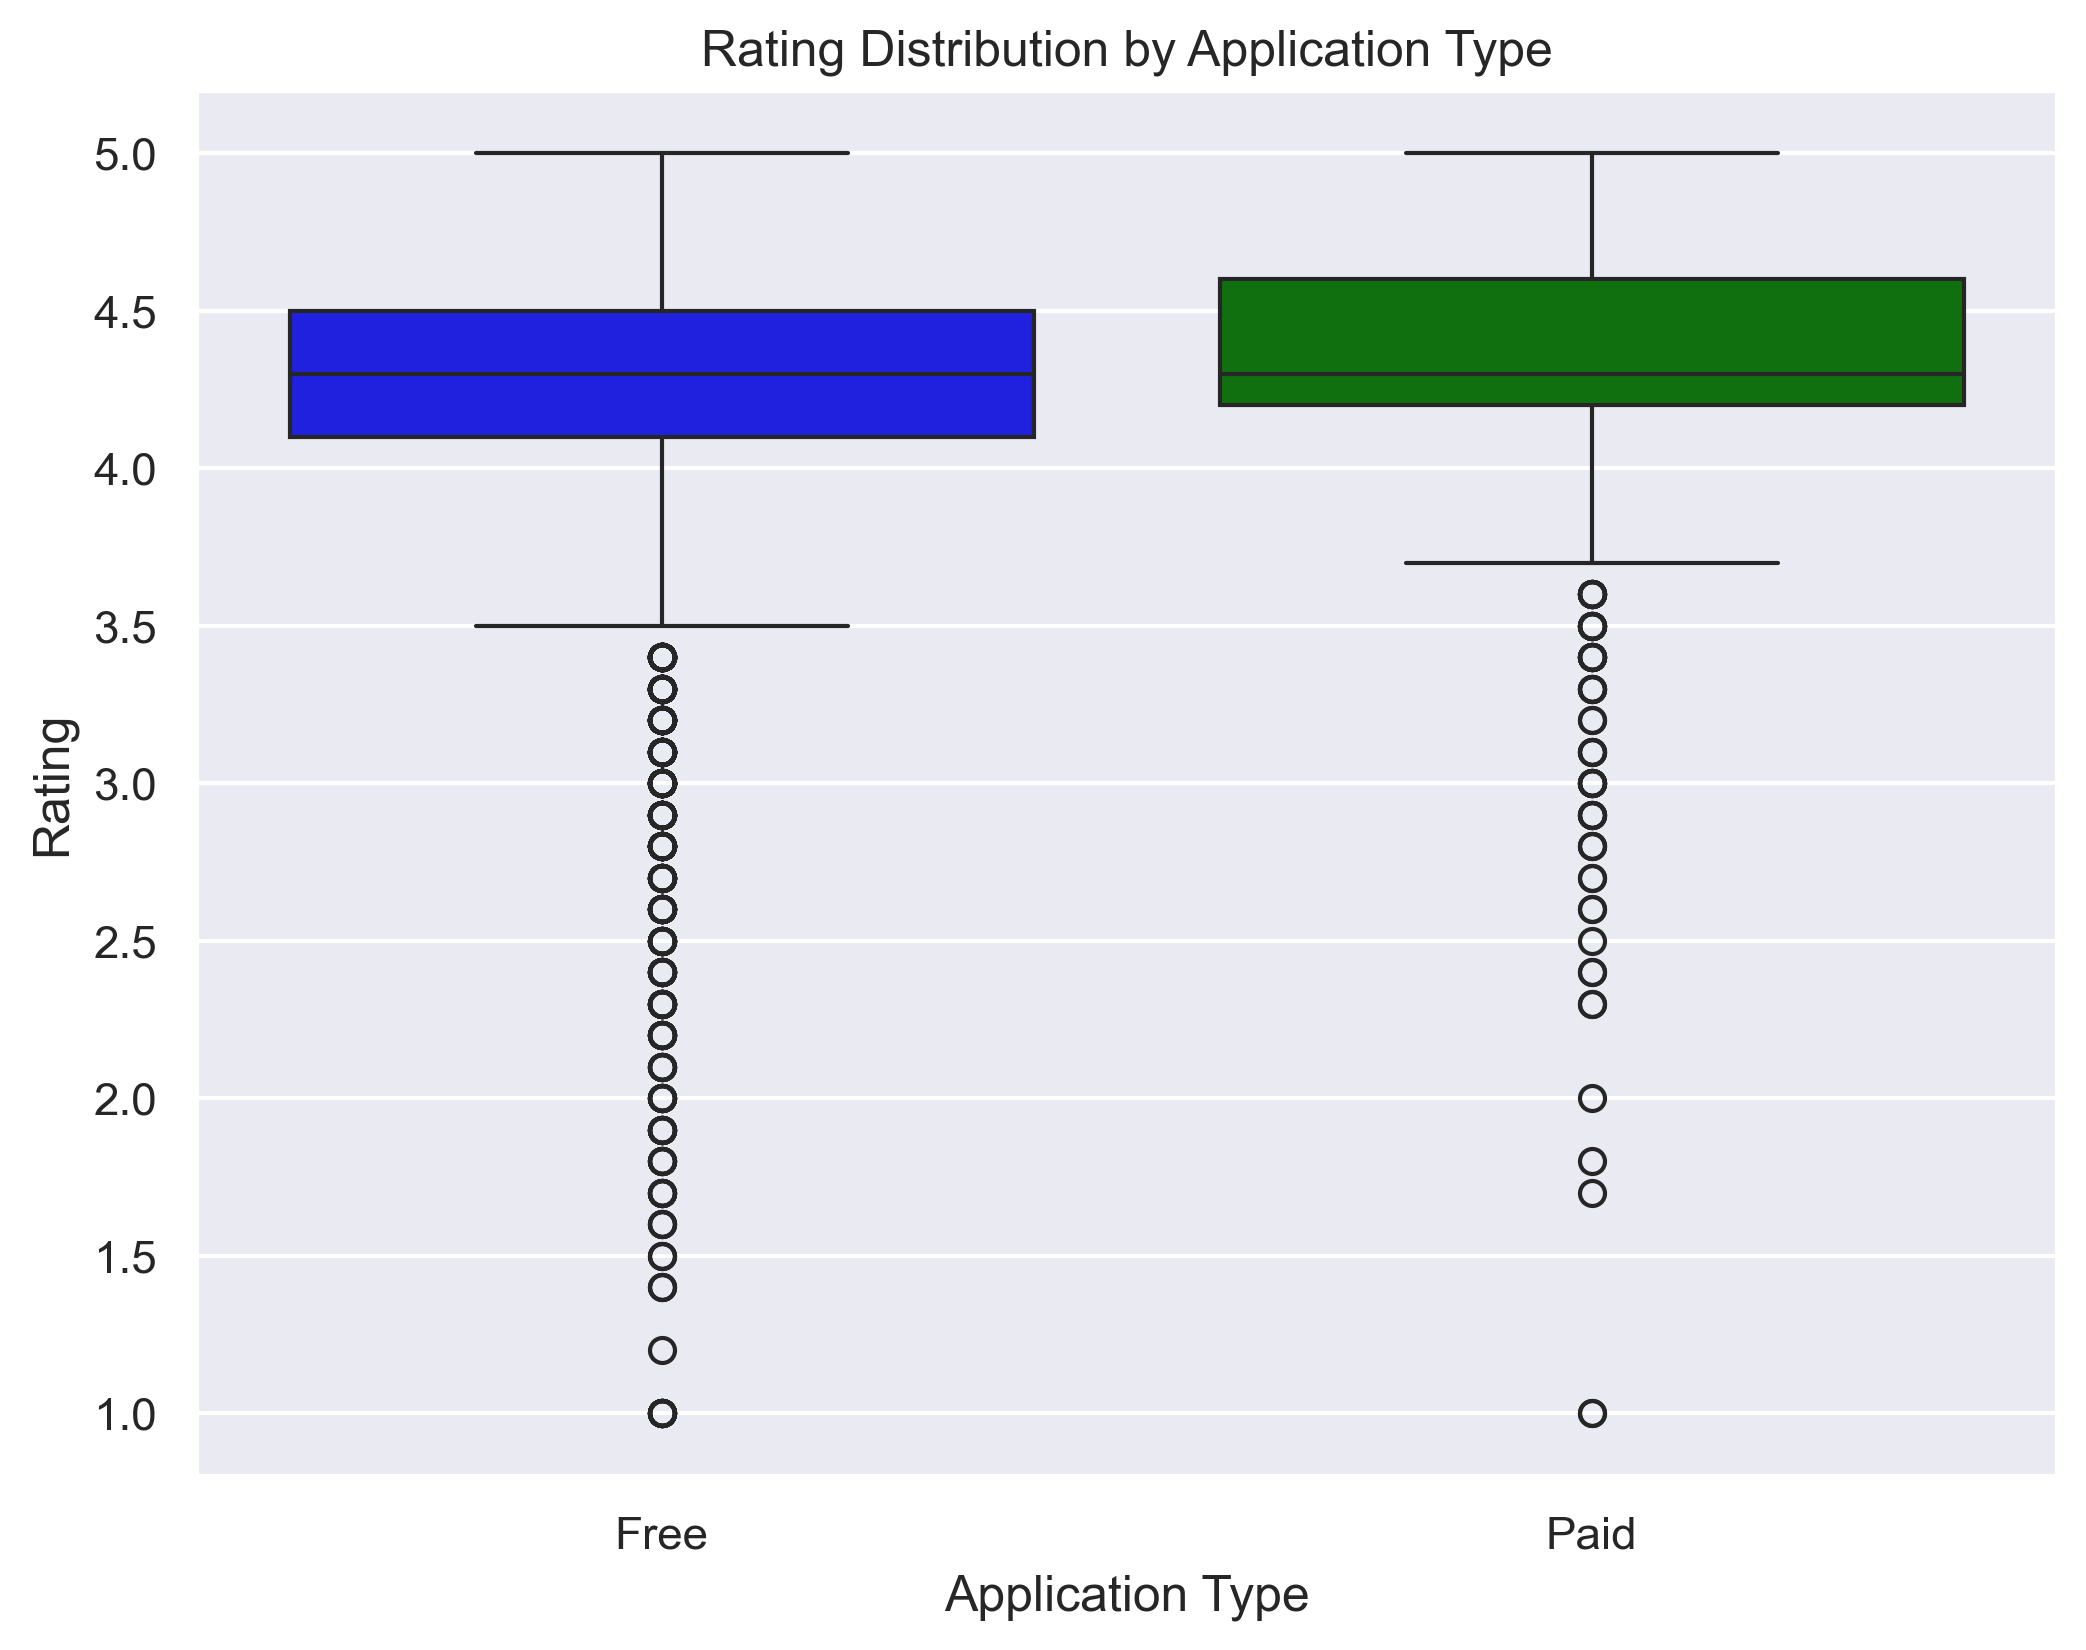

In [86]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Type', y='Rating', data=df, palette={"Free": "blue", "Paid": "green"})

plt.xlabel('Application Type')
plt.ylabel('Rating')
plt.title('Rating Distribution by Application Type')

plt.show()

**Lower horizontal line (whisker) = Minimum:** Represents the lowest value in the dataset. However, this line ignores outliers.

**Upper horizontal line (whisker) = Maximum:** Represents the highest value in the dataset. However, this line also ignores outliers.

**Lower edge of the box = First Quartile (Q1):** Represents the first quartile (the first 25%) of the dataset.

**Upper edge of the box = Third Quartile (Q3):** Represents the third quartile (the first 75%) of the dataset.

**Horizontal line inside the box = Median (Q2):** Represents the median (middle value) of the dataset.

**IQR (Interquartile Range):** The difference between the first and third quartiles, i.e., the height of the box. The IQR shows how spread out the data distribution is.

**Outliers:** Points outside the upper and lower horizontal lines represent outliers.

**Box:** Represents the area between the first quartile (Q1) and the third quartile (Q3) and shows the central distribution of the dataset.

This plot allows you to compare the rating distributions of free and paid apps. For example, you can answer questions like whether free apps generally have higher ratings or paid apps have higher ratings. You can also observe the presence of outliers.

## <font color='red'><b> What are the categories of ratings and their counts?</b><font color='black'> 

Showing how frequently different "Rating" categories appear in the dataset.

**plt.figure(figsize=(15, 10)):** Sets the size of the figure using the Matplotlib library. The width is set to 15 units and the height to 10 units.

**sns.countplot(x="Rating", data=df):** The countplot function of the Seaborn library draws a vertical bar plot showing the count of values in the "Rating" column. The x parameter determines which column to use, and the data parameter specifies the dataframe.

**plt.title("Rating Categories and Their Counts"):** Sets the title of the chart.

**plt.xlabel("Rating Categories") and plt.ylabel("Number of Apps"):** Sets the labels for the X and Y axes.

**plt.show():** Displays the chart on the screen.

 - Which rating category has the most or the fewest observations?

 - What is the distribution of ratings? (e.g., do most apps have high or low ratings?)

 - Is there a noticeable imbalance among the rating categories?

In [87]:
rating_counts = df['Rating'].value_counts().sort_index()
rating_counts

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      12
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      20
2.6      24
2.7      23
2.8      40
2.9      45
3.0      82
3.1      69
3.2      63
3.3     101
3.4     127
3.5     157
3.6     169
3.7     231
3.8     293
3.9     372
4.0     538
4.1     656
4.2     887
4.3    2476
4.4    1031
4.5     976
4.6     768
4.7     484
4.8     228
4.9      87
5.0     271
Name: count, dtype: int64

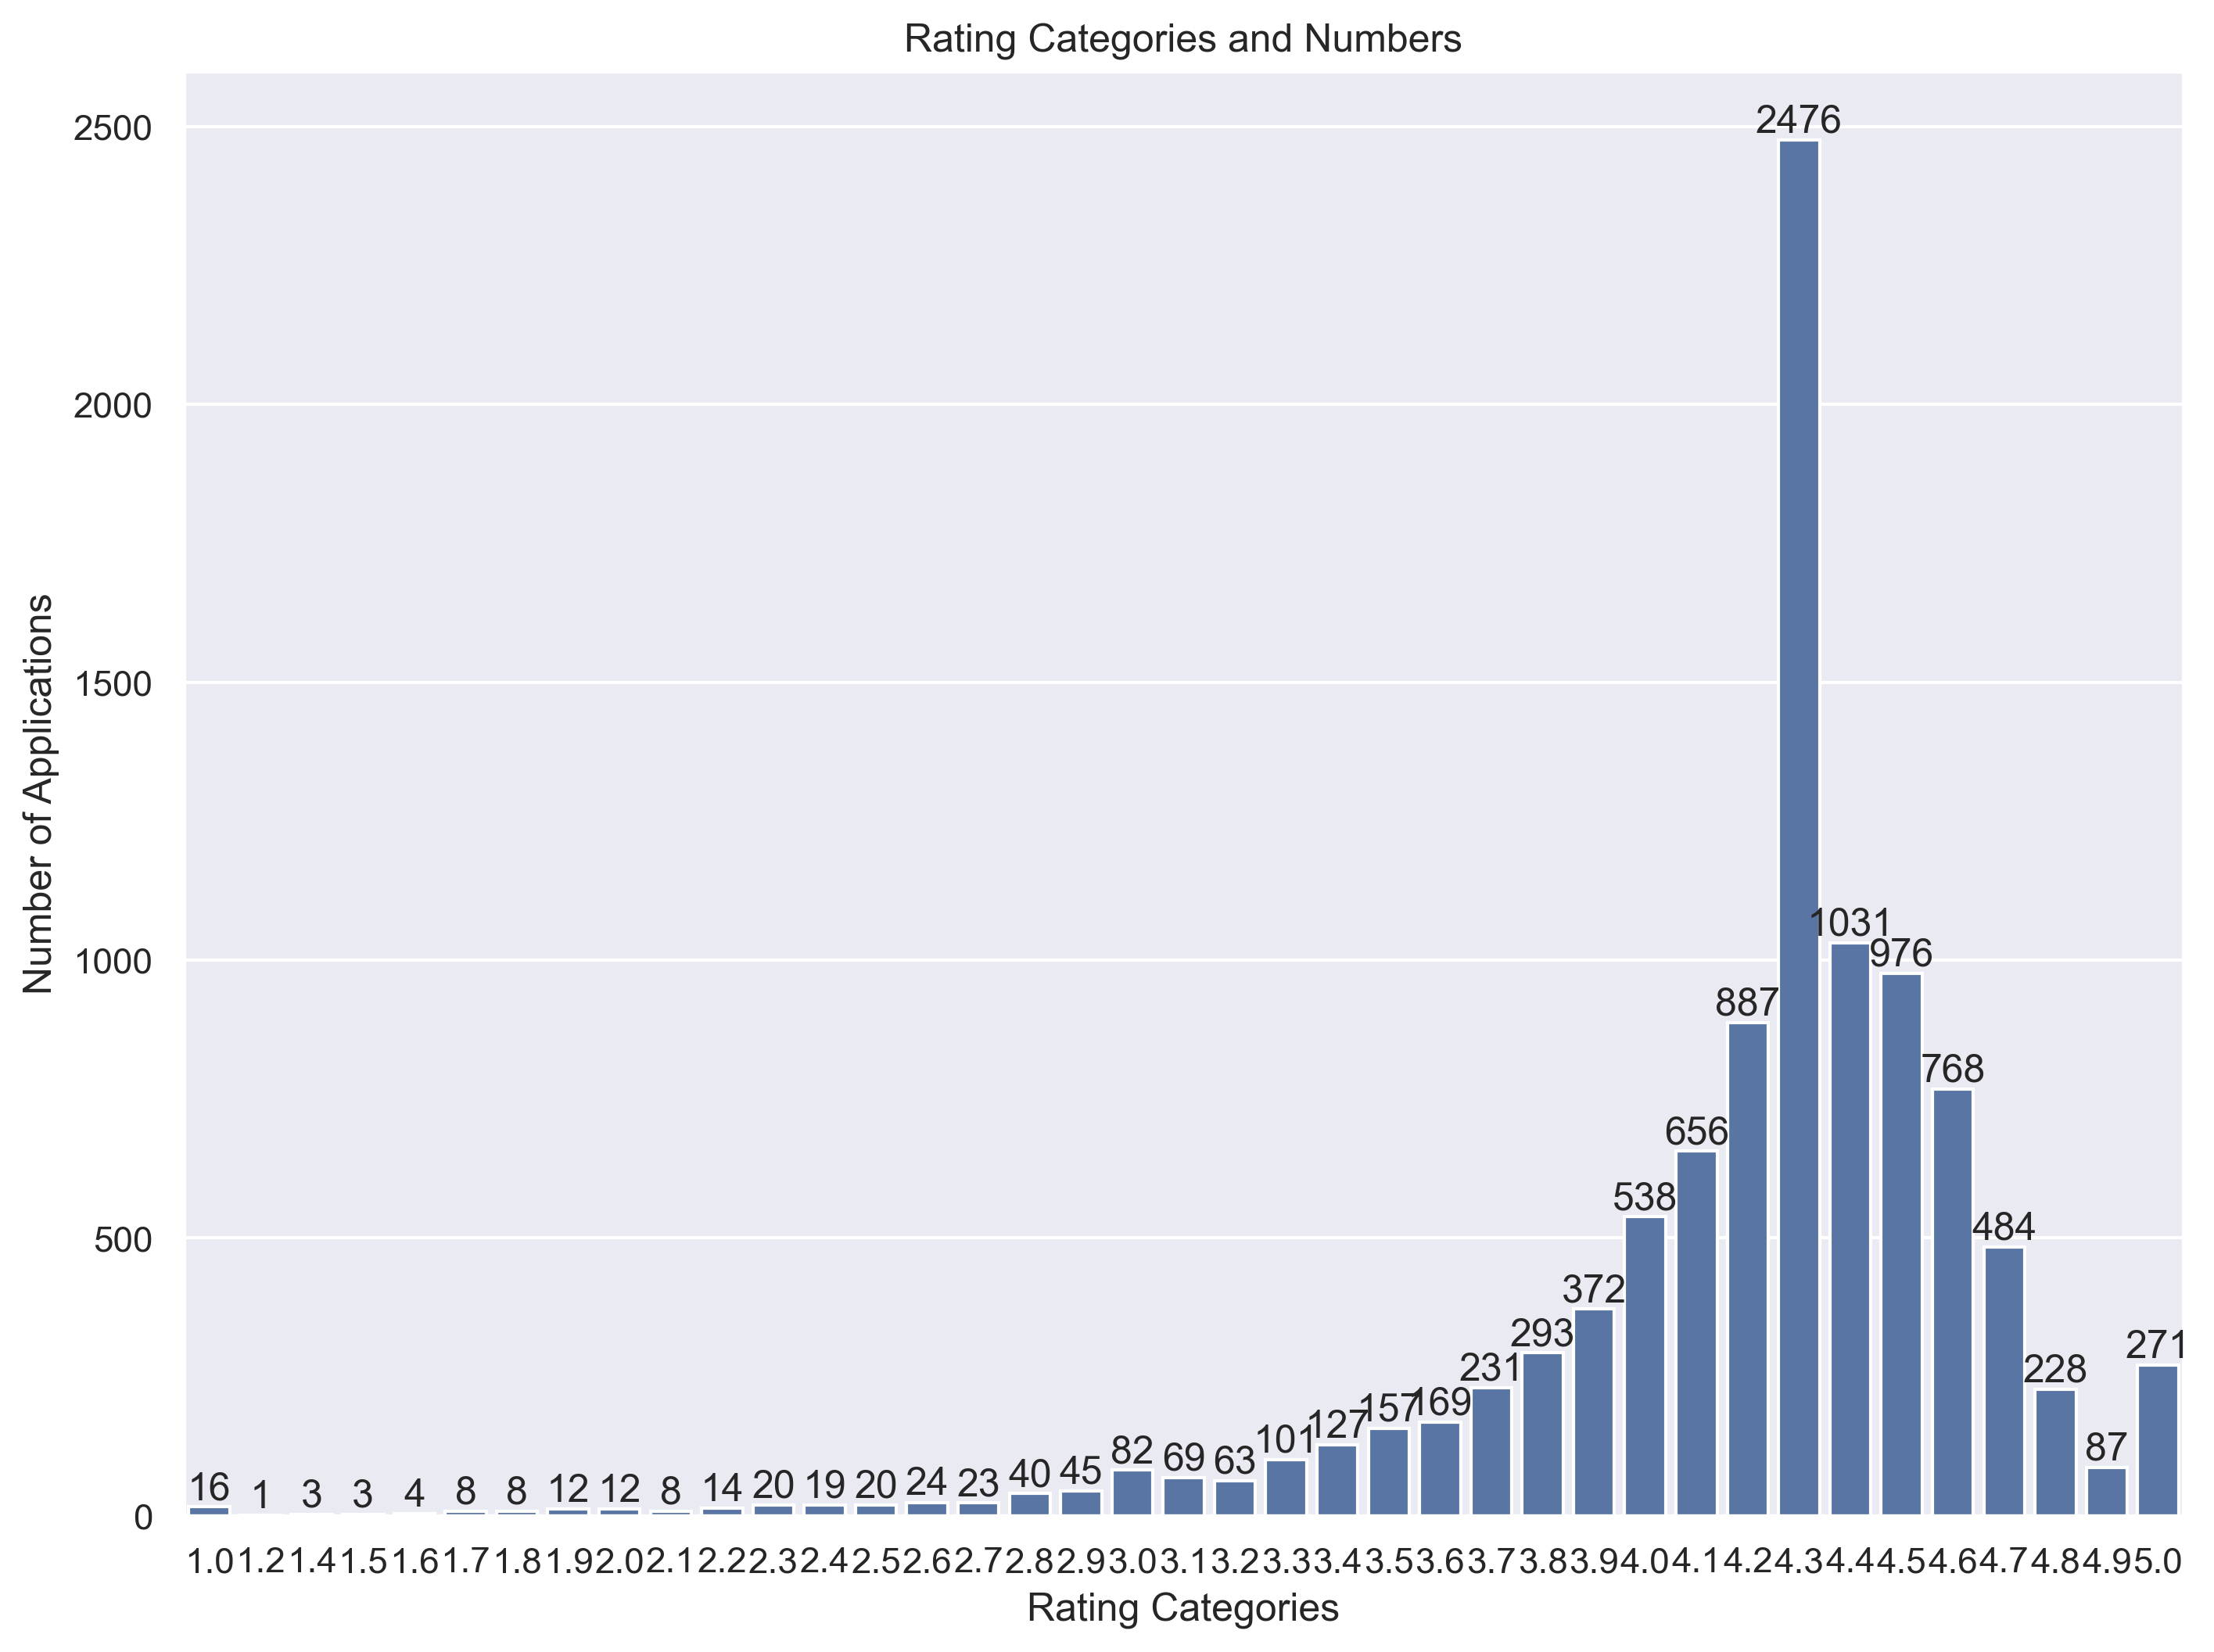

In [88]:
plt.figure(figsize=(11,8))

ax = sns.countplot(x="Rating", data=df)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Rating Categories and Numbers")

plt.xlabel("Rating Categories")
plt.ylabel("Number of Applications")

plt.show()

Showing the distribution of apps in the dataset according to their "Content Rating" categories.

**plt.figure(figsize=(15, 10)):** Sets the size of the figure.

**sns.countplot(y="Content_Rating", data=df, order=df['Content_Rating'].value_counts().index):** Draws a horizontal bar plot showing the count of values in the "Content_Rating" column. The y parameter specifies which column to use. The order parameter sorts the bars from the highest to the lowest count.

**plt.title("Content Ratings and Their Counts"):** Sets the title of the chart.

**plt.xlabel("Number of Apps") and plt.ylabel("Content Rating"):** Sets the labels for the X and Y axes.

**plt.show():** Displays the chart on the screen.

 - Which content rating is most common or rare?

 - What is the distribution among content ratings?

 - How many apps are available for a specific age group or target audience?

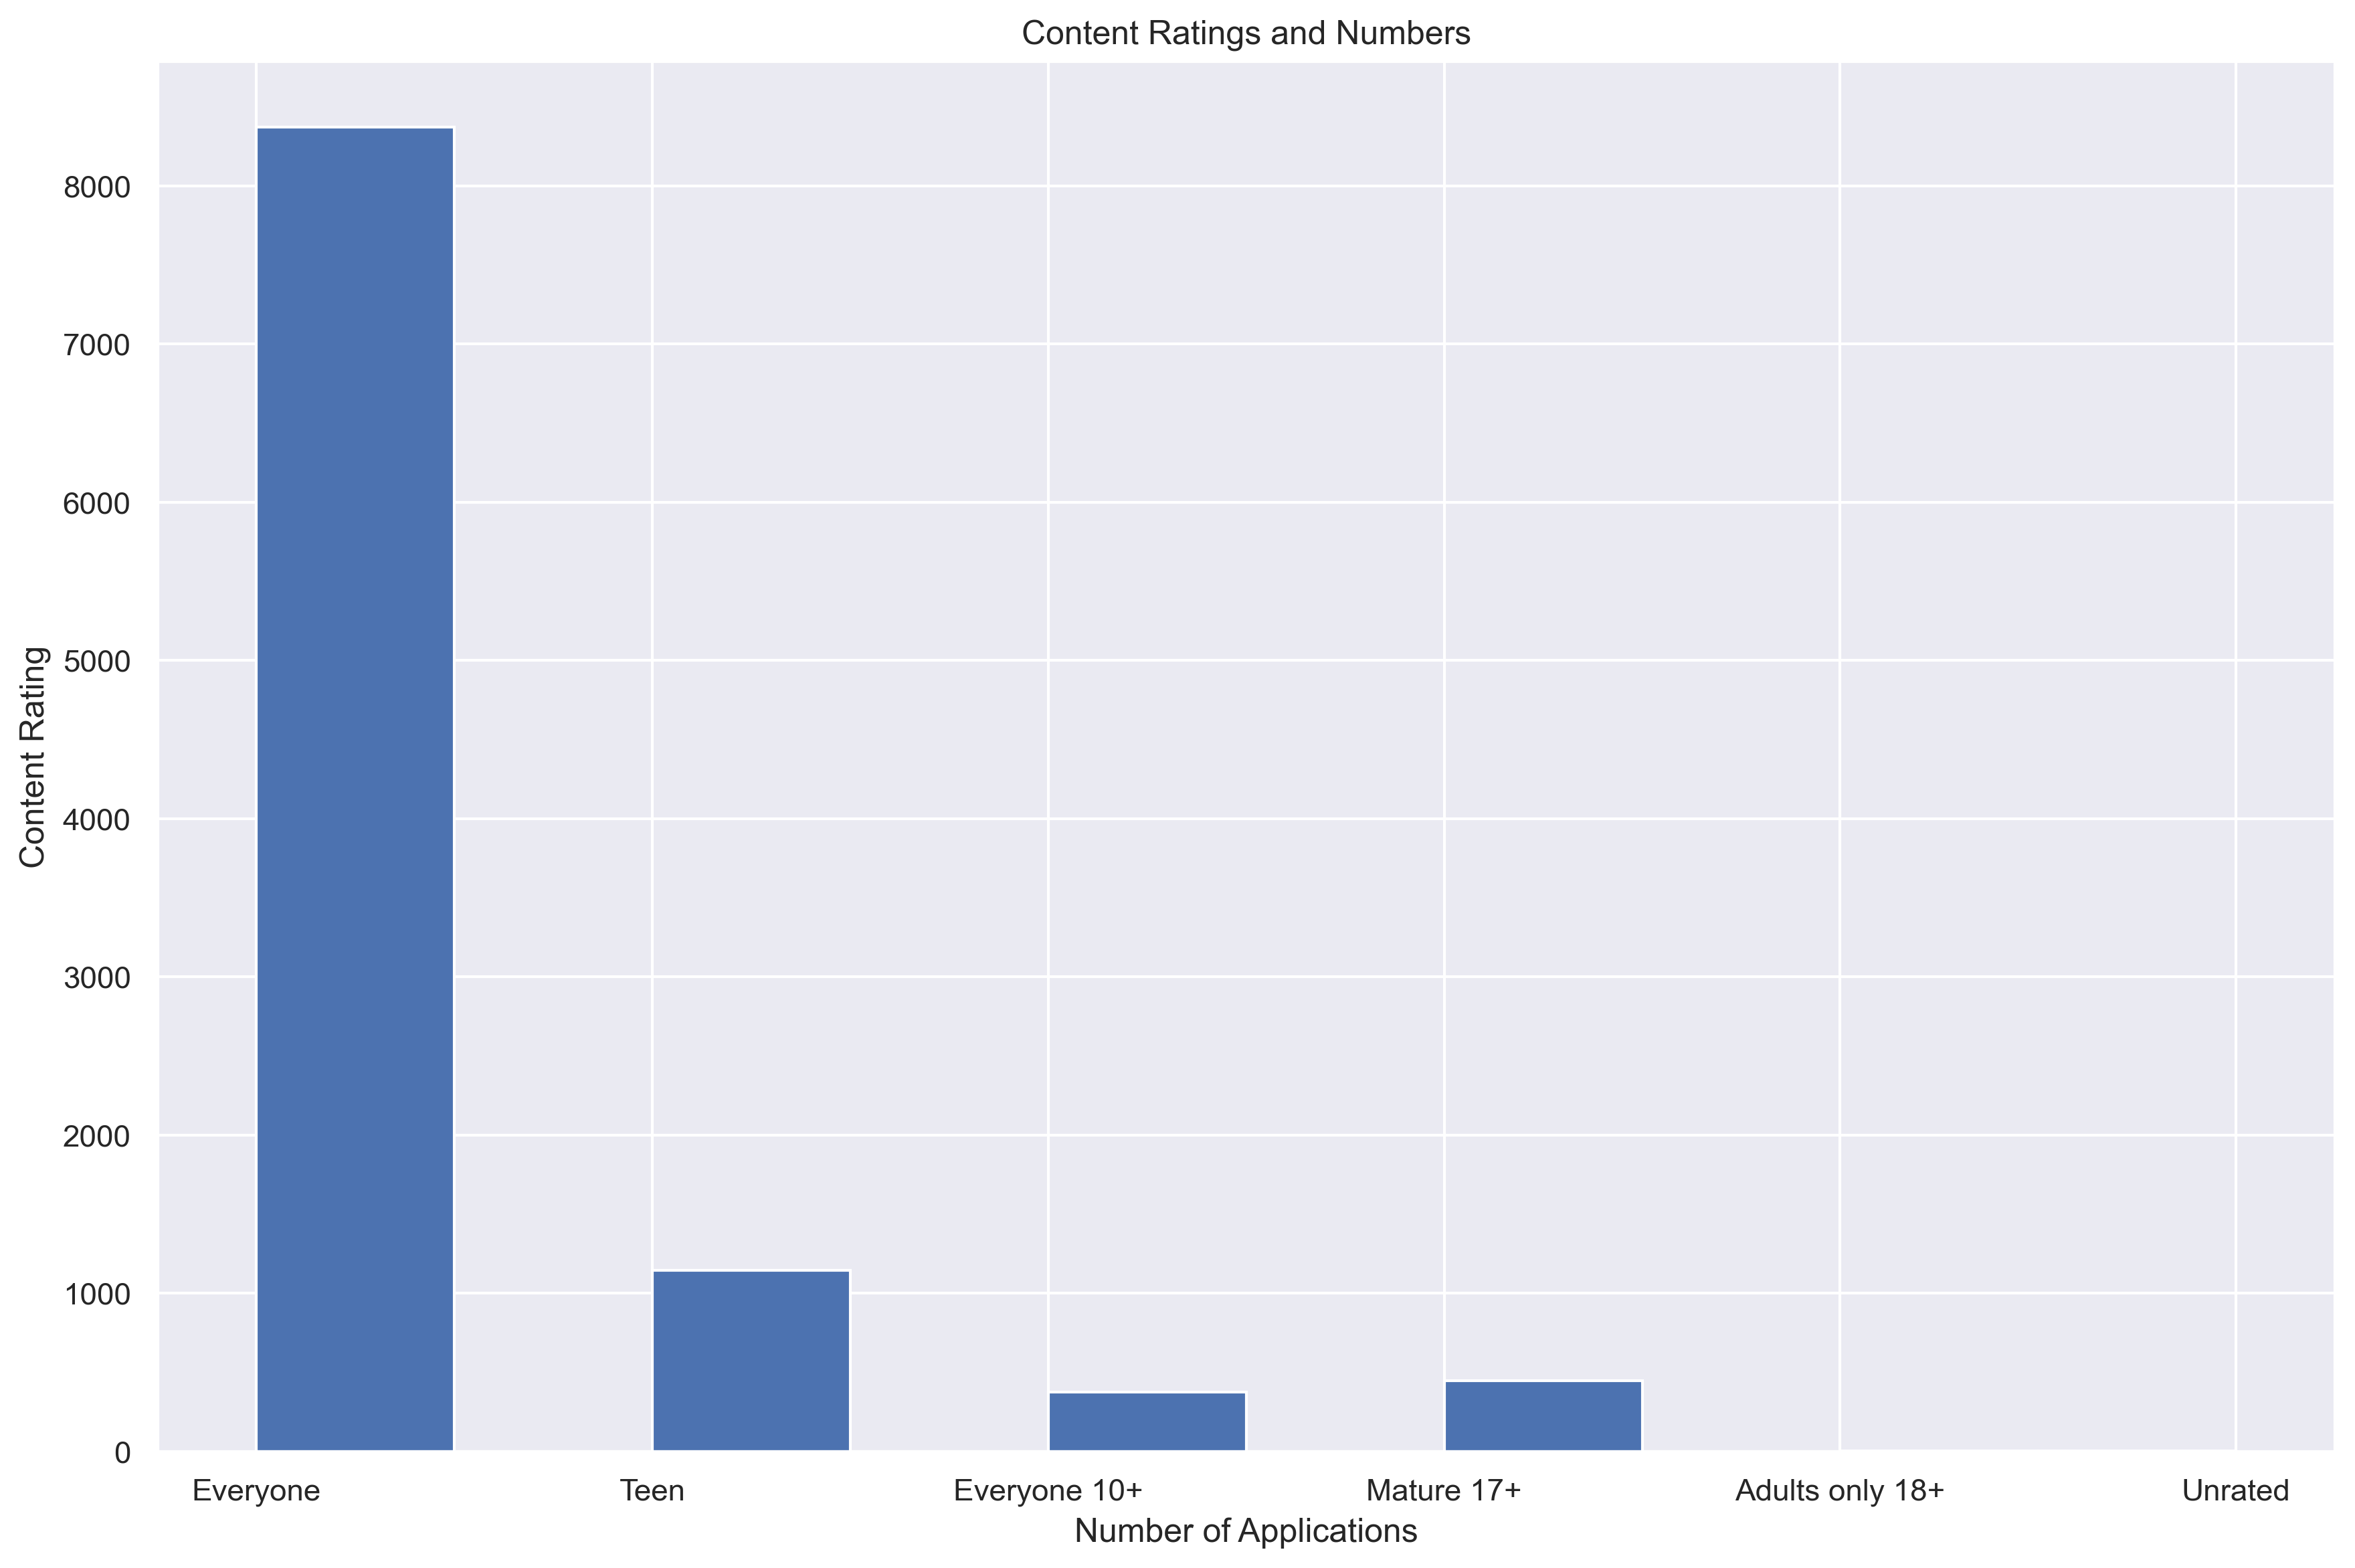

In [89]:
plt.figure(figsize=(14, 9))

plt.hist(x="Content_Rating", data=df)

plt.title("Content Ratings and Numbers")

plt.xlabel("Number of Applications")
plt.ylabel("Content Rating")

plt.show()

In [90]:
content_rating_counts = df['Content_Rating'].value_counts()
content_rating_counts

Content_Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

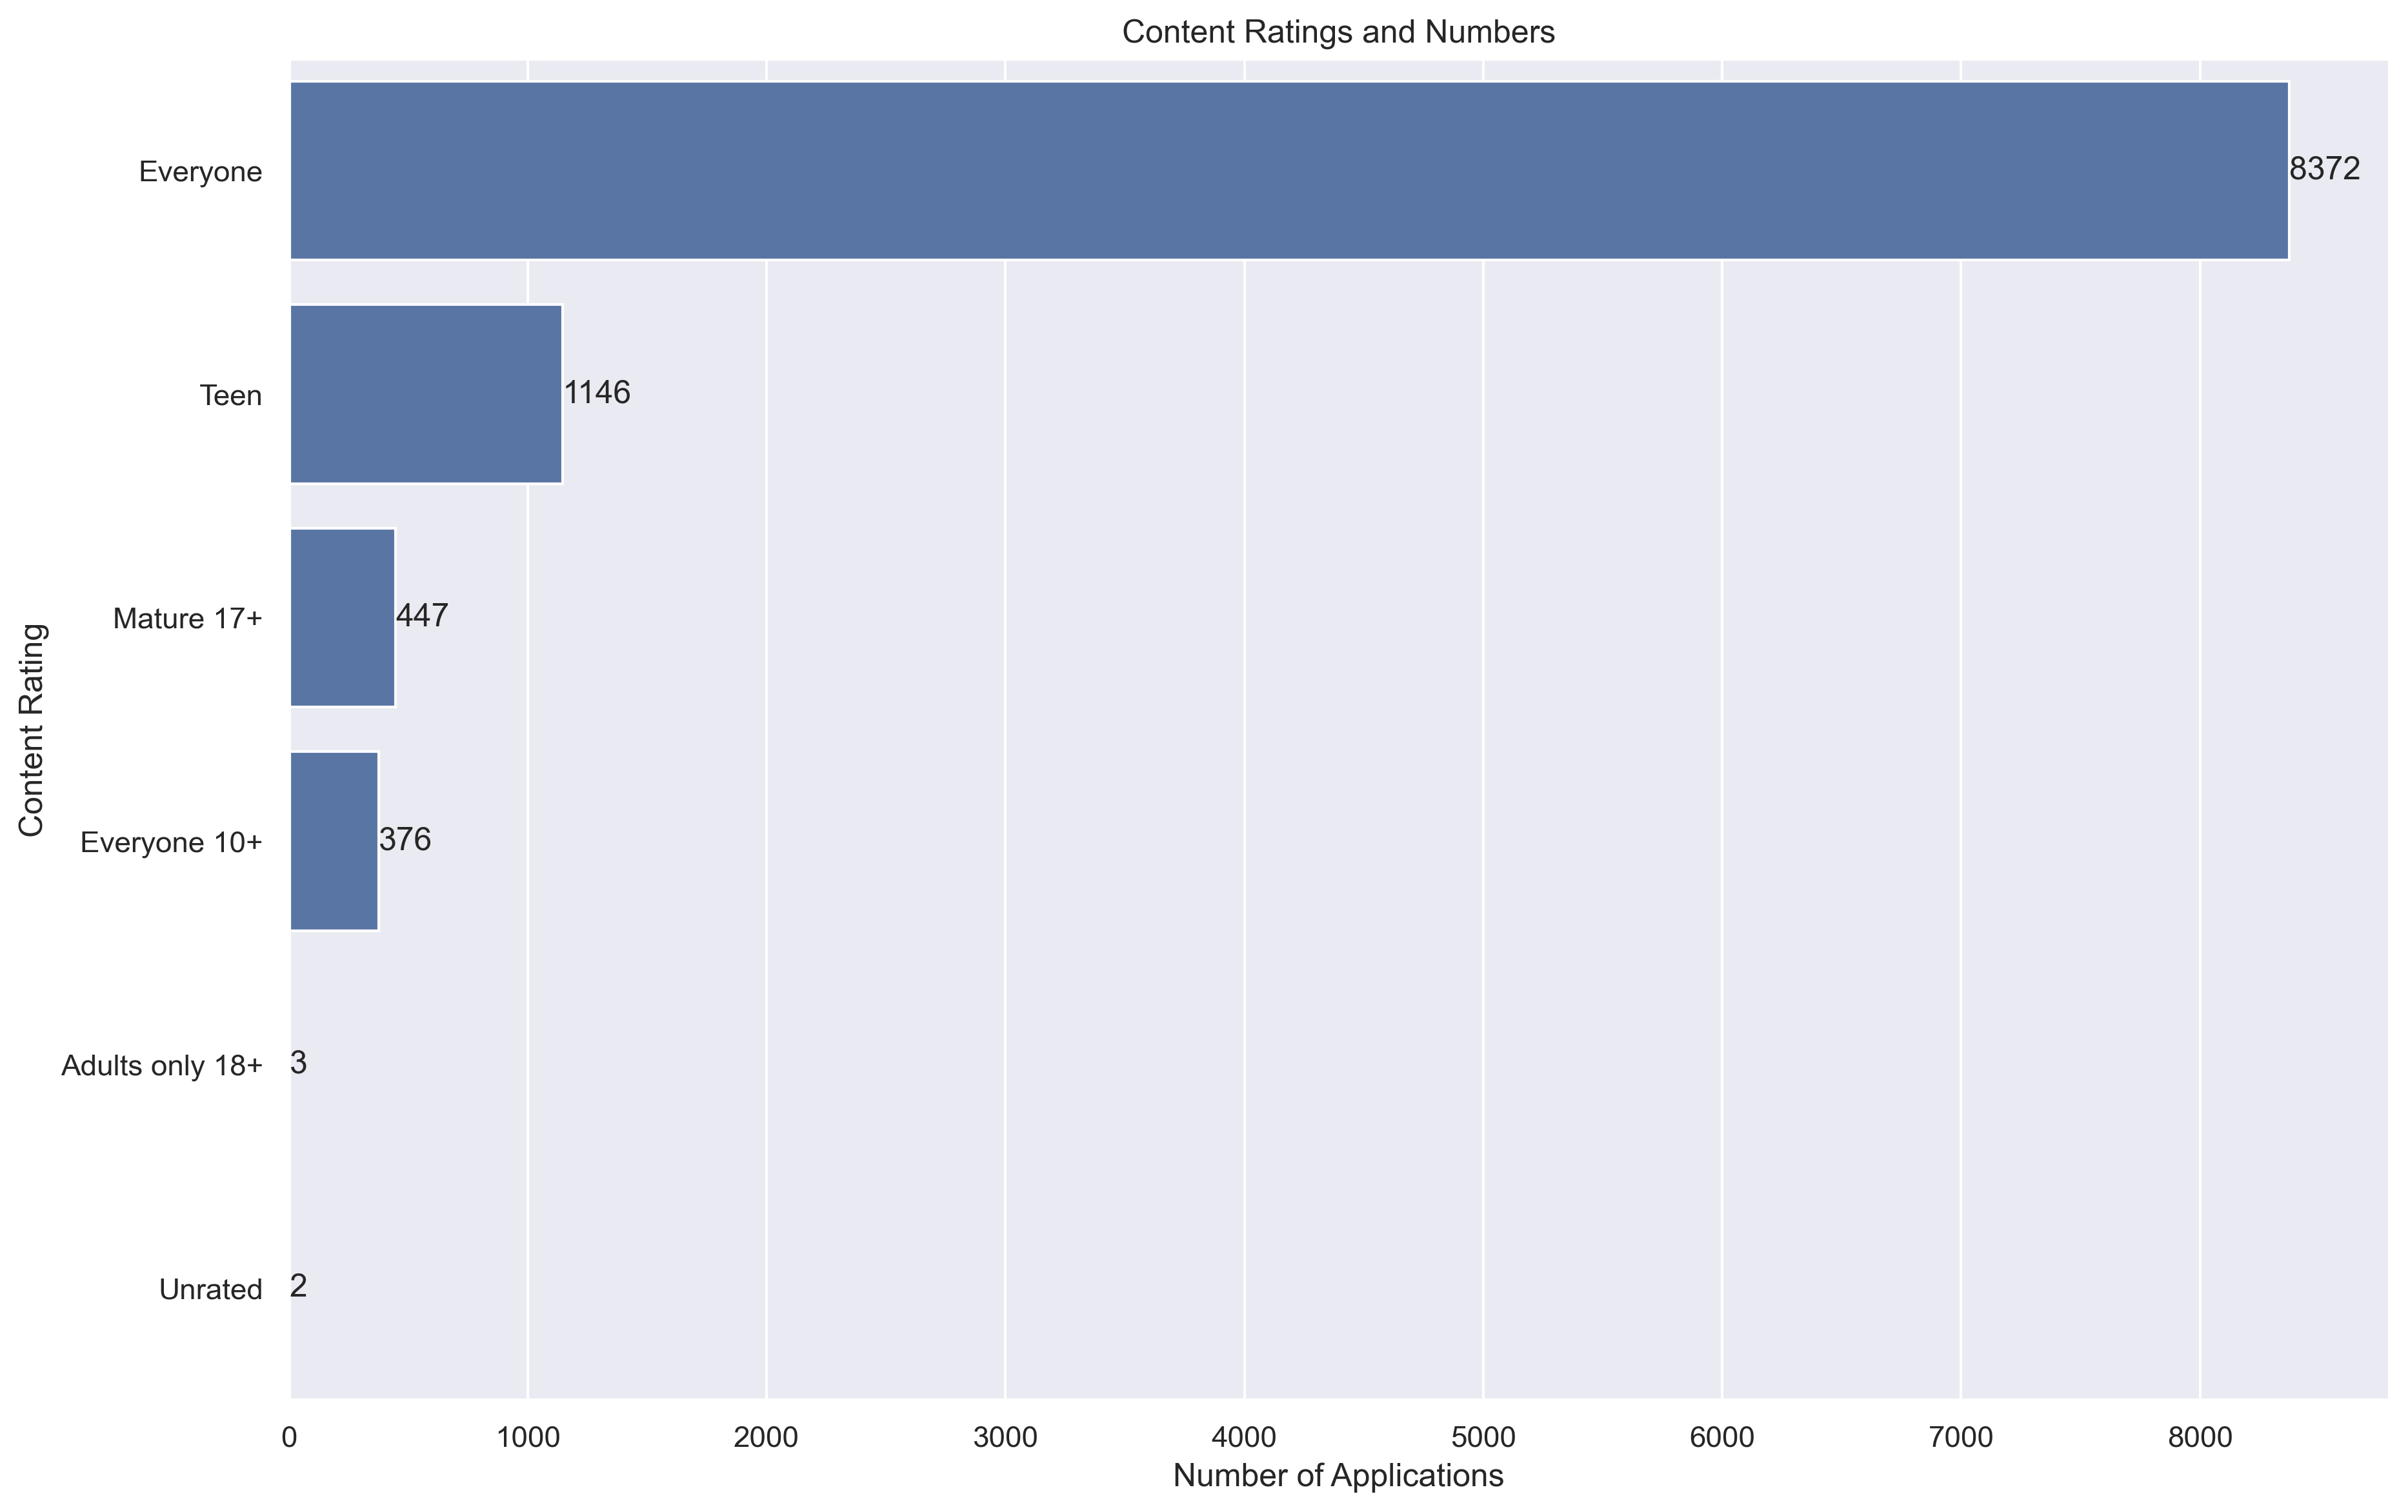

In [91]:
plt.figure(figsize=(14, 9))

ax = sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Content Ratings and Numbers")

plt.xlabel("Number of Applications")
plt.ylabel("Content Rating")

plt.show()

## <font color='red'> <b>How Does Content Rating Affect User Ratings in Apps?</b><font color='black'>

Showing the distribution of user ratings ("Rating") for Android applications with different "Content Rating" categories.

**plt.figure(figsize=(15, 10)):** Sets the size of the plot. The width is set to 15 units, and the height is set to 10 units. (This line is missing in the code, you can add it if you wish.)

**sns.boxplot(x="Content_Rating", y="Rating", data=df):** Draws a box plot using the Seaborn library's boxplot function, showing the distribution of the "Rating" column based on the categories in the "Content_Rating" column. The x and y parameters determine which columns are used, and the data parameter specifies the DataFrame.

**plt.title("The content rating & rating", size=20):** Sets the plot title and title size.

 - What is the rating distribution for each content rating category?

 - Which content rating category has the highest or lowest average rating?

 - Are there significant differences in the rating distribution between content rating categories?

In [92]:
average_ratings_by_content = df.groupby('Content_Rating')['Rating'].mean()
average_ratings_by_content

Content_Rating
Adults only 18+    4.300000
Everyone           4.199164
Everyone 10+       4.256117
Mature 17+         4.138479
Teen               4.245462
Unrated            4.200000
Name: Rating, dtype: float64

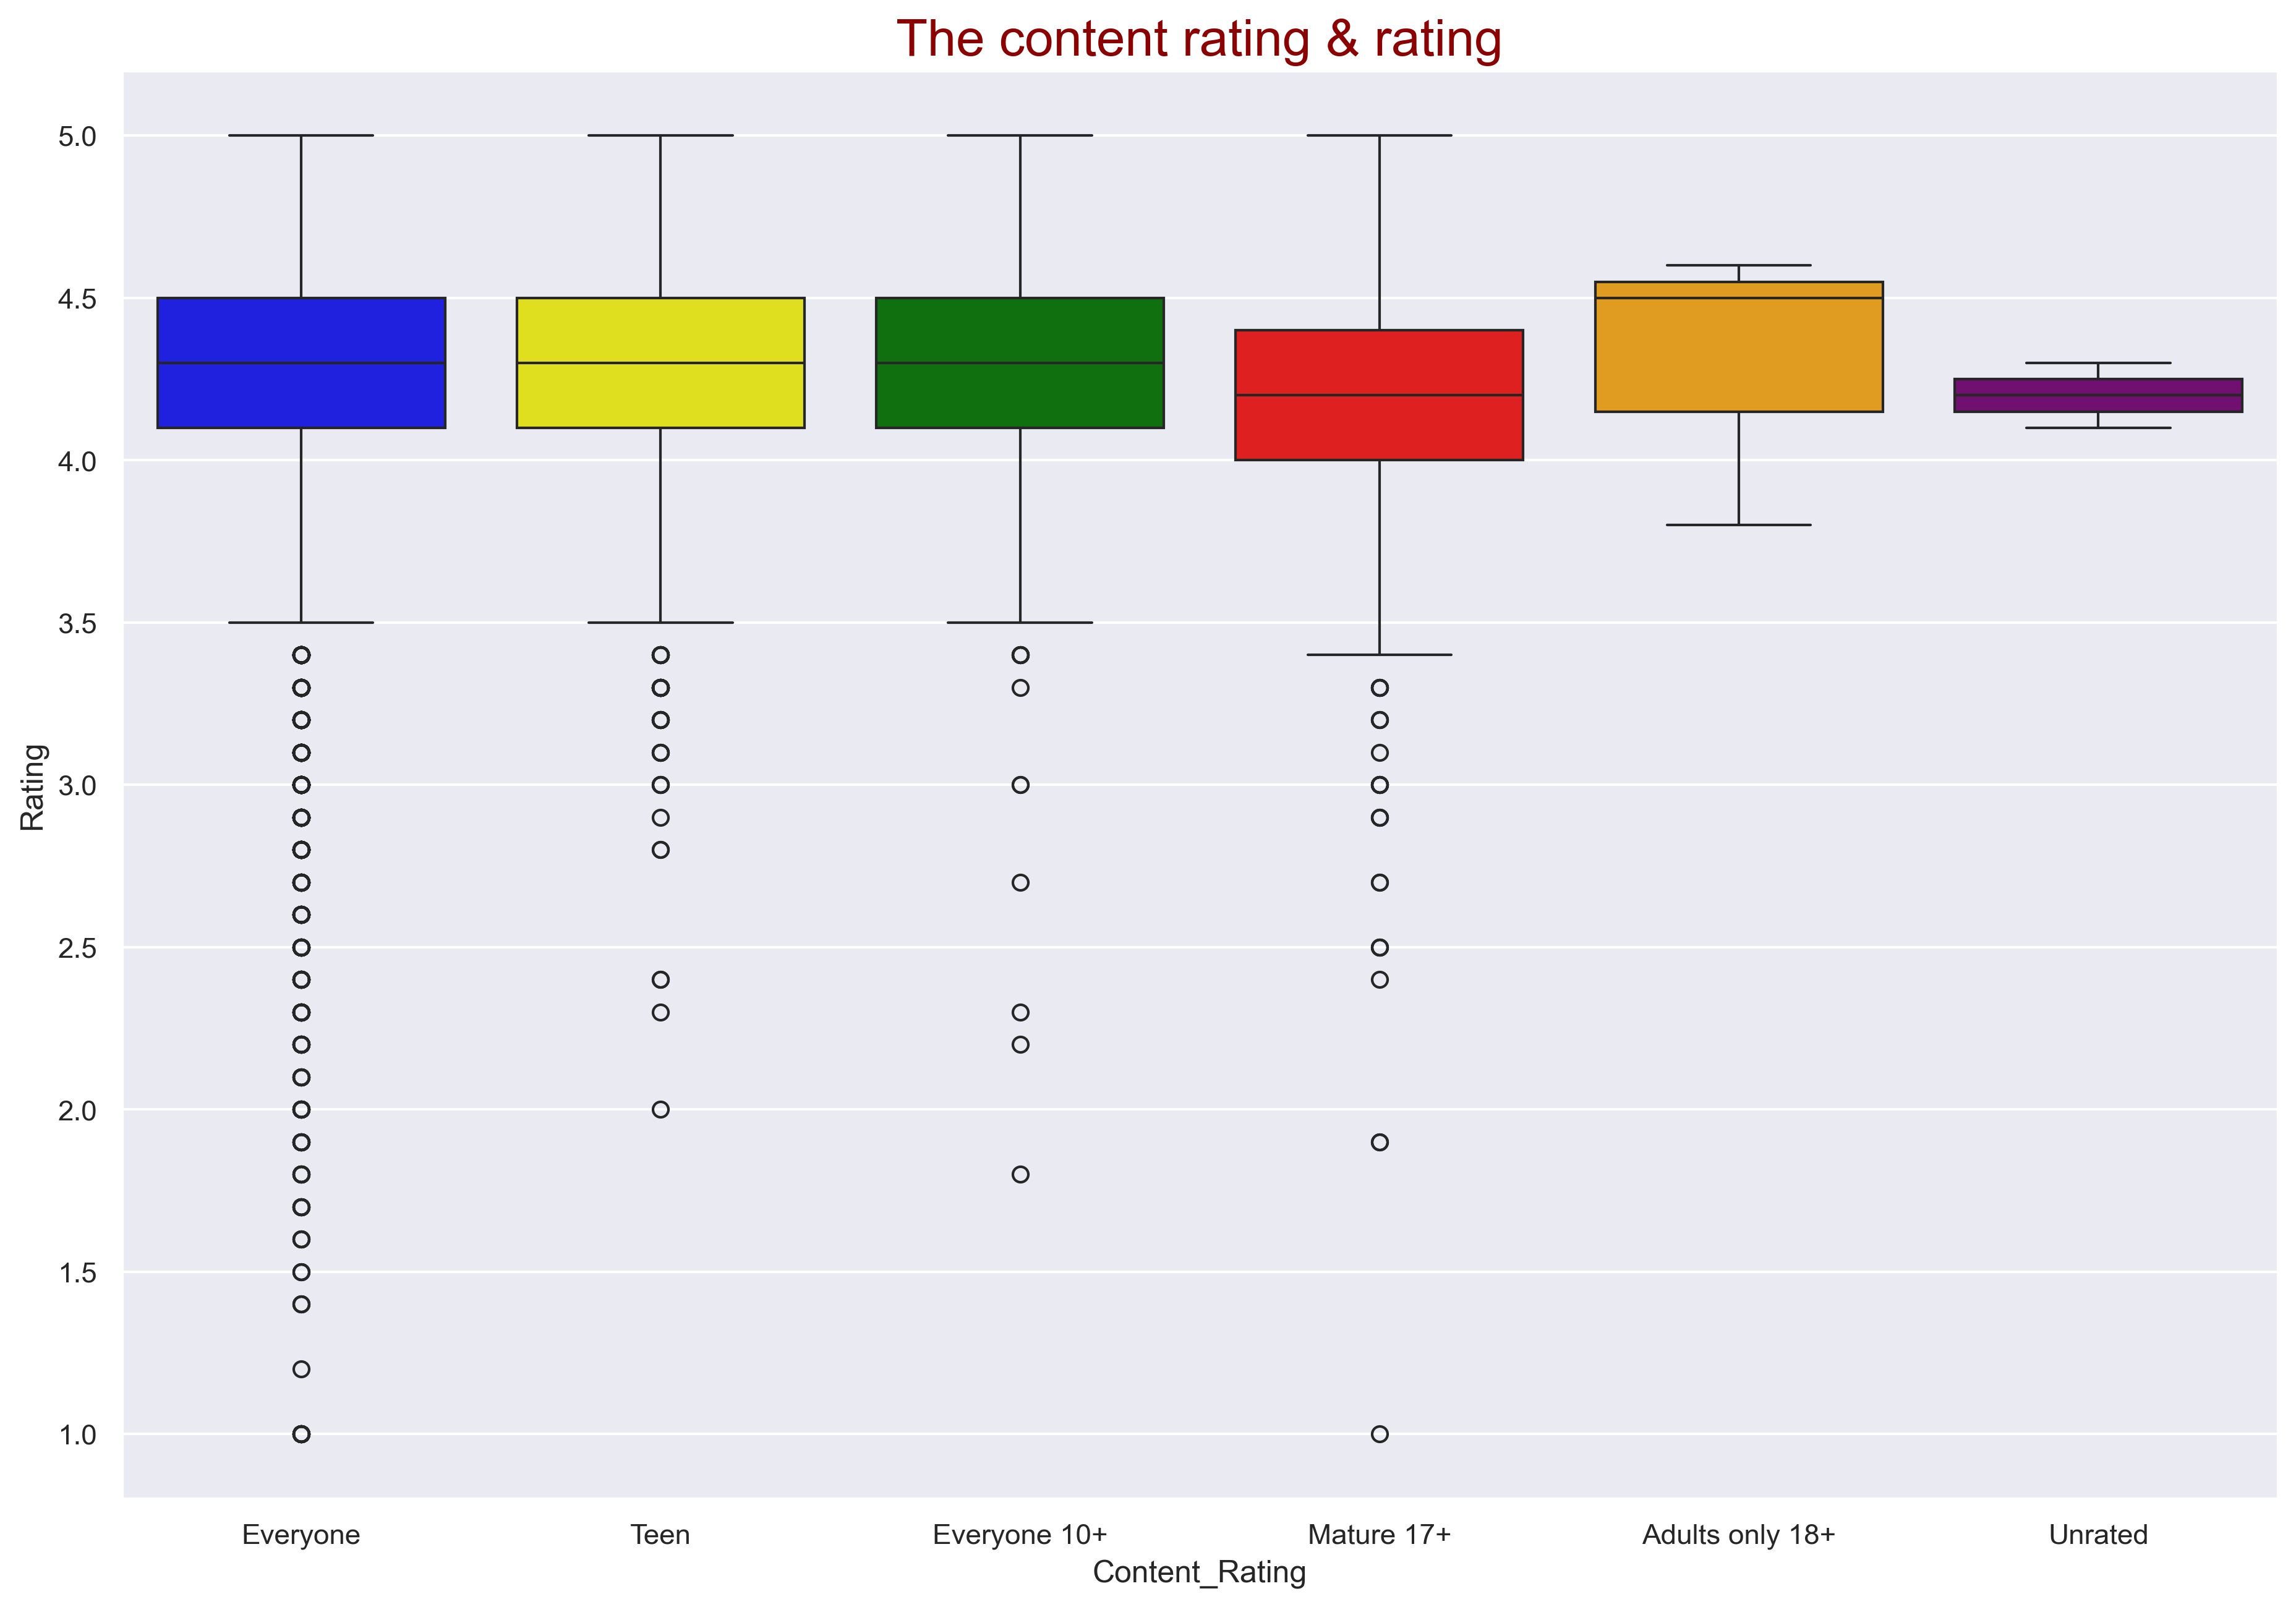

In [93]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="Content_Rating", y="Rating", data=df, palette={"Everyone": "blue", 
                                                              "Teen": "yellow", 
                                                              "Everyone 10+": "green",
                                                              "Mature 17+": "red",
                                                              "Adults only 18+": "orange",
                                                              "Unrated": "purple"})

plt.title("The content rating & rating", fontdict={'fontsize': 20, 'color': 'darkred'})

plt.show()

As you can see, the ratings for Everyone, Teen, and Everyone 10+ are almost the same.

Everyone has more outlier values than other categories.

Mature 17+ has the lowest average rating, while the Adults only 18+ category has a higher average rating than the others.

## <font color='red'> <b>What Is the Number of Applications in Each Category?</b><font color='black'>

**Code Explanation**

**plt.figure(figsize=(15, 10)):** Sets the size of the plot using the Matplotlib library. The width is set to 15 units, and the height is set to 10 units.

**sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index):** Draws a horizontal bar plot using Seaborn's countplot function, showing the number of values in the "Category" column. The y parameter determines which column is used, and the data parameter specifies the DataFrame. The order parameter sorts the bars from the highest count to the lowest.

**plt.title("Number of Applications by Category", fontdict={'fontsize': 20, 'color': 'darkred'}):** Sets the plot title and title size. The fontdict parameter specifies a dictionary for the title, setting the font size to 20 and the color to 'darkred'.

**plt.xlabel("Number of Applications") and plt.ylabel("Categories"):** Sets the labels for the X and Y axes.

**plt.show():** Displays the plot on the screen.

In [94]:
category_counts = df['Category'].value_counts()
category_counts

Category
Family                 1939
Game                   1121
Tools                   841
Business                427
Medical                 408
Productivity            407
Personalization         386
Lifestyle               373
Communication           366
Finance                 360
Sports                  351
Photography             322
Health and fitness      306
Social                  280
News and magazines      264
Travel and local        237
Books and reference     229
Shopping                224
Dating                  196
Video players           175
Maps and navigation     137
Education               130
Food and drink          124
Entertainment           111
Auto and vehicles        85
Libraries and demo       84
Weather                  82
House and home           80
Events                   64
Art and design           64
Parenting                60
Comics                   60
Beauty                   53
Name: count, dtype: int64

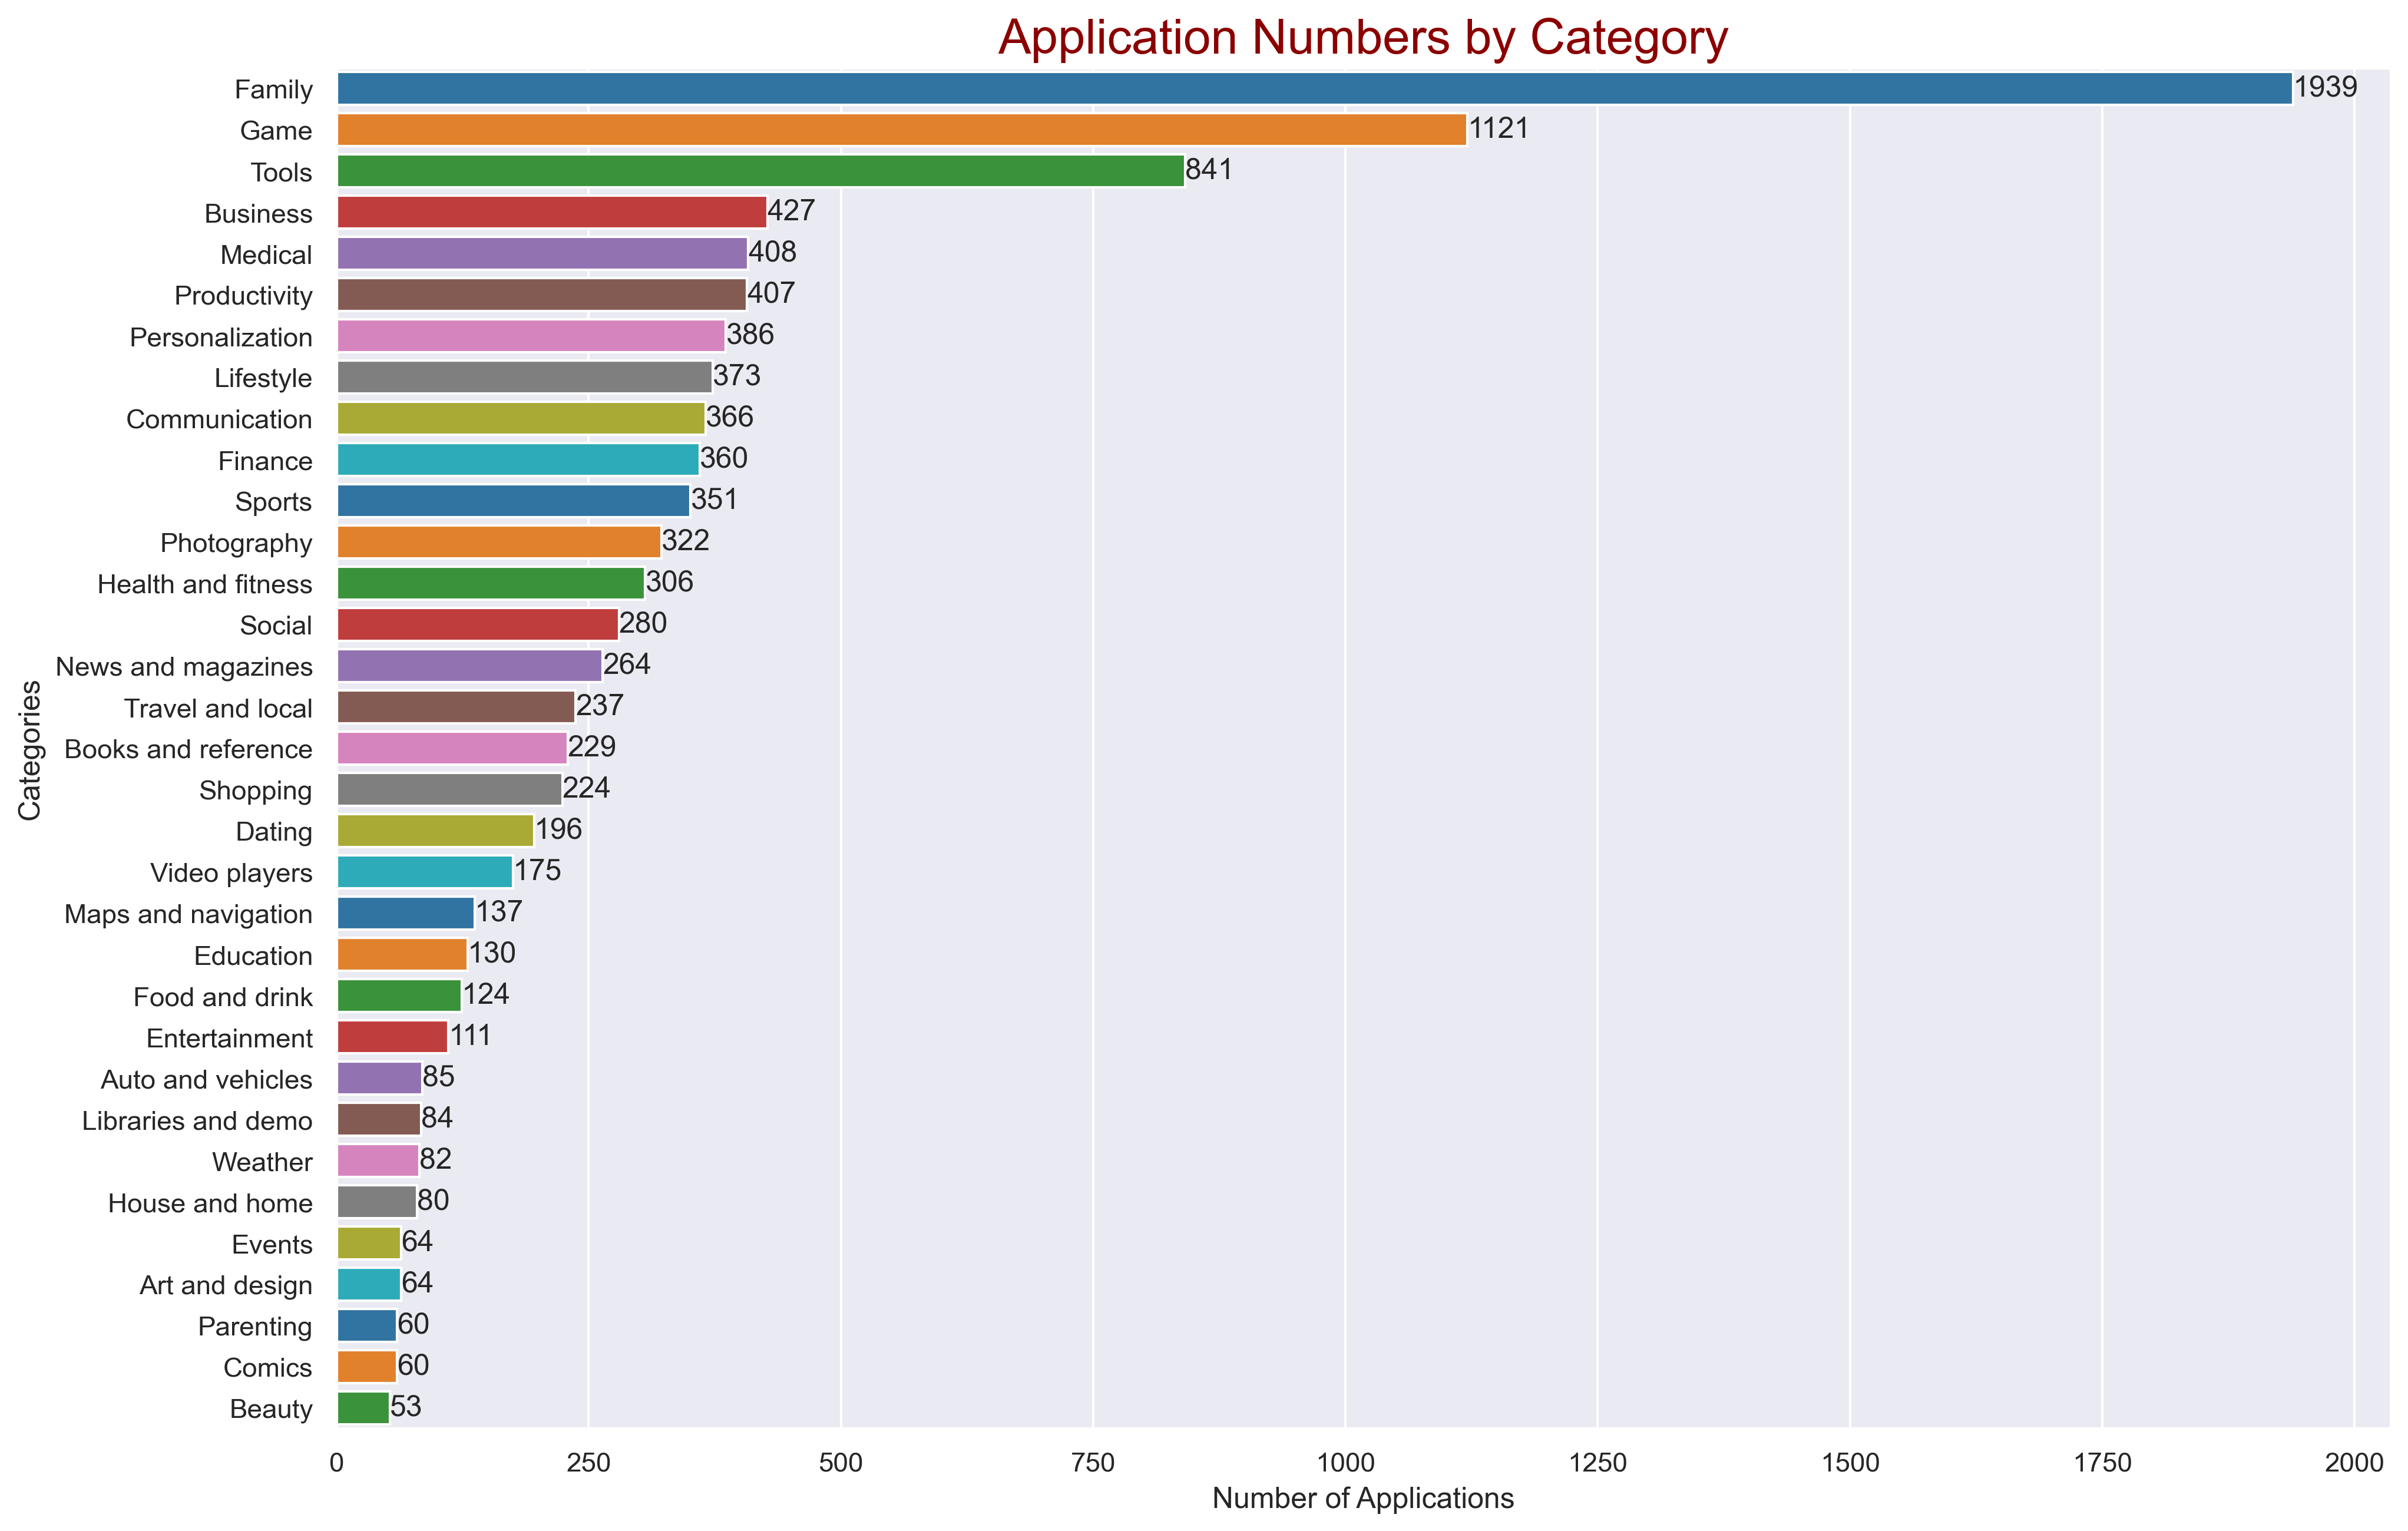

In [95]:
plt.figure(figsize=(15, 10))

ax = sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette='tab10')

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Application Numbers by Category", fontdict={'fontsize': 20, 'color': 'darkred'})

plt.xlabel("Number of Applications")
plt.ylabel("Categories")

plt.show()

Most applications are in the Family category, followed by Game and then Tools.

## <font color='red'> <b>Which Categories Have the Highest Total Spending in Apps?</b><font color='black'>

Drawing a bar chart showing the top 5 categories with the highest spending in the Google Play Store and the total spending in these categories.

**total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False): Calculate total spending by category:** Group by the 'Category' column to calculate the total spending in each category.

**top5_categories = total_spending_by_category.nlargest(5): Select the top 5 categories with the highest spending:** Sort total spending from largest to smallest and select the top 5 categories with the highest spending.

**plt.figure(figsize=(15, 10)): Draw the bar chart:** Draw a bar chart showing the selected 5 categories and the total spending in these categories. We set the size of the plot to (15, 10).

**plt.xlabel('Category') plt.ylabel('Total Spending') plt.title('Top 5 Categories by Spending') Axis labels and title:** Add 'Category' to the X-axis and 'Total Spending' to the Y-axis. The plot's title is 'Top 5 Categories by Spending'.

**plt.show(): Display:** Display the plot on the screen.

 - Which categories have the highest total prices?

 - Which categories might have higher pricing strategies?
 

In [96]:
total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False)
total_spending_by_category

Category
Finance                2900.83
Family                 2419.83
Lifestyle              2360.87
Medical                1020.69
Game                    287.30
Tools                   266.26
Productivity            250.93
Business                175.29
Personalization         149.98
Photography             122.23
Books and reference     119.77
Events                  109.99
Sports                  100.00
Communication            83.14
Health and fitness       64.35
Travel and local         49.95
Weather                  32.42
Dating                   31.43
Maps and navigation      26.95
Education                17.96
Social                   15.97
Auto and vehicles        13.47
Video players            10.46
Parenting                 9.58
Food and drink            8.48
Entertainment             7.98
Art and design            5.97
Shopping                  5.48
News and magazines        3.98
Libraries and demo        0.99
Comics                    0.00
Beauty                    0.00

In [97]:
top5_categories = total_spending_by_category.nlargest(5)
top5_categories

Category
Finance      2900.83
Family       2419.83
Lifestyle    2360.87
Medical      1020.69
Game          287.30
Name: Price, dtype: float64

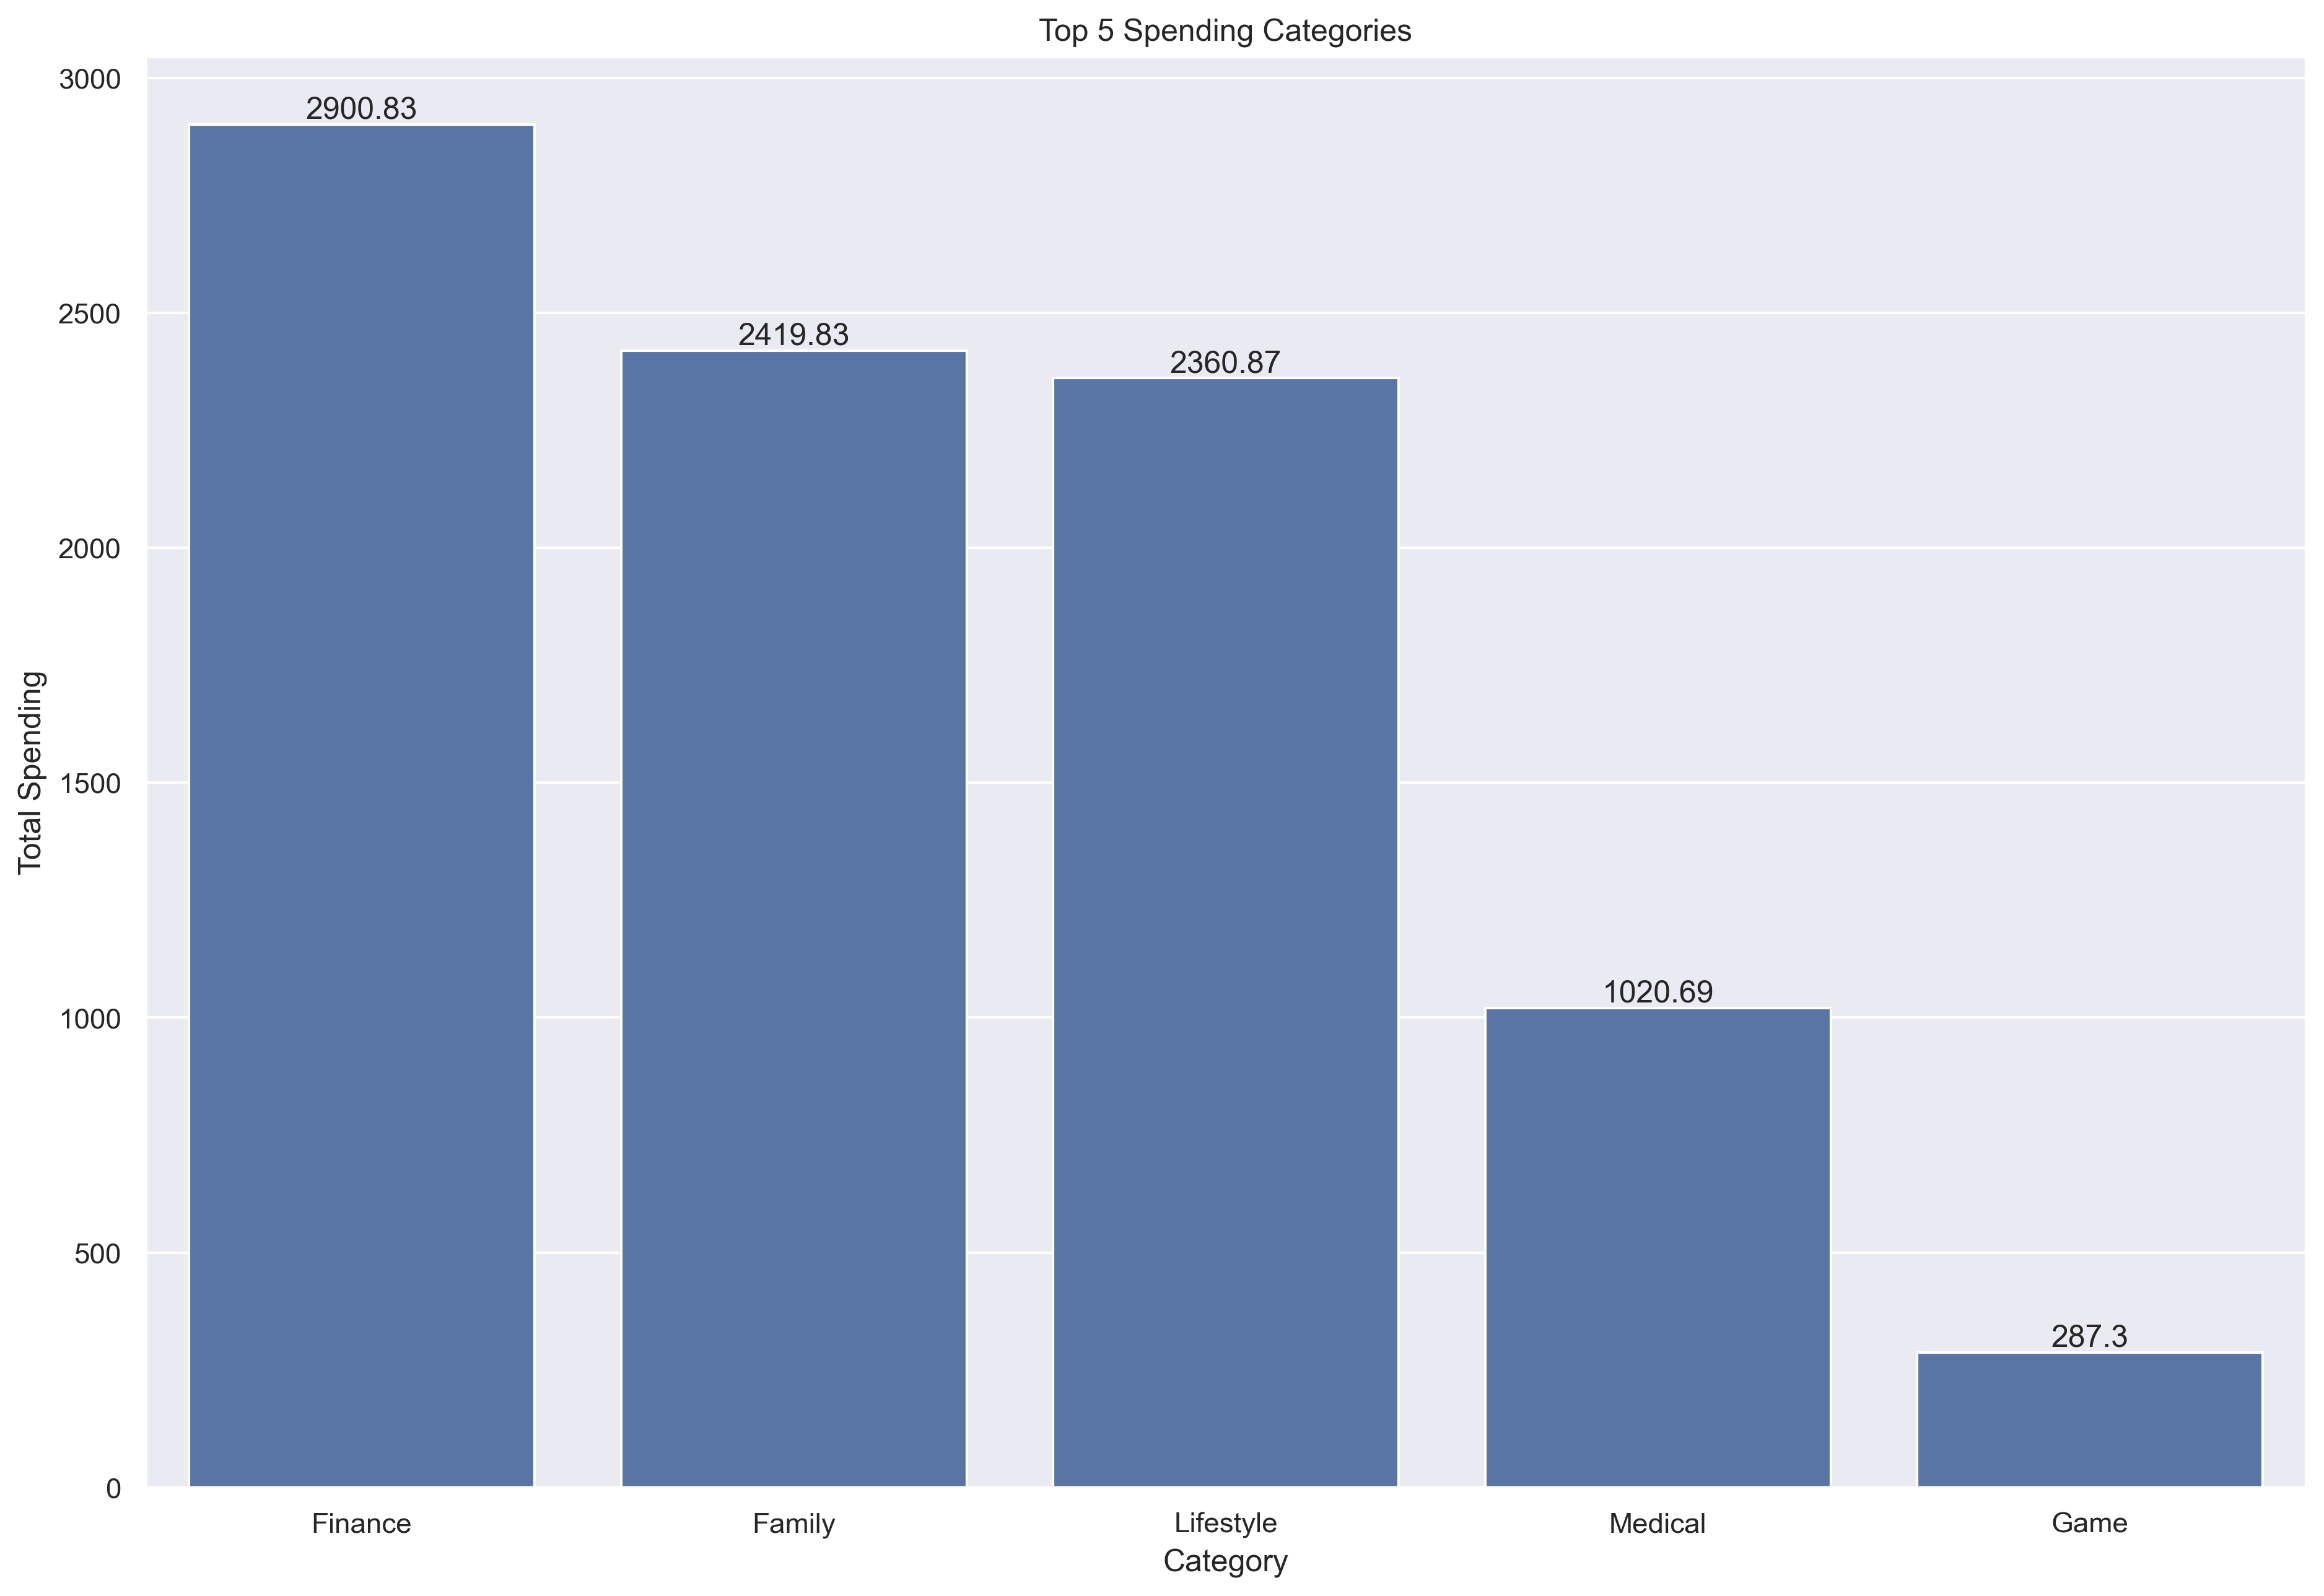

In [98]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=top5_categories.index, y=top5_categories.values, order=top5_categories.index)

plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Top 5 Spending Categories')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

## <font color='red'> <b>What Are the Most Common Words in the Names of Google Play Store Apps?</b><font color='black'>

If you want to gain insight into which words or terms are frequently used in the Google Play Store. You can follow these steps:

**text = ' '.join(df['App']):** Combine all application names in the 'App' column of the ('df') DataFrame. Create one large text with a space between each name.

**wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text):** Using the created large text, create a word cloud (WordCloud). Specify the dimensions of the word cloud (800x400) and the background color (white). The generate() method creates the word cloud from the text.

**plt.figure(figsize=(10, 5)):** Specify the dimensions of the visualization. The width is set to 10 units, and the height is set to 5 units.

**plt.imshow(wordcloud, interpolation='bilinear'):** Use the imshow() function to display the word cloud. "Bilinear" interpolation makes the image appear smoother.

**plt.axis('off'):** Hide the axis information in the plot. That is, labels and numbers on the x and y axes will not be displayed.

**plt.title('Google Play Store Apps Word Cloud'):** Sets the title of the visualization.

**plt.show():** Renders the visualization on the screen.

Shows which words or terms are frequently used in application names on the Google Play Store.

Frequently occurring words are shown more prominently and in a larger size.

This type of visualization is often used to quickly and effectively see which words or terms are most common in a text.

 - Which words or terms are frequently used in application names?
 - What are characteristic words or terms for a specific category or type? (If you have filtered the data by categories)
 - Is there a particular niche or trend in the market?

This type of analysis can be helpful for app developers; for example, when choosing an app name or evaluating market competition.

In [ ]:
# pip install wordcloud

In [100]:
from wordcloud import WordCloud

In [101]:
text = ' '.join(df['App'])
text

'Photo Editor & Candy Camera & Grid & ScrapBook Coloring book moana U Launcher Lite – FREE Live Cool Themes, Hide Apps Sketch - Draw & Paint Pixel Draw - Number Art Coloring Book Paper flowers instructions Smoke Effect Photo Maker - Smoke Editor Infinite Painter Garden Coloring Book Kids Paint Free - Drawing Fun Text on Photo - Fonteee Name Art Photo Editor - Focus n Filters Tattoo Name On My Photo Editor Mandala Coloring Book 3D Color Pixel by Number - Sandbox Art Coloring Photo Designer - Write your name with shapes 350 Diy Room Decor Ideas FlipaClip - Cartoon animation ibis Paint X Logo Maker - Small Business Boys Photo Editor - Six Pack & Men\'s Suit Superheroes Wallpapers | 4K Backgrounds Mcqueen Coloring pages HD Mickey Minnie Wallpapers Harley Quinn wallpapers HD Colorfit - Drawing & Coloring Animated Photo Editor Pencil Sketch Drawing Easy Realistic Drawing Tutorial Pink Silver Bow Keyboard Theme Art Drawing Ideas Anime Manga Coloring Book Easy Origami Ideas I Creative Idea How

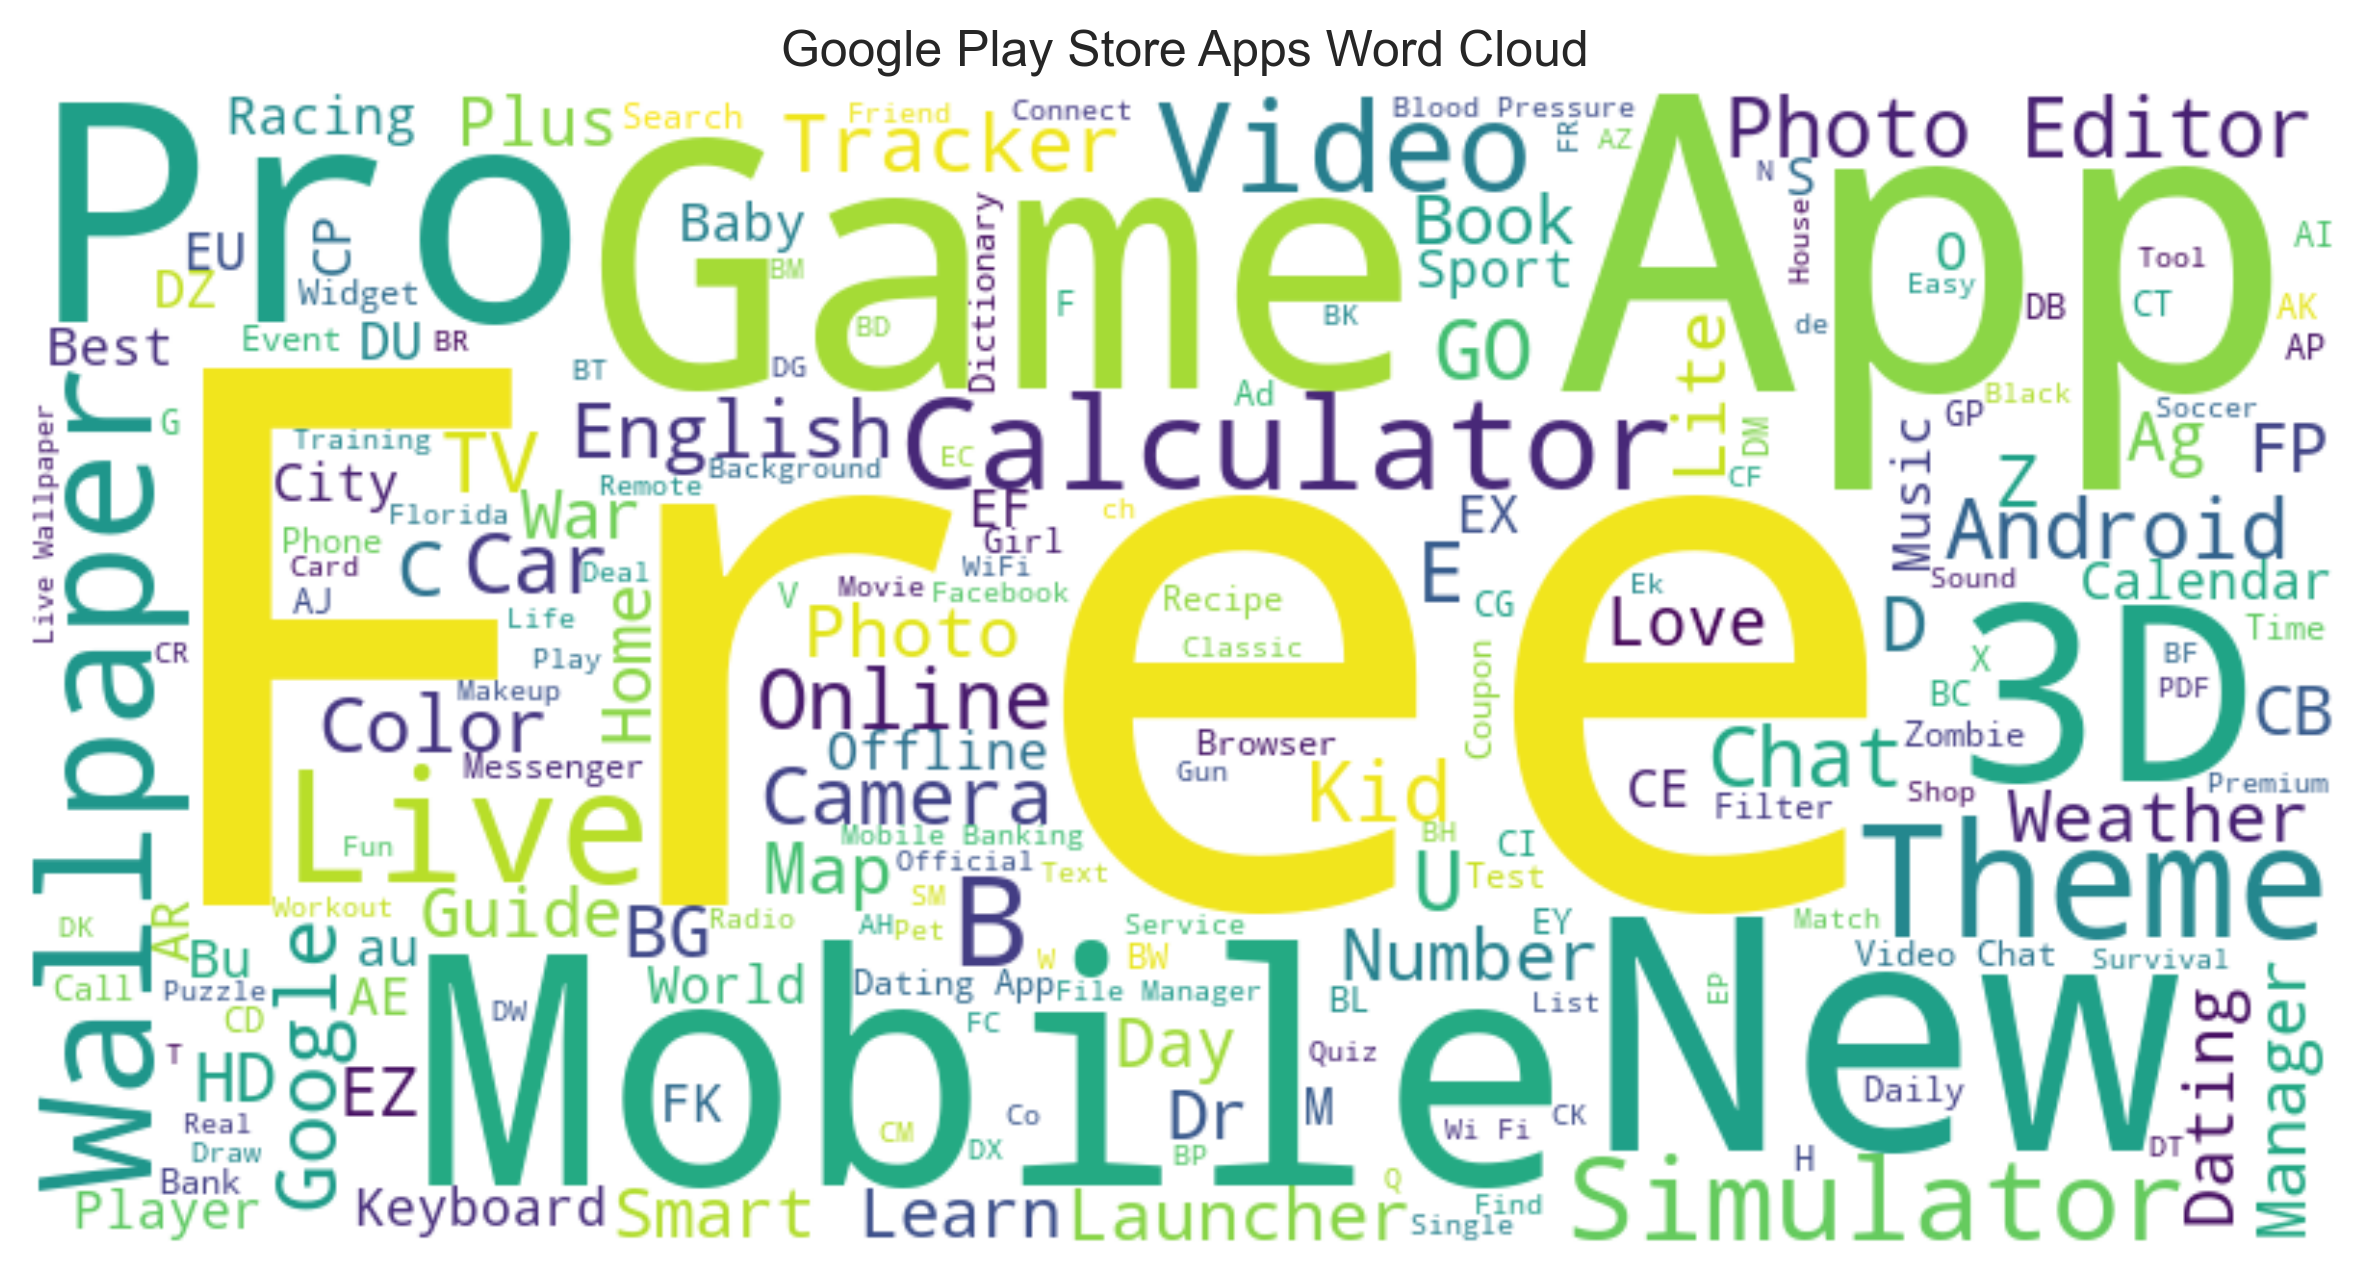

In [102]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Google Play Store Apps Word Cloud')
plt.show()

The interpolation parameter for **Matplotlib's imshow() function** can take several different values. These values control how the image is displayed. Here are some examples:

**1. nearest:** Nearest neighbor interpolation. It is fast but may be of poor quality.

**2. bilinear:** Bilinear interpolation. It is generally fast and of good quality.

**3. bicubic:** Bicubic interpolation. It may be of higher quality but slower.

**4. spline16:** 4x4 B-spline interpolation.

**5. spline36:** 6x6 B-spline interpolation.

**6. hanning, hamming, hermite, kaiser:** Interpolates using different window functions.

**7. lanczos:** Lanczos interpolation, which can be high-quality but slow.

**8. none:** No interpolation is applied.

There are several more options. The choice depends on the balance between image quality and speed. Bilinear generally offers a good balance, but bicubic or lanczos methods can be used for higher quality.

## <font color='red'> <b>Which Categories Show Low Installs with High Ratings in Google Play Store?</b><font color='black'>

1. **Group by 'Category':** The DataFrame df is grouped by the 'Category' column. This operation aggregates data for each unique category.

2. **Aggregate Functions:**

 - **'Rating': 'mean':** Calculates the average user rating for each category. This reflects overall user satisfaction within that category.
 - **'Installs': 'sum':** Calculates the total number of app installations for each category. This indicates the overall popularity or acceptance by users within that category.
3. **Sort Values:** The resulting data is sorted first in ascending order by the 'Installs' column and then in descending order by the 'Rating' column. This sorting helps identify categories with high ratings despite having fewer installs.

The resulting information from these operations provides strategic opportunities for developers interested in creating new applications in categories with low competition and high user satisfaction.

In [103]:
low_competition_cat = df.groupby('Category')[['Rating', 'Installs']].agg({
    'Rating':
    'mean',
    'Installs':
    'sum'
}).sort_values(['Installs', 'Rating'], ascending=[True, False])

low_competition_cat['Installs'] = round(
    low_competition_cat['Installs'] / 1000000, 2)

low_competition_cat

Rating  Installs
Category                               
Events               4.395313     15.97
Beauty               4.283019     27.20
Parenting            4.300000     31.52
Medical              4.212990     42.20
Auto and vehicles    4.205882     53.13
Comics               4.160000     56.09
Libraries and demo   4.208333     62.00
Art and design       4.373437    124.33
House and home       4.185000    125.21
Dating               4.033673    206.54
Food and drink       4.183871    257.90
Weather              4.248780    426.10
Education            4.375385    533.95
Lifestyle            4.133244    534.82
Maps and navigation  4.075182    724.28
Finance              4.148056    770.35
Business             4.175176    863.66
Health and fitness   4.266993   1361.02
Sports               4.239031   1528.57
Books and reference  4.336681   1916.47
Personalization      4.326425   2074.48
Entertainment        4.136036   2455.66
Shopping             4.256250   2573.35
News and magazines   4.160985   5393.22
Video players        4.084000   6222.00
Travel and local     4.121941   6361.89
Photography          4.189441   9721.25
Family               4.203713  10041.63
Tools                4.079667  11452.27
Productivity         4.219410  12463.09
Social               4.260714  12513.87
Communication        4.175410  24152.28
Game                 4.282070  31544.02

1. **Scatter Plot Drawing:** A scatter plot is drawn using the sns.scatterplot function, with the 'Rating' column on the x-axis and the 'Installs' column on the y-axis. Each category is represented by a different color, and the size of the circles changes according to the rating size.

2. **Legend Settings:**

 - ax.get_legend_handles_labels(): Retrieves the current legend handles (control elements) and labels.
 - ax.legend(...): Adjusts the legend to display only the first 11 elements and hides large labels. The legend is placed outside the plot and in the upper right corner.

3. **Display:** The plt.show() function displays the plot on the screen.

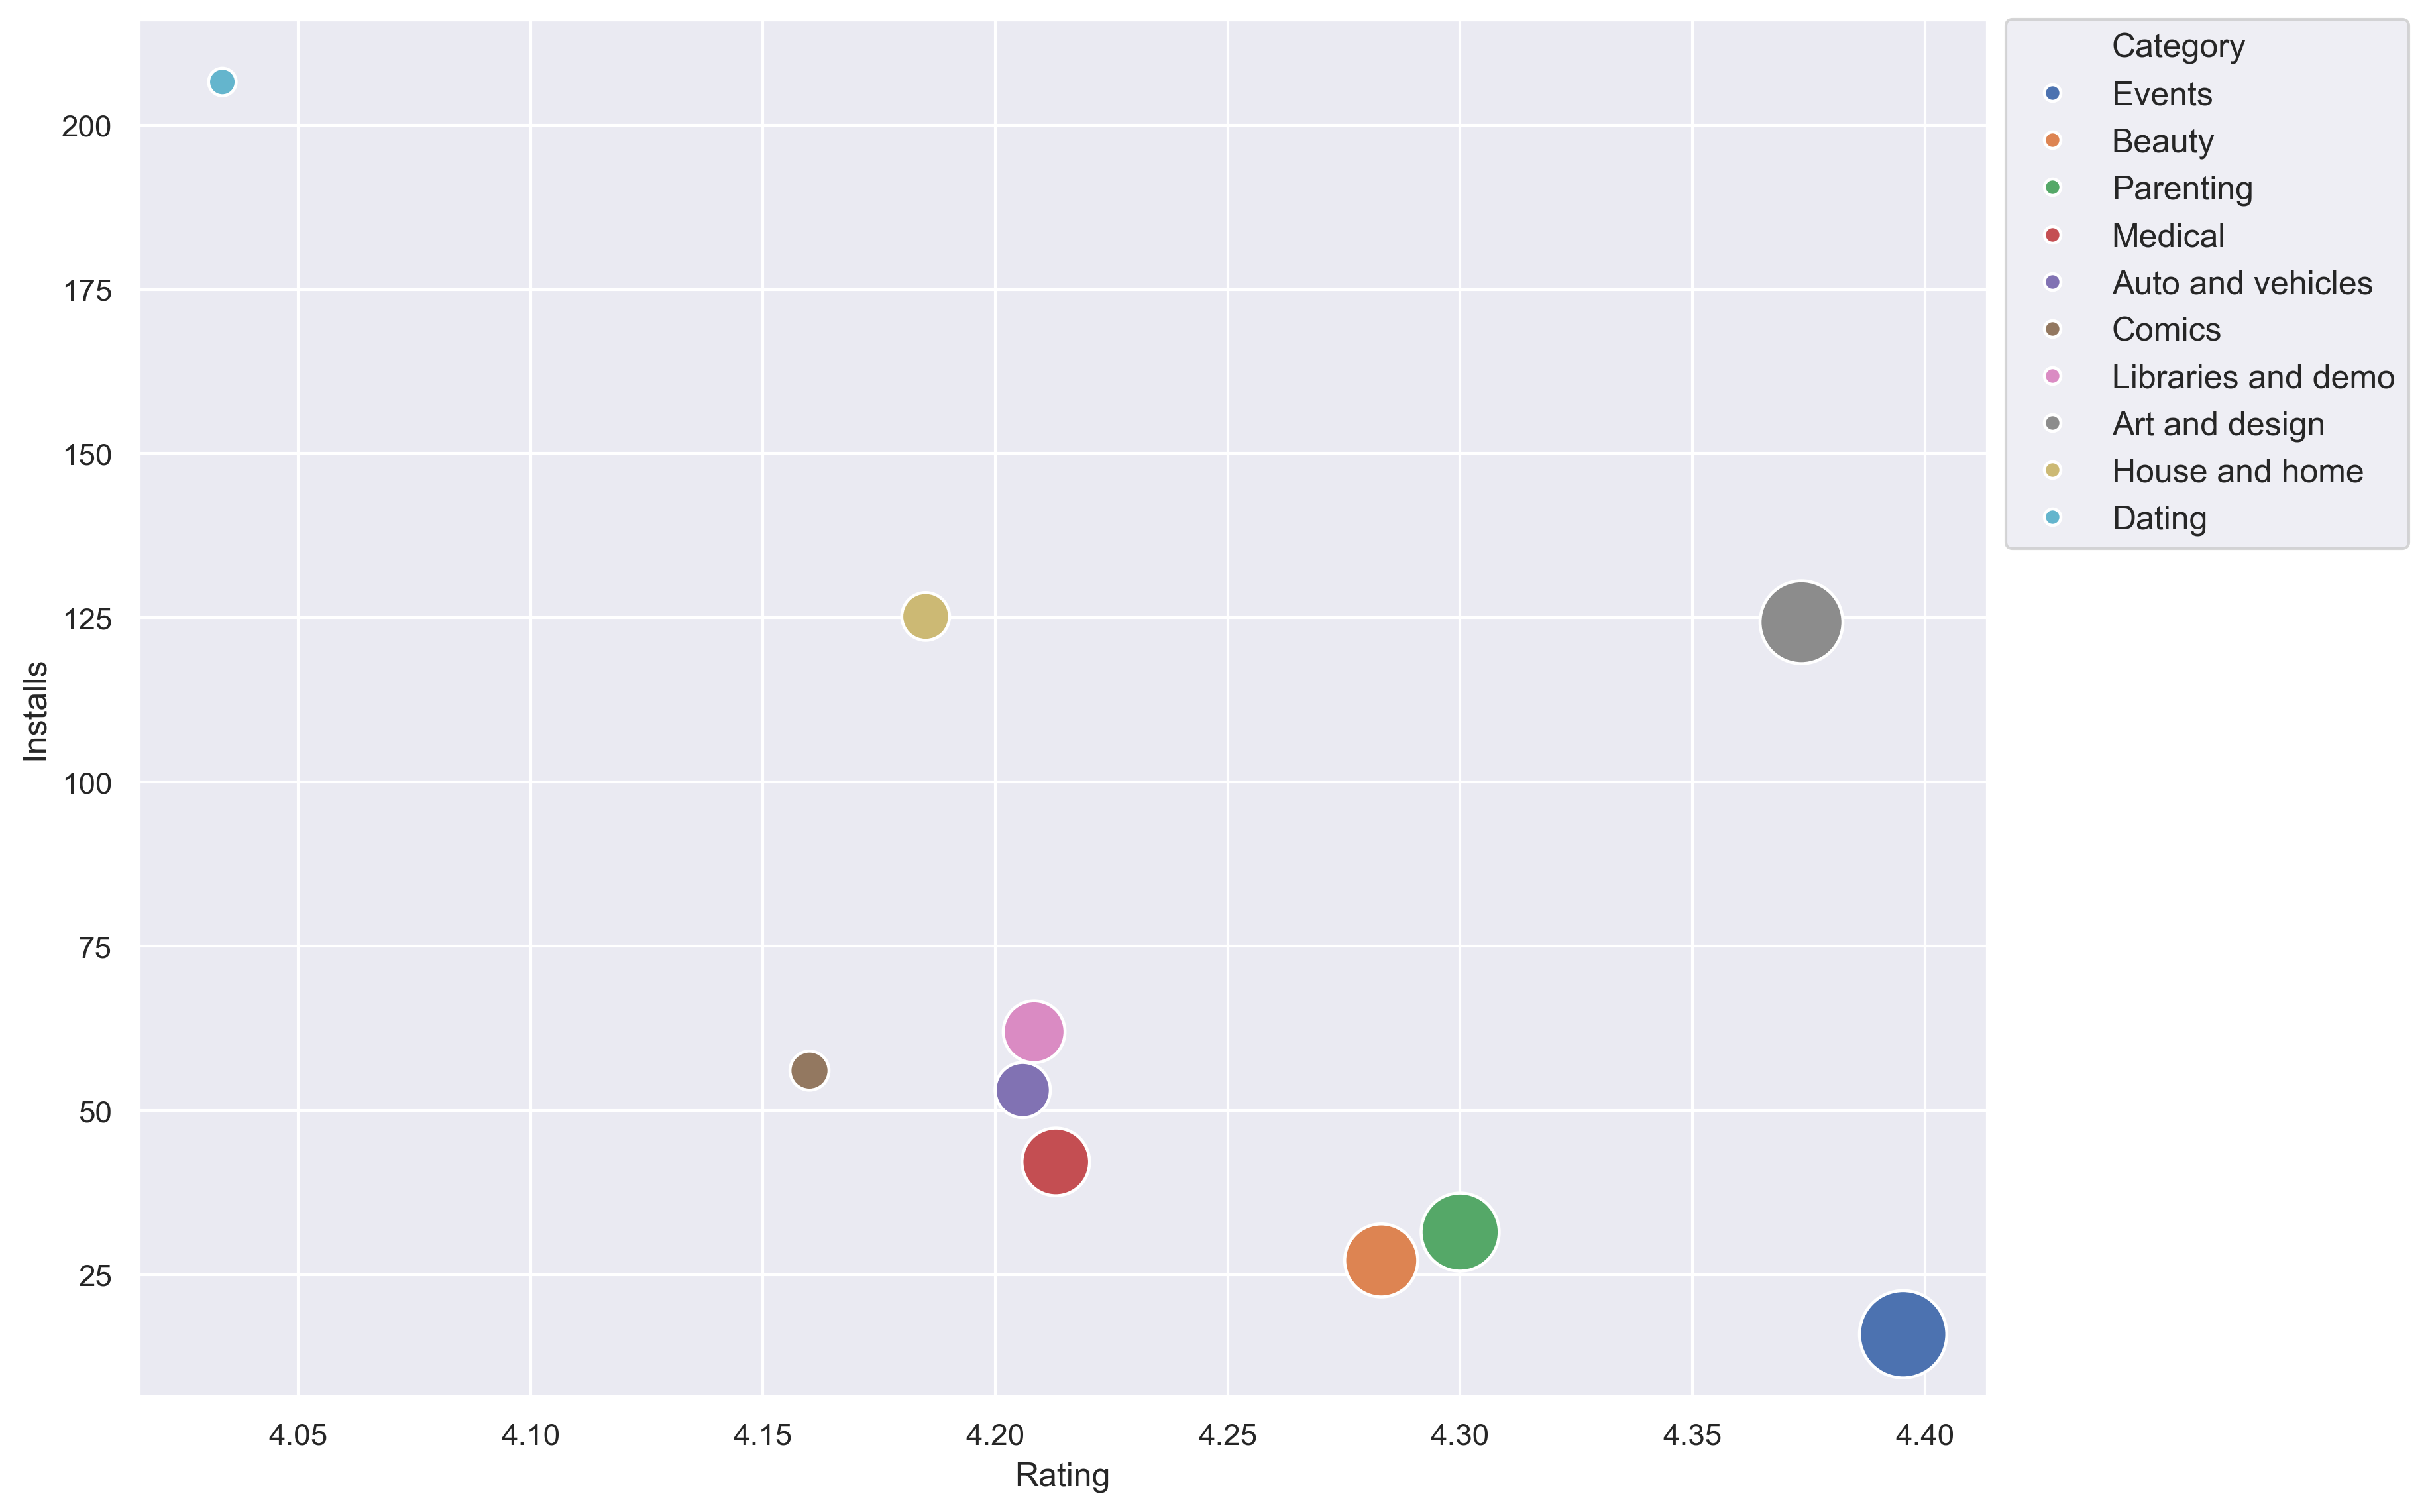

In [104]:
ax = sns.scatterplot(data=low_competition_cat[:10], x='Rating',
                y='Installs', hue='Category', size='Rating', sizes=[s for s in range(100,1200,100)], legend=True)

h, l = ax.get_legend_handles_labels()

ax.legend(h[0:11], l[0:11], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

## <font color='red'> <b>How Strong Is the Correlation Between Ratings and Number of Reviews for Apps?</b><font color='black'>

In [105]:
df.groupby('Rating')['Reviews'].sum()

Rating
1.0            28
1.2            44
1.4            98
1.5            61
1.6           691
1.7          2360
1.8          3418
1.9          2828
2.0          2997
2.1          3073
2.2          1979
2.3          2361
2.4         14829
2.5         14807
2.6          3761
2.7         25048
2.8        124730
2.9         57937
3.0        162618
3.1        320836
3.2        228320
3.3       1549019
3.4        958238
3.5       1565333
3.6       1797409
3.7       8646427
3.8      10756081
3.9      13564710
4.0     223602758
4.1     228915549
4.2     192300285
4.3     600892056
4.4     868505306
4.5    1158893777
4.6     675532724
4.7     189812069
4.8      23349249
4.9       2312993
5.0          2384
Name: Reviews, dtype: int64

Correlation coff: 0.06347187197772498


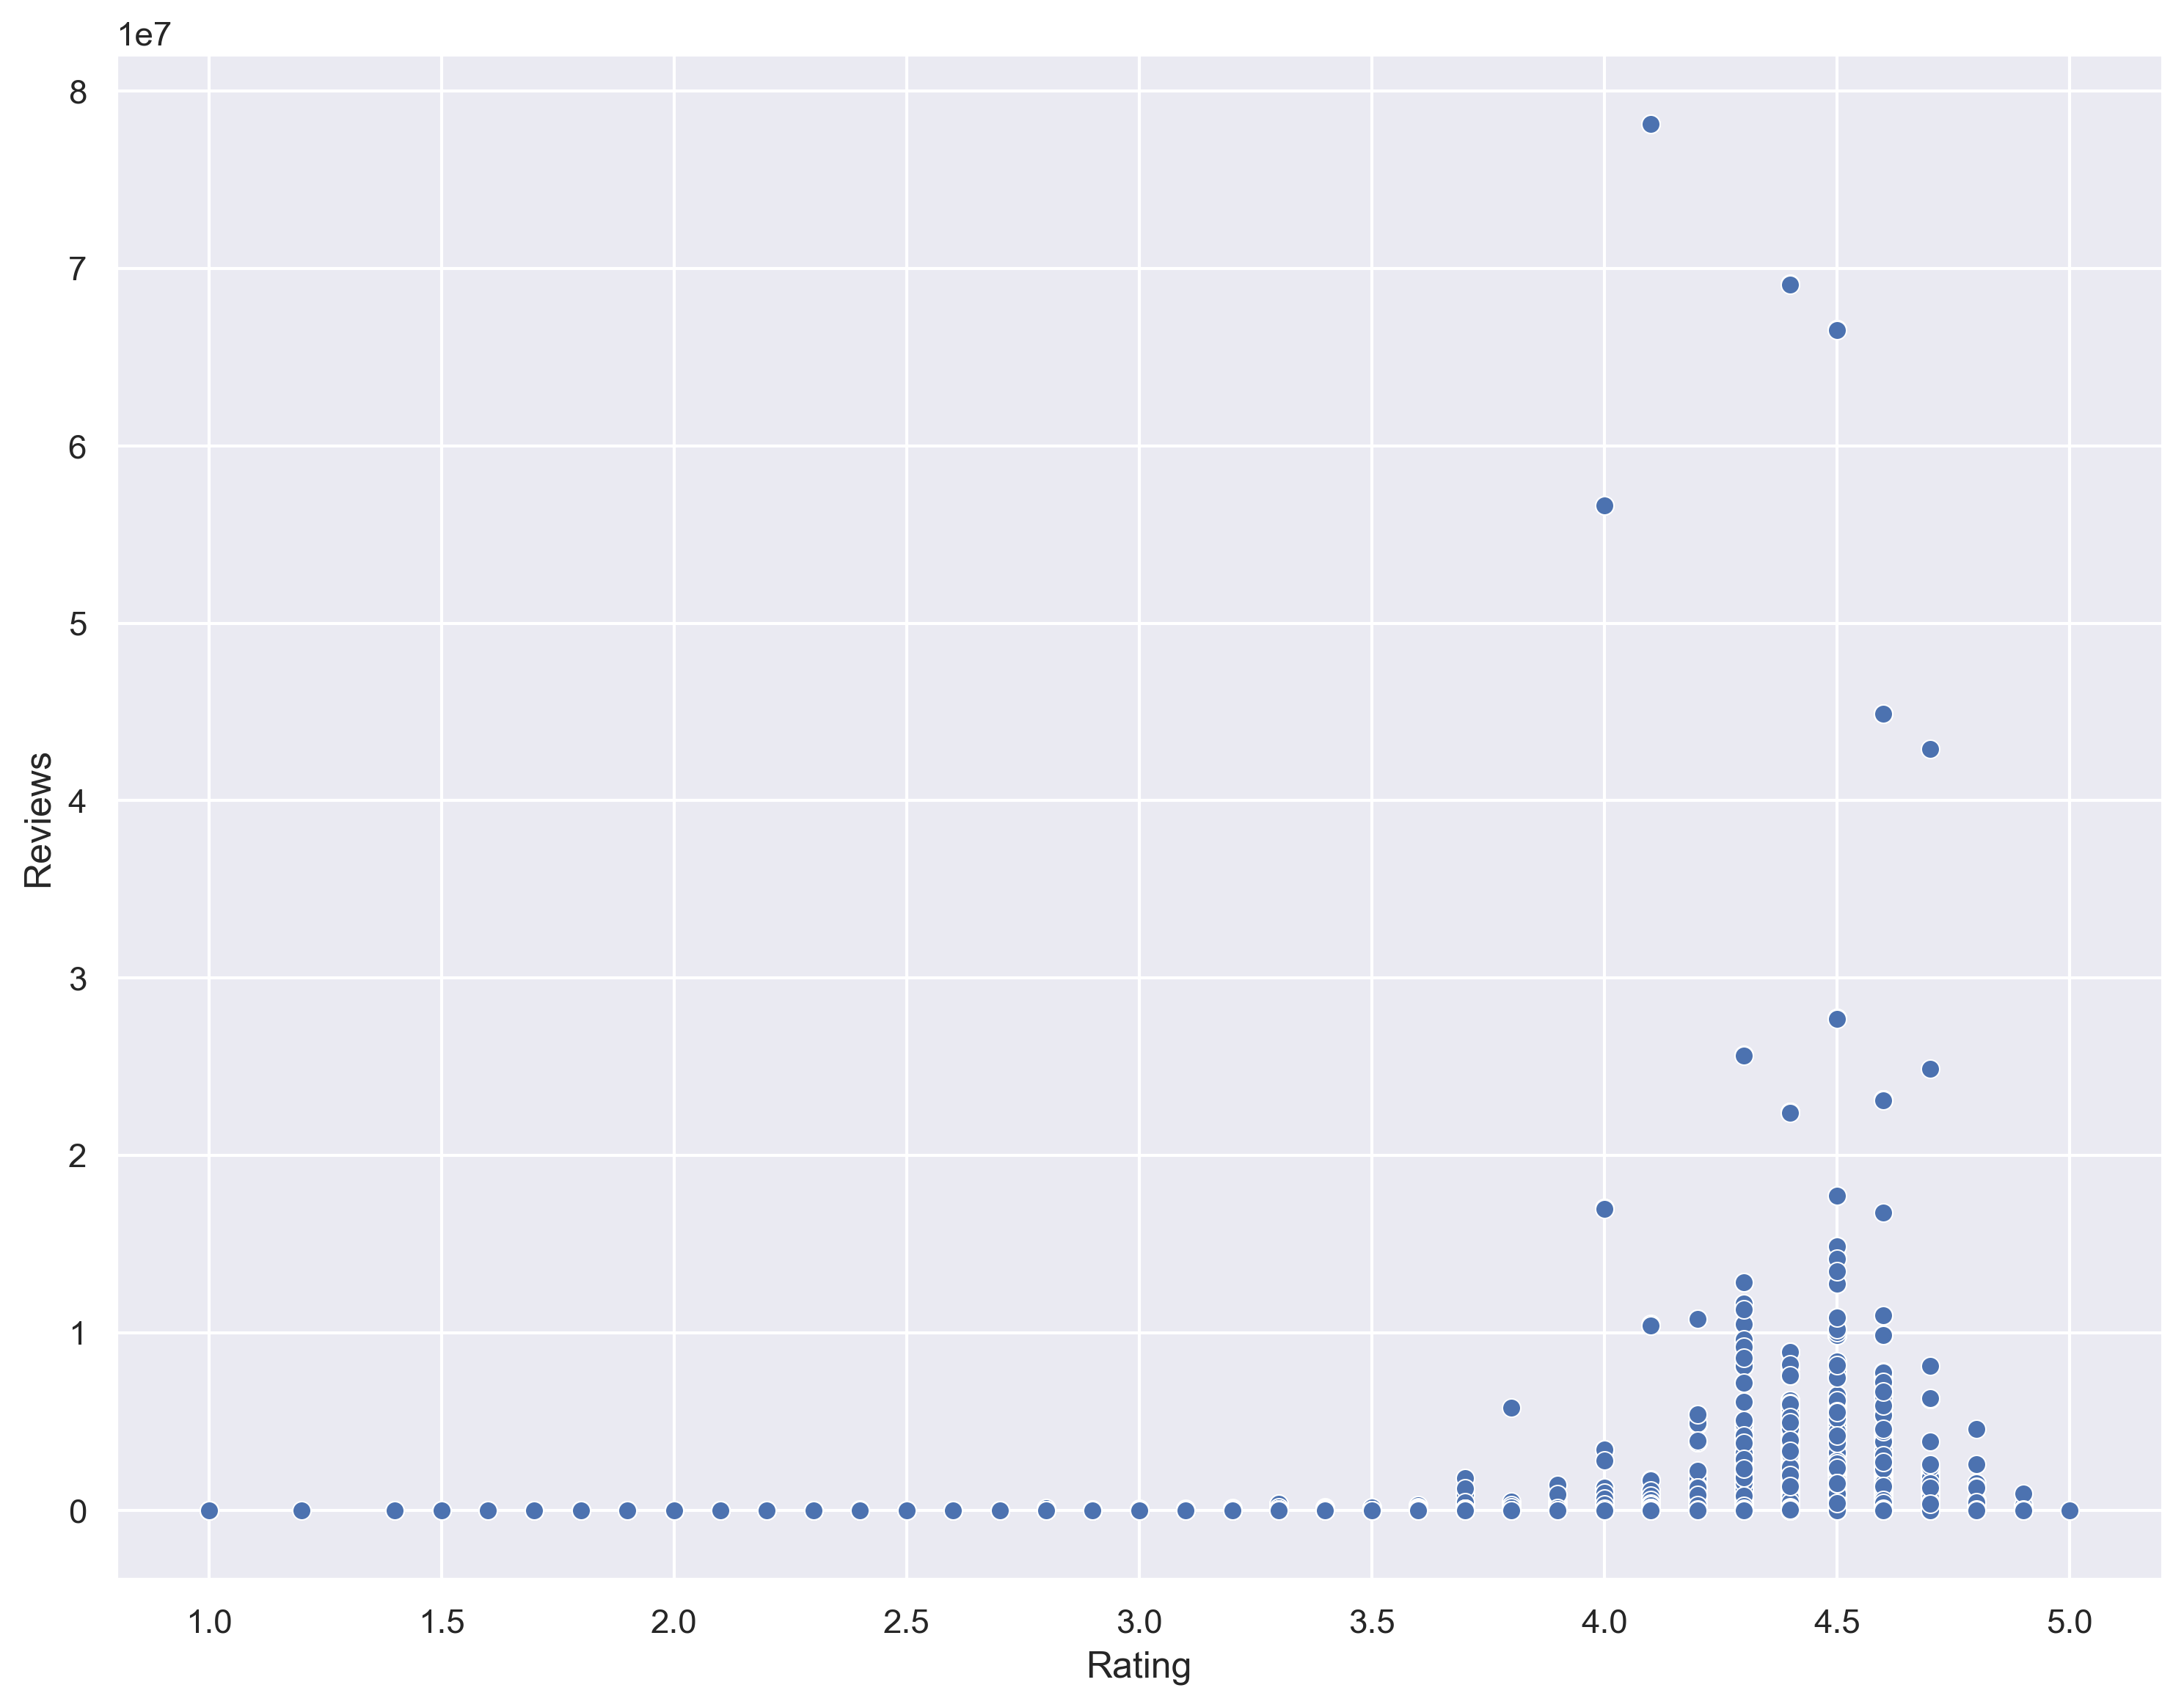

In [106]:
sns.scatterplot(data=df, x='Rating', y='Reviews')

print('Correlation coff:', df['Reviews'].corr(df['Rating']))

The "1e7" notation in the visual represents scientific notation in mathematics and means \(1 x 10^7\)

This notation is often used to display very large or very small numbers in a more readable format.

Here, 1e7 used for "Reviews" on the y-axis means 10,000,000 reviews.

## <font color='red'> <b>How Do Content Ratings Correlate with App Categories?</b><font color='black'>

In [107]:
df['Content_Rating'].value_counts()

Content_Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

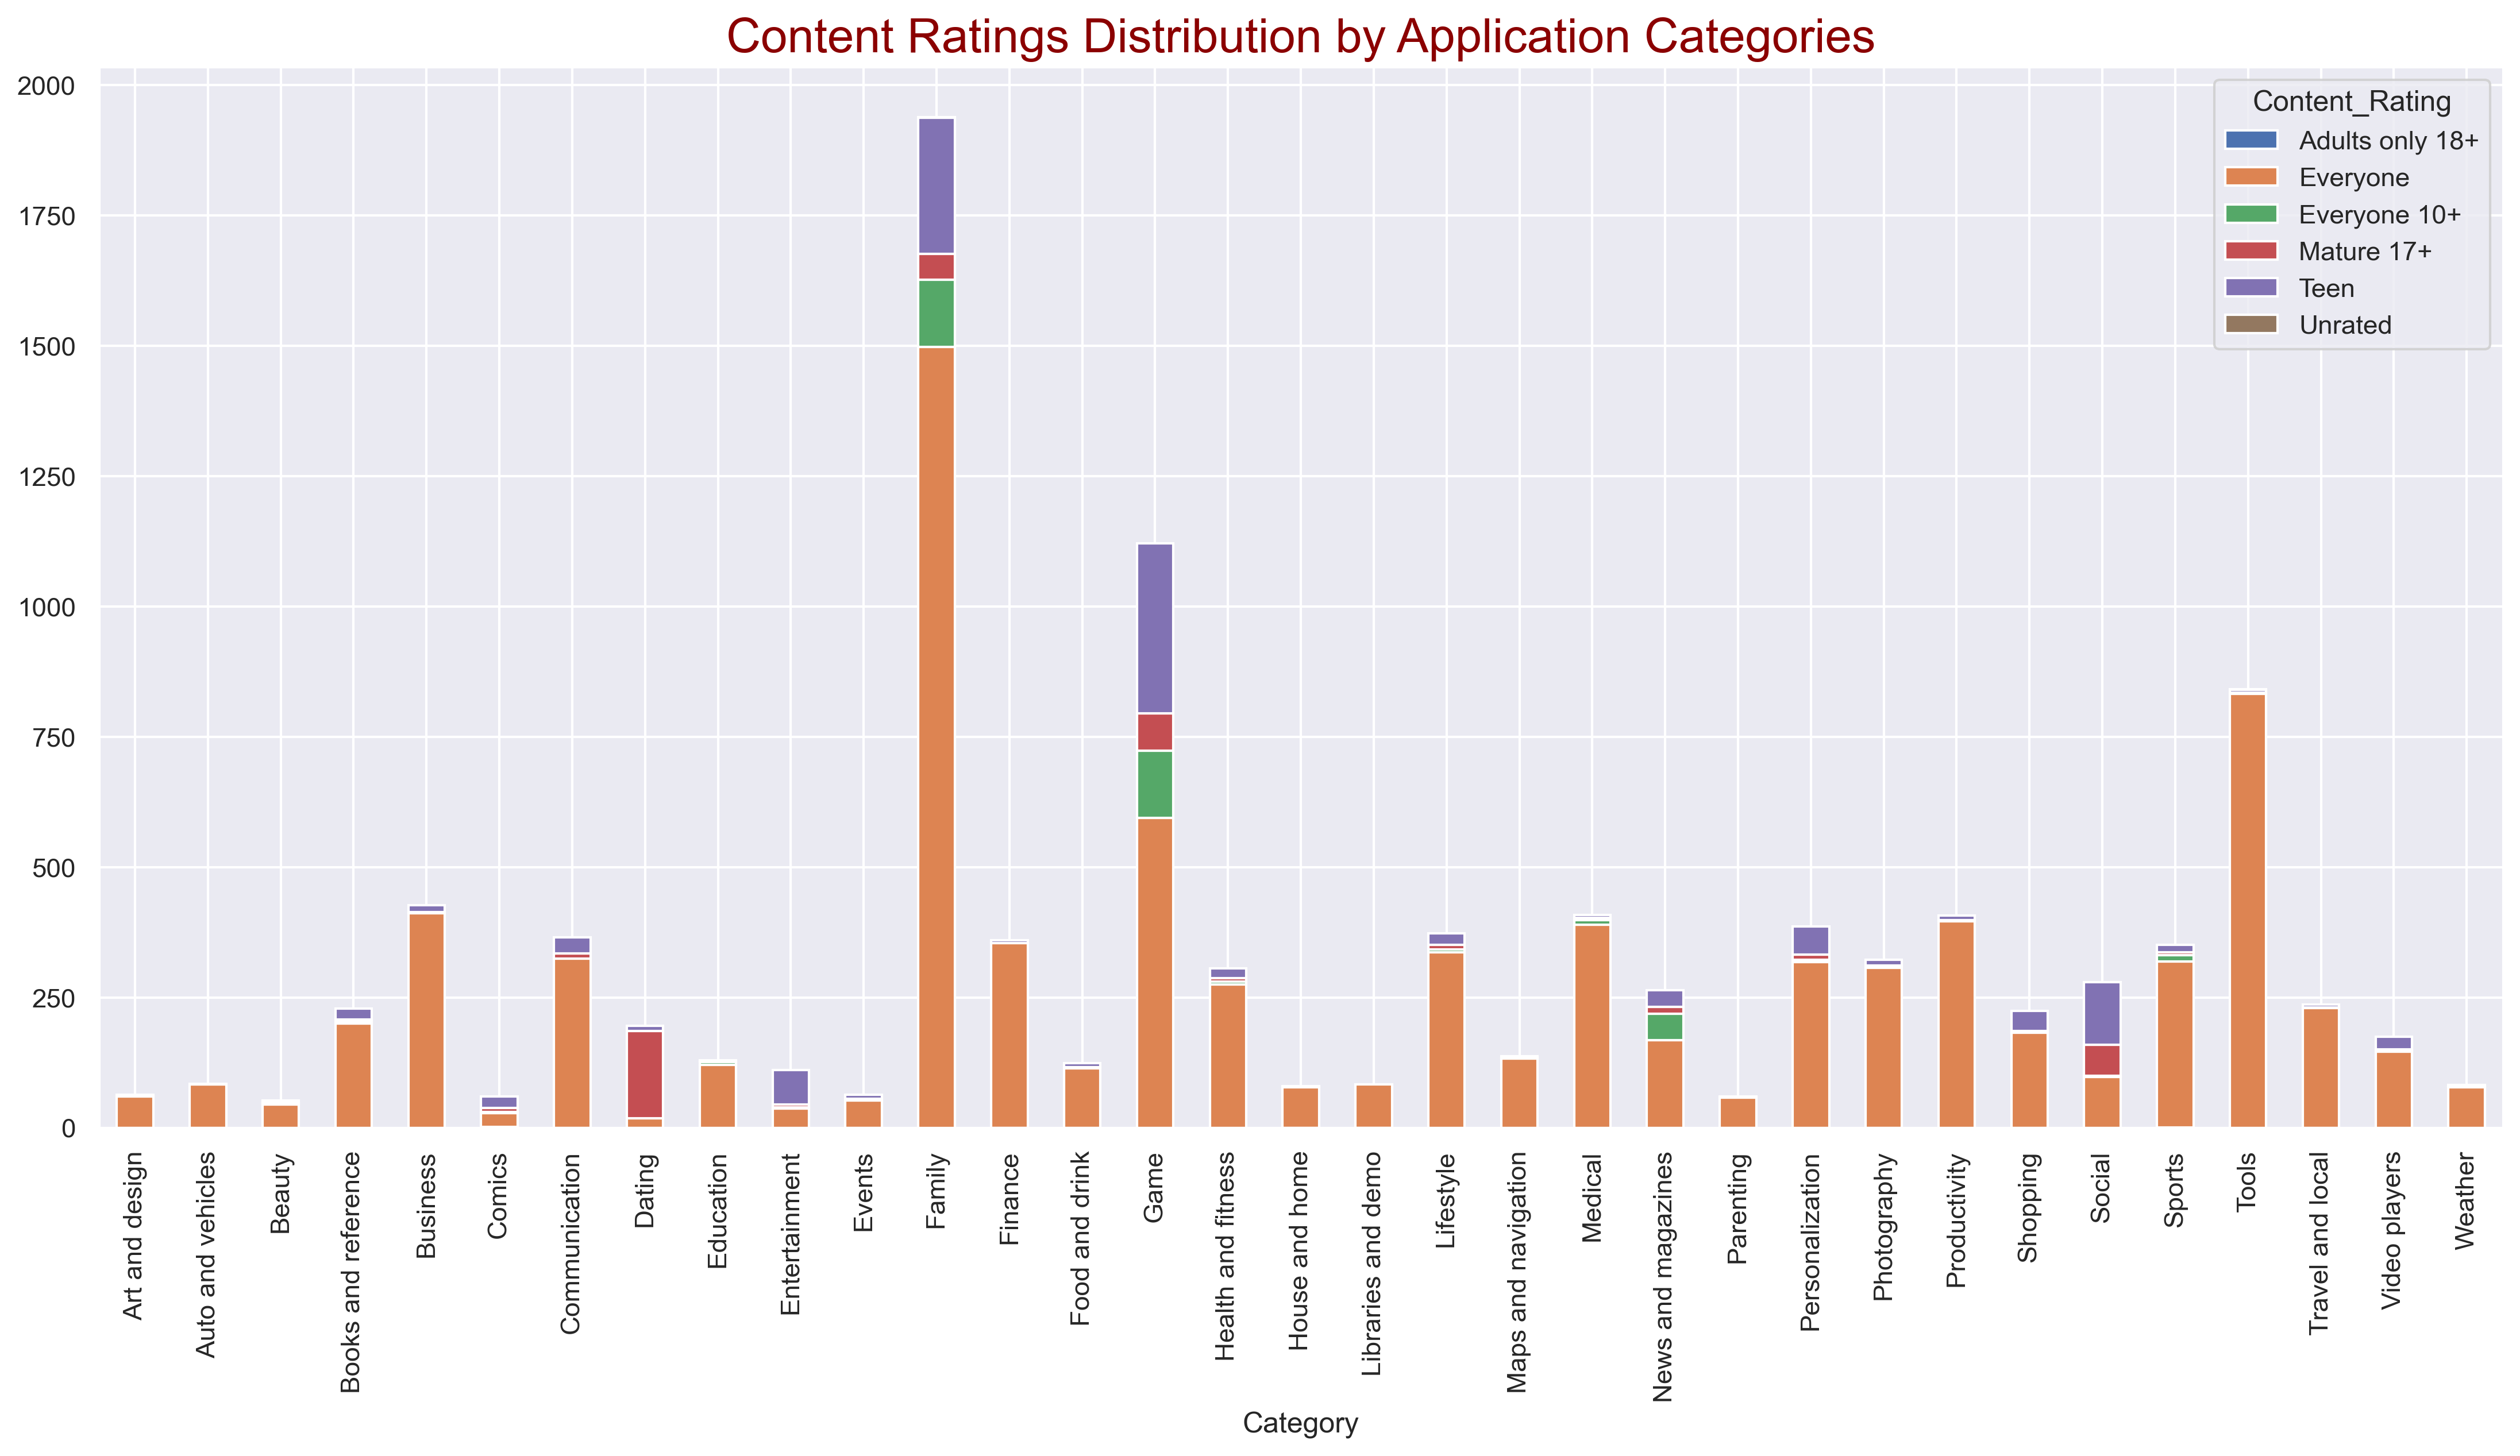

In [108]:
content_category_cross = pd.crosstab( df['Category'], df['Content_Rating'])

content_category_cross.plot(kind='bar', stacked=True, figsize=(18,8))

plt.title("Content Ratings Distribution by Application Categories", fontdict={'fontsize': 20, 'color': 'darkred'});

## <font color='red'> <b>How do App Installations Vary Across Different Android Versions?</b><font color='black'>

In [109]:
df['Android_Ver'].value_counts()

Android_Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1335
Varies with device    1220
4.4 and up             894
2.3 and up             642
5.0 and up             546
4.2 and up             386
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             235
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

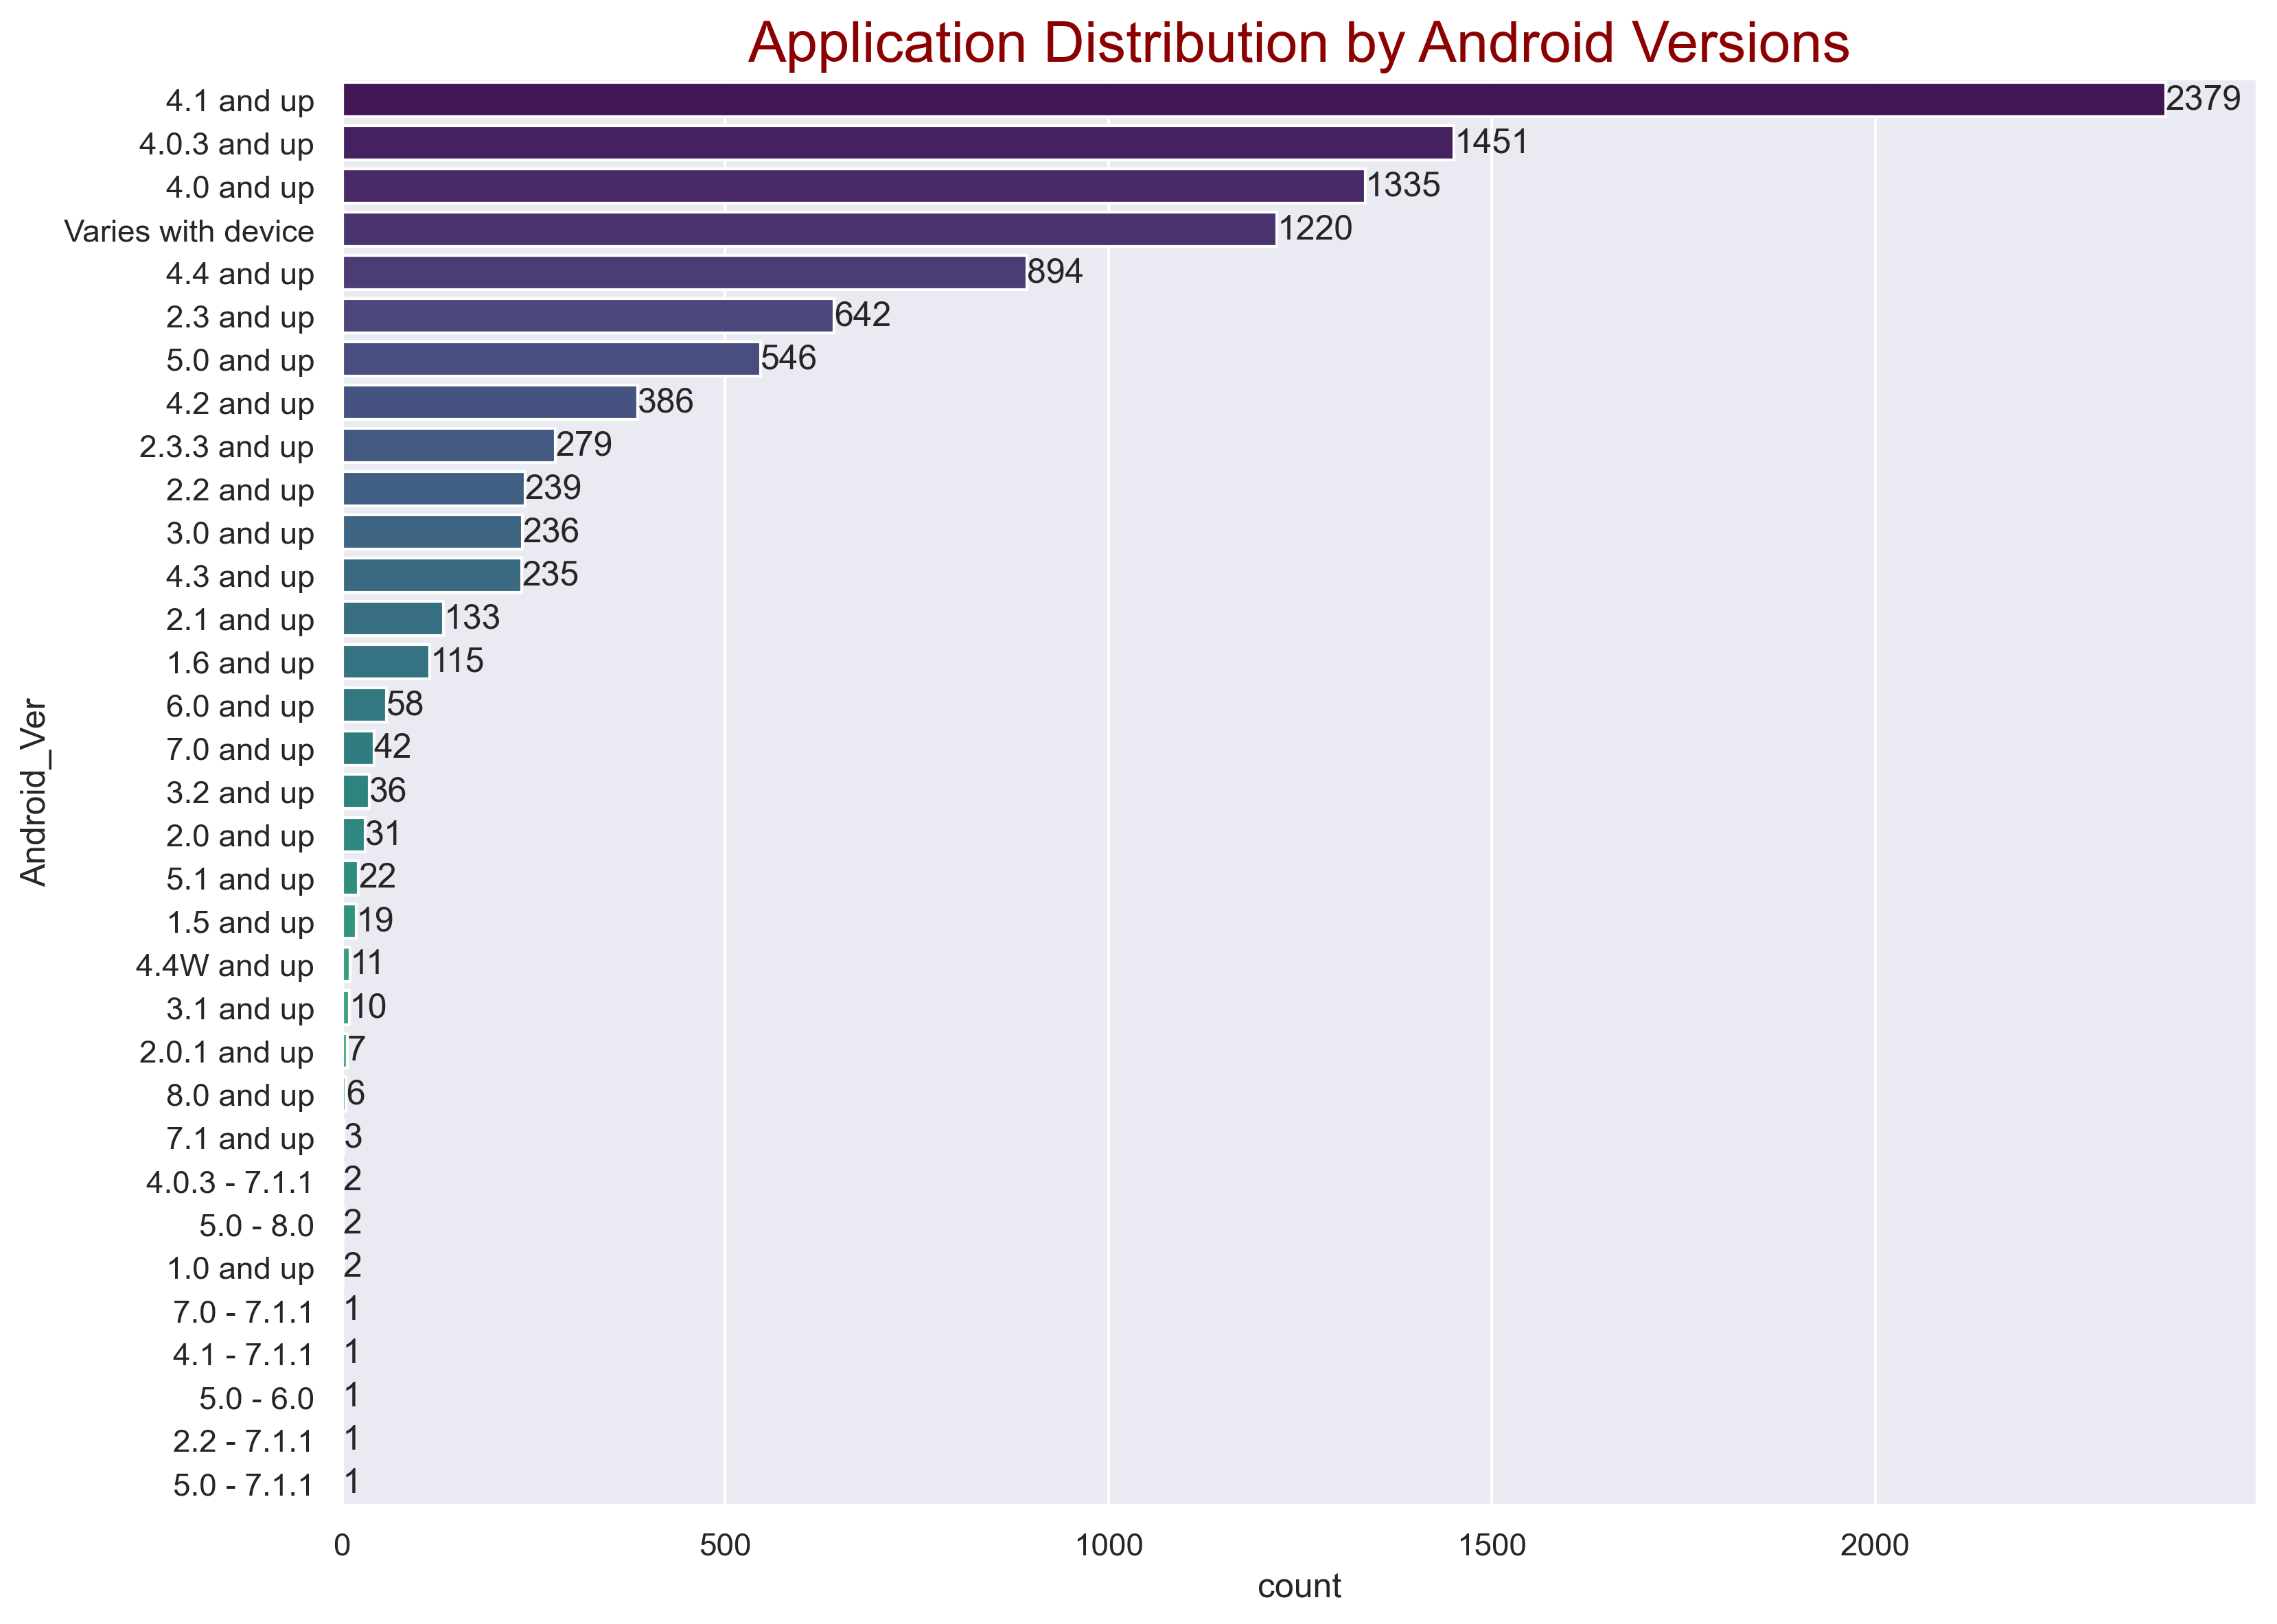

In [110]:
sorted_order = df['Android_Ver'].value_counts().index

ax = sns.countplot(data=df, y='Android_Ver', order=sorted_order, palette='viridis')

plt.title("Application Distribution by Android Versions",
          fontdict={
              'fontsize': 20,
              'color': 'darkred'
          })

for container in ax.containers:
    ax.bar_label(container)